In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import os, fnmatch
import glob
import seaborn as sns
import scipy
import scipy.stats as stats
from adjustText import adjust_text
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
from osgeo import gdal, osr, ogr

# error statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

# save figs to dir
save_figs_to = '/Users/hkim139/Documents/research/updated_carc_runs'

# from lib.uranos import URANOS
from lib.funcs import *
from lib.schron2017 import *
from lib.crnsFit import *

# some constants
crns_x = -211.265 # Detector Pos X [m]
crns_y = -167.261 # Detector Pos Y [m]

FileNotFoundError: [Errno 2] No such file or directory: './DRFs/ResponseFunction_HDPE25mm.txt'

In [6]:
path_to_shared = '/Users/hkim139/mntpoint/General/'
path_to_wd1 = 'hkim/1.carc_patchy_snow_var/updated_carc_runs/'
path_to_wd2 = 'hkim/1.carc_patchy_snow_var/updated_carc_usf_runs/'
path_to_wd3 = 'hkim/1.carc_patchy_snow_var/updated_carc_uniform_runs/'

In [7]:
# 500 by 500 grid boundaries
xmn=579026.5
xmx=580026.5
ymn=5211964
ymx=5212964

# Convert Lat/Lons to DTM
DTM = pyproj.Proj("+proj=utm +zone=12 +datum=NAD83 +units=m +no_defs")
CRNS = pyproj.Proj("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
CRNSlon, CRNSlat = -109.955567, 47.059422
UTMx, UTMy = DTM(CRNSlon, CRNSlat)
print(UTMx, UTMy)

# # Convert UTM to Lat/Lon
# minlon, minlat = DTM(xmn, ymn, inverse=True)
# maxlon, maxlat = DTM(xmx, ymx, inverse=True)

# Find x,y location for CRNS in mm (0,0) is center
u_x, u_y = (UTMx-xmn) - 500, UTMy-ymn - 500
u_x*1000, u_y*1000

m_x, m_y = (UTMx-xmn)/2, (ymx-UTMy)/2

579315.2340704725 5212296.738658515


In [8]:
p00_cntl, p00_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
p01_cntl, p01_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p01/',
                                         0, 0)
p02_cntl, p02_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p02/',
                                         -280, 280)
p03_cntl, p03_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p03/',
                                         0, 280)
p04_cntl, p04_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p04/',
                                         280, 280)
p05_cntl, p05_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p05/',
                                         -280, 0)
p06_cntl, p06_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p06/',
                                         280, 0)
p07_cntl, p07_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p07/',
                                         -280, -280)
p08_cntl, p08_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p08/',
                                         0, -280)
p09_cntl, p09_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p09/',
                                         280, -280)
p10_cntl, p10_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p10/',
                                         -140, 280)
p11_cntl, p11_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p11/',
                                         140, 280)
p12_cntl, p12_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p12/',
                                         -280, 140)
p13_cntl, p13_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p13/',
                                         -140, 140)
p14_cntl, p14_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p14/',
                                         0, 140)
p15_cntl, p15_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p15/',
                                         140, 140)
p16_cntl, p16_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p16/',
                                         280, 140)
p17_cntl, p17_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p17/',
                                         -140, 0)
p18_cntl, p18_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p18/',
                                         140, 0)
p19_cntl, p19_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p19/',
                                         -280, -140)
p20_cntl, p20_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p20/',
                                         -140, -140)
p21_cntl, p21_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p21/',
                                         0, -140)
p22_cntl, p22_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p22/',
                                         140, -140)
p23_cntl, p23_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p23/',
                                         280, -140)
p24_cntl, p24_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p24/',
                                         -140, -280)
p25_cntl, p25_cntl_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         'control/outputs/p25/',
                                         140, -280)

In [9]:
p00_0115, p00_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01_0115, p01_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p01/',
                                         0, 0)
p02_0115, p02_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03_0115, p03_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p03/',
                                         0, 280)
p04_0115, p04_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p04/',
                                         280, 280)
p05_0115, p05_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06_0115, p06_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p06/',
                                         280, 0)
p07_0115, p07_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08_0115, p08_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p08/',
                                         0, -280)
p09_0115, p09_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p09/',
                                         280, -280)
p10_0115, p10_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11_0115, p11_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p11/',
                                         140, 280)
p12_0115, p12_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13_0115, p13_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14_0115, p14_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p14/',
                                         0, 140)
p15_0115, p15_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p15/',
                                         140, 140)
p16_0115, p16_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p16/',
                                         280, 140)
p17_0115, p17_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18_0115, p18_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p18/',
                                         140, 0)
p19_0115, p19_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20_0115, p20_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21_0115, p21_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p21/',
                                         0, -140)
p22_0115, p22_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p22/',
                                         140, -140)
p23_0115, p23_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p23/',
                                         280, -140)
p24_0115, p24_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25_0115, p25_0115_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0115/outputs/p25/',
                                         140, -280)

In [12]:
p00_0121, p00_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01_0121, p01_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p01/',
                                         0, 0)
p02_0121, p02_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03_0121, p03_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p03/',
                                         0, 280)
p04_0121, p04_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p04/',
                                         280, 280)
p05_0121, p05_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06_0121, p06_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p06/',
                                         280, 0)
p07_0121, p07_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08_0121, p08_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p08/',
                                         0, -280)
p09_0121, p09_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p09/',
                                         280, -280)
p10_0121, p10_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11_0121, p11_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p11/',
                                         140, 280)
p12_0121, p12_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13_0121, p13_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14_0121, p14_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p14/',
                                         0, 140)
p15_0121, p15_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p15/',
                                         140, 140)
p16_0121, p16_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p16/',
                                         280, 140)
p17_0121, p17_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18_0121, p18_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p18/',
                                         140, 0)
p19_0121, p19_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20_0121, p20_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21_0121, p21_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p21/',
                                         0, -140)
p22_0121, p22_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p22/',
                                         140, -140)
p23_0121, p23_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p23/',
                                         280, -140)
p24_0121, p24_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25_0121, p25_0121_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0121/outputs/p25/',
                                         140, -280)

In [13]:
p00_0122, p00_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01_0122, p01_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p01/',
                                         0, 0)
p02_0122, p02_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03_0122, p03_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p03/',
                                         0, 280)
p04_0122, p04_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p04/',
                                         280, 280)
p05_0122, p05_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06_0122, p06_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p06/',
                                         280, 0)
p07_0122, p07_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08_0122, p08_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p08/',
                                         0, -280)
p09_0122, p09_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p09/',
                                         280, -280)
p10_0122, p10_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11_0122, p11_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p11/',
                                         140, 280)
p12_0122, p12_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13_0122, p13_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14_0122, p14_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p14/',
                                         0, 140)
p15_0122, p15_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p15/',
                                         140, 140)
p16_0122, p16_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p16/',
                                         280, 140)
p17_0122, p17_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18_0122, p18_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p18/',
                                         140, 0)
p19_0122, p19_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20_0122, p20_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21_0122, p21_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p21/',
                                         0, -140)
p22_0122, p22_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p22/',
                                         140, -140)
p23_0122, p23_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p23/',
                                         280, -140)
p24_0122, p24_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25_0122, p25_0122_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0122/outputs/p25/',
                                         140, -280)

In [14]:
p00_0129, p00_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01_0129, p01_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p01/',
                                         0, 0)
p02_0129, p02_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03_0129, p03_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p03/',
                                         0, 280)
p04_0129, p04_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p04/',
                                         280, 280)
p05_0129, p05_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06_0129, p06_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p06/',
                                         280, 0)
p07_0129, p07_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08_0129, p08_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p08/',
                                         0, -280)
p09_0129, p09_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p09/',
                                         280, -280)
p18_0129, p18_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p09/',
                                         140, 0)
p10_0129, p10_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11_0129, p11_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p11/',
                                         140, 280)
p12_0129, p12_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13_0129, p13_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14_0129, p14_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p14/',
                                         0, 140)
p15_0129, p15_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p15/',
                                         140, 140)
p16_0129, p16_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p16/',
                                         280, 140)
p17_0129, p17_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18_0129, p18_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p18/',
                                         140, 0)
p19_0129, p19_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20_0129, p20_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21_0129, p21_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p21/',
                                         0, -140)
p22_0129, p22_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p22/',
                                         140, -140)
p23_0129, p23_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p23/',
                                         280, -140)
p24_0129, p24_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25_0129, p25_0129_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0129/outputs/p25/',
                                         140, -280)

In [15]:
p00_0217, p00_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01_0217, p01_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p01/',
                                         0, 0)
p02_0217, p02_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03_0217, p03_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p03/',
                                         0, 280)
p04_0217, p04_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p04/',
                                         280, 280)
p05_0217, p05_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06_0217, p06_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p06/',
                                         280, 0)
p07_0217, p07_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08_0217, p08_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p08/',
                                         0, -280)
p09_0217, p09_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p09/',
                                         280, -280)
p10_0217, p10_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11_0217, p11_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p11/',
                                         140, 280)
p12_0217, p12_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13_0217, p13_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14_0217, p14_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p14/',
                                         0, 140)
p15_0217, p15_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p15/',
                                         140, 140)
p16_0217, p16_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p16/',
                                         280, 140)
p17_0217, p17_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18_0217, p18_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p18/',
                                         140, 0)
p19_0217, p19_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20_0217, p20_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21_0217, p21_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p21/',
                                         0, -140)
p22_0217, p22_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p22/',
                                         140, -140)
p23_0217, p23_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p23/',
                                         280, -140)
p24_0217, p24_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25_0217, p25_0217_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0217/outputs/p25/',
                                         140, -280)

In [16]:
p00_0218, p00_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01_0218, p01_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p01/',
                                         0, 0)
p02_0218, p02_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03_0218, p03_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p03/',
                                         0, 280)
p04_0218, p04_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p04/',
                                         280, 280)
p05_0218, p05_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06_0218, p06_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p06/',
                                         280, 0)
p07_0218, p07_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08_0218, p08_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p08/',
                                         0, -280)
p09_0218, p09_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p09/',
                                         280, -280)
p10_0218, p10_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11_0218, p11_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p11/',
                                         140, 280)
p12_0218, p12_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13_0218, p13_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14_0218, p14_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p14/',
                                         0, 140)
p15_0218, p15_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p15/',
                                         140, 140)
p16_0218, p16_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p16/',
                                         280, 140)
p17_0218, p17_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18_0218, p18_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p18/',
                                         140, 0)
p19_0218, p19_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20_0218, p20_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21_0218, p21_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p21/',
                                         0, -140)
p22_0218, p22_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p22/',
                                         140, -140)
p23_0218, p23_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p23/',
                                         280, -140)
p24_0218, p24_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25_0218, p25_0218_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0218/outputs/p25/',
                                         140, -280)

In [17]:
p00_0224, p00_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01_0224, p01_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p01/',
                                         0, 0)
p02_0224, p02_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03_0224, p03_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p03/',
                                         0, 280)
p04_0224, p04_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p04/',
                                         280, 280)
p05_0224, p05_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06_0224, p06_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p06/',
                                         280, 0)
p07_0224, p07_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08_0224, p08_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p08/',
                                         0, -280)
p09_0224, p09_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p09/',
                                         280, -280)
p10_0224, p10_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11_0224, p11_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p11/',
                                         140, 280)
p12_0224, p12_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13_0224, p13_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14_0224, p14_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p14/',
                                         0, 140)
p15_0224, p15_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p15/',
                                         140, 140)
p16_0224, p16_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p16/',
                                         280, 140)
p17_0224, p17_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18_0224, p18_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p18/',
                                         140, 0)
p19_0224, p19_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20_0224, p20_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21_0224, p21_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p21/',
                                         0, -140)
p22_0224, p22_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p22/',
                                         140, -140)
p23_0224, p23_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p23/',
                                         280, -140)
p24_0224, p24_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25_0224, p25_0224_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0224/outputs/p25/',
                                         140, -280)

In [18]:
p00_0304, p00_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01_0304, p01_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p01/',
                                         0, 0)
p02_0304, p02_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03_0304, p03_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p03/',
                                         0, 280)
p04_0304, p04_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p04/',
                                         280, 280)
p05_0304, p05_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06_0304, p06_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p06/',
                                         280, 0)
p07_0304, p07_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08_0304, p08_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p08/',
                                         0, -280)
p09_0304, p09_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p09/',
                                         280, -280)
p10_0304, p10_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11_0304, p11_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p11/',
                                         140, 280)
p12_0304, p12_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13_0304, p13_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14_0304, p14_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p14/',
                                         0, 140)
p15_0304, p15_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p15/',
                                         140, 140)
p16_0304, p16_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p16/',
                                         280, 140)
p17_0304, p17_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18_0304, p18_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p18/',
                                         140, 0)
p19_0304, p19_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20_0304, p20_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21_0304, p21_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p21/',
                                         0, -140)
p22_0304, p22_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p22/',
                                         140, -140)
p23_0304, p23_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p23/',
                                         280, -140)
p24_0304, p24_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25_0304, p25_0304_hits = readUranosNC(path_to_shared+path_to_wd1,
                                         '0304/outputs/p25/',
                                         140, -280)

In [19]:
nc_p00_cntl = calcNeutronCounts(p00_cntl_hits)
nc_p01_cntl = calcNeutronCounts(p01_cntl_hits)
nc_p02_cntl = calcNeutronCounts(p02_cntl_hits)
nc_p03_cntl = calcNeutronCounts(p03_cntl_hits)
nc_p04_cntl = calcNeutronCounts(p04_cntl_hits)
nc_p05_cntl = calcNeutronCounts(p05_cntl_hits)
nc_p06_cntl = calcNeutronCounts(p06_cntl_hits)
nc_p07_cntl = calcNeutronCounts(p07_cntl_hits)
nc_p08_cntl = calcNeutronCounts(p08_cntl_hits)
nc_p09_cntl = calcNeutronCounts(p09_cntl_hits)
nc_p10_cntl = calcNeutronCounts(p10_cntl_hits)
nc_p11_cntl = calcNeutronCounts(p11_cntl_hits)
nc_p12_cntl = calcNeutronCounts(p12_cntl_hits)
nc_p13_cntl = calcNeutronCounts(p13_cntl_hits)
nc_p14_cntl = calcNeutronCounts(p14_cntl_hits)
nc_p15_cntl = calcNeutronCounts(p15_cntl_hits)
nc_p16_cntl = calcNeutronCounts(p16_cntl_hits)
nc_p17_cntl = calcNeutronCounts(p17_cntl_hits)
nc_p18_cntl = calcNeutronCounts(p18_cntl_hits)
nc_p19_cntl = calcNeutronCounts(p19_cntl_hits)
nc_p20_cntl = calcNeutronCounts(p20_cntl_hits)
nc_p21_cntl = calcNeutronCounts(p21_cntl_hits)
nc_p22_cntl = calcNeutronCounts(p22_cntl_hits)
nc_p23_cntl = calcNeutronCounts(p23_cntl_hits)
nc_p24_cntl = calcNeutronCounts(p24_cntl_hits)
nc_p25_cntl = calcNeutronCounts(p25_cntl_hits)

nc_cntl = [nc_p00_cntl,
           nc_p01_cntl,
           nc_p02_cntl,
           nc_p03_cntl,
           nc_p04_cntl,
           nc_p05_cntl,
           nc_p06_cntl,
           nc_p07_cntl,
           nc_p08_cntl,  
           nc_p09_cntl,
           nc_p10_cntl,
           nc_p11_cntl,
           nc_p12_cntl,
           nc_p13_cntl,
           nc_p14_cntl,
           nc_p15_cntl,
           nc_p16_cntl,
           nc_p17_cntl,
           nc_p18_cntl, 
           nc_p19_cntl,
           nc_p20_cntl,
           nc_p21_cntl,
           nc_p22_cntl,
           nc_p23_cntl,
           nc_p24_cntl,
           nc_p25_cntl,]

In [20]:
nc_p00_0115 = calcNeutronCounts(p00_0115_hits)
nc_p01_0115 = calcNeutronCounts(p01_0115_hits)
nc_p02_0115 = calcNeutronCounts(p02_0115_hits)
nc_p03_0115 = calcNeutronCounts(p03_0115_hits)
nc_p04_0115 = calcNeutronCounts(p04_0115_hits)
nc_p05_0115 = calcNeutronCounts(p05_0115_hits)
nc_p06_0115 = calcNeutronCounts(p06_0115_hits)
nc_p07_0115 = calcNeutronCounts(p07_0115_hits)
nc_p08_0115 = calcNeutronCounts(p08_0115_hits)
nc_p09_0115 = calcNeutronCounts(p09_0115_hits)
nc_p10_0115 = calcNeutronCounts(p10_0115_hits)
nc_p11_0115 = calcNeutronCounts(p11_0115_hits)
nc_p12_0115 = calcNeutronCounts(p12_0115_hits)
nc_p13_0115 = calcNeutronCounts(p13_0115_hits)
nc_p14_0115 = calcNeutronCounts(p14_0115_hits)
nc_p15_0115 = calcNeutronCounts(p15_0115_hits)
nc_p16_0115 = calcNeutronCounts(p16_0115_hits)
nc_p17_0115 = calcNeutronCounts(p17_0115_hits)
nc_p18_0115 = calcNeutronCounts(p18_0115_hits)
nc_p19_0115 = calcNeutronCounts(p19_0115_hits)
nc_p20_0115 = calcNeutronCounts(p20_0115_hits)
nc_p21_0115 = calcNeutronCounts(p21_0115_hits)
nc_p22_0115 = calcNeutronCounts(p22_0115_hits)
nc_p23_0115 = calcNeutronCounts(p23_0115_hits)
nc_p24_0115 = calcNeutronCounts(p24_0115_hits)
nc_p25_0115 = calcNeutronCounts(p25_0115_hits)

nc_0115 = [nc_p00_0115,
           nc_p01_0115,
           nc_p02_0115,
           nc_p03_0115,
           nc_p04_0115,
           nc_p05_0115,
           nc_p06_0115,
           nc_p07_0115,
           nc_p08_0115,  
           nc_p09_0115,
           nc_p10_0115,
           nc_p11_0115,
           nc_p12_0115,
           nc_p13_0115,
           nc_p14_0115,
           nc_p15_0115,
           nc_p16_0115,
           nc_p17_0115,
           nc_p18_0115, 
           nc_p19_0115,
           nc_p20_0115,
           nc_p21_0115,
           nc_p22_0115,
           nc_p23_0115,
           nc_p24_0115,
           nc_p25_0115,]

In [21]:
nc_p00_0121 = calcNeutronCounts(p00_0121_hits)
nc_p01_0121 = calcNeutronCounts(p01_0121_hits)
nc_p02_0121 = calcNeutronCounts(p02_0121_hits)
nc_p03_0121 = calcNeutronCounts(p03_0121_hits)
nc_p04_0121 = calcNeutronCounts(p04_0121_hits)
nc_p05_0121 = calcNeutronCounts(p05_0121_hits)
nc_p06_0121 = calcNeutronCounts(p06_0121_hits)
nc_p07_0121 = calcNeutronCounts(p07_0121_hits)
nc_p08_0121 = calcNeutronCounts(p08_0121_hits)
nc_p09_0121 = calcNeutronCounts(p09_0121_hits)
nc_p10_0121 = calcNeutronCounts(p10_0121_hits)
nc_p11_0121 = calcNeutronCounts(p11_0121_hits)
nc_p12_0121 = calcNeutronCounts(p12_0121_hits)
nc_p13_0121 = calcNeutronCounts(p13_0121_hits)
nc_p14_0121 = calcNeutronCounts(p14_0121_hits)
nc_p15_0121 = calcNeutronCounts(p15_0121_hits)
nc_p16_0121 = calcNeutronCounts(p16_0121_hits)
nc_p17_0121 = calcNeutronCounts(p17_0121_hits)
nc_p18_0121 = calcNeutronCounts(p18_0121_hits)
nc_p19_0121 = calcNeutronCounts(p19_0121_hits)
nc_p20_0121 = calcNeutronCounts(p20_0121_hits)
nc_p21_0121 = calcNeutronCounts(p21_0121_hits)
nc_p22_0121 = calcNeutronCounts(p22_0121_hits)
nc_p23_0121 = calcNeutronCounts(p23_0121_hits)
nc_p24_0121 = calcNeutronCounts(p24_0121_hits)
nc_p25_0121 = calcNeutronCounts(p25_0121_hits)

nc_0121 = [nc_p00_0121,
           nc_p01_0121,
           nc_p02_0121,
           nc_p03_0121,
           nc_p04_0121,
           nc_p05_0121,
           nc_p06_0121,
           nc_p07_0121,
           nc_p08_0121,  
           nc_p09_0121,
           nc_p10_0121,
           nc_p11_0121,
           nc_p12_0121,
           nc_p13_0121,
           nc_p14_0121,
           nc_p15_0121,
           nc_p16_0121,
           nc_p17_0121,
           nc_p18_0121, 
           nc_p19_0121,
           nc_p20_0121,
           nc_p21_0121,
           nc_p22_0121,
           nc_p23_0121,
           nc_p24_0121,
           nc_p25_0121,]

In [22]:
nc_p00_0122 = calcNeutronCounts(p00_0122_hits)
nc_p01_0122 = calcNeutronCounts(p01_0122_hits)
nc_p02_0122 = calcNeutronCounts(p02_0122_hits)
nc_p03_0122 = calcNeutronCounts(p03_0122_hits)
nc_p04_0122 = calcNeutronCounts(p04_0122_hits)
nc_p05_0122 = calcNeutronCounts(p05_0122_hits)
nc_p06_0122 = calcNeutronCounts(p06_0122_hits)
nc_p07_0122 = calcNeutronCounts(p07_0122_hits)
nc_p08_0122 = calcNeutronCounts(p08_0122_hits)
nc_p09_0122 = calcNeutronCounts(p09_0122_hits)
nc_p10_0122 = calcNeutronCounts(p10_0122_hits)
nc_p11_0122 = calcNeutronCounts(p11_0122_hits)
nc_p12_0122 = calcNeutronCounts(p12_0122_hits)
nc_p13_0122 = calcNeutronCounts(p13_0122_hits)
nc_p14_0122 = calcNeutronCounts(p14_0122_hits)
nc_p15_0122 = calcNeutronCounts(p15_0122_hits)
nc_p16_0122 = calcNeutronCounts(p16_0122_hits)
nc_p17_0122 = calcNeutronCounts(p17_0122_hits)
nc_p18_0122 = calcNeutronCounts(p18_0122_hits)
nc_p19_0122 = calcNeutronCounts(p19_0122_hits)
nc_p20_0122 = calcNeutronCounts(p20_0122_hits)
nc_p21_0122 = calcNeutronCounts(p21_0122_hits)
nc_p22_0122 = calcNeutronCounts(p22_0122_hits)
nc_p23_0122 = calcNeutronCounts(p23_0122_hits)
nc_p24_0122 = calcNeutronCounts(p24_0122_hits)
nc_p25_0122 = calcNeutronCounts(p25_0122_hits)

nc_0122 = [nc_p00_0122,
           nc_p01_0122,
           nc_p02_0122,
           nc_p03_0122,
           nc_p04_0122,
           nc_p05_0122,
           nc_p06_0122,
           nc_p07_0122,
           nc_p08_0122,  
           nc_p09_0122,
           nc_p10_0122,
           nc_p11_0122,
           nc_p12_0122,
           nc_p13_0122,
           nc_p14_0122,
           nc_p15_0122,
           nc_p16_0122,
           nc_p17_0122,
           nc_p18_0122, 
           nc_p19_0122,
           nc_p20_0122,
           nc_p21_0122,
           nc_p22_0122,
           nc_p23_0122,
           nc_p24_0122,
           nc_p25_0122,]

In [23]:
nc_p00_0129 = calcNeutronCounts(p00_0129_hits)
nc_p01_0129 = calcNeutronCounts(p01_0129_hits)
nc_p02_0129 = calcNeutronCounts(p02_0129_hits)
nc_p03_0129 = calcNeutronCounts(p03_0129_hits)
nc_p04_0129 = calcNeutronCounts(p04_0129_hits)
nc_p05_0129 = calcNeutronCounts(p05_0129_hits)
nc_p06_0129 = calcNeutronCounts(p06_0129_hits)
nc_p07_0129 = calcNeutronCounts(p07_0129_hits)
nc_p08_0129 = calcNeutronCounts(p08_0129_hits)
nc_p09_0129 = calcNeutronCounts(p09_0129_hits)
nc_p10_0129 = calcNeutronCounts(p10_0129_hits)
nc_p11_0129 = calcNeutronCounts(p11_0129_hits)
nc_p12_0129 = calcNeutronCounts(p12_0129_hits)
nc_p13_0129 = calcNeutronCounts(p13_0129_hits)
nc_p14_0129 = calcNeutronCounts(p14_0129_hits)
nc_p15_0129 = calcNeutronCounts(p15_0129_hits)
nc_p16_0129 = calcNeutronCounts(p16_0129_hits)
nc_p17_0129 = calcNeutronCounts(p17_0129_hits)
nc_p18_0129 = calcNeutronCounts(p18_0129_hits)
nc_p19_0129 = calcNeutronCounts(p19_0129_hits)
nc_p20_0129 = calcNeutronCounts(p20_0129_hits)
nc_p21_0129 = calcNeutronCounts(p21_0129_hits)
nc_p22_0129 = calcNeutronCounts(p22_0129_hits)
nc_p23_0129 = calcNeutronCounts(p23_0129_hits)
nc_p24_0129 = calcNeutronCounts(p24_0129_hits)
nc_p25_0129 = calcNeutronCounts(p25_0129_hits)

nc_0129 = [nc_p00_0129,
           nc_p01_0129,
           nc_p02_0129,
           nc_p03_0129,
           nc_p04_0129,
           nc_p05_0129,
           nc_p06_0129,
           nc_p07_0129,
           nc_p08_0129,  
           nc_p09_0129,
           nc_p10_0129,
           nc_p11_0129,
           nc_p12_0129,
           nc_p13_0129,
           nc_p14_0129,
           nc_p15_0129,
           nc_p16_0129,
           nc_p17_0129,
           nc_p18_0129, 
           nc_p19_0129,
           nc_p20_0129,
           nc_p21_0129,
           nc_p22_0129,
           nc_p23_0129,
           nc_p24_0129,
           nc_p25_0129,]

In [24]:
nc_p00_0217 = calcNeutronCounts(p00_0217_hits)
nc_p01_0217 = calcNeutronCounts(p01_0217_hits)
nc_p02_0217 = calcNeutronCounts(p02_0217_hits)
nc_p03_0217 = calcNeutronCounts(p03_0217_hits)
nc_p04_0217 = calcNeutronCounts(p04_0217_hits)
nc_p05_0217 = calcNeutronCounts(p05_0217_hits)
nc_p06_0217 = calcNeutronCounts(p06_0217_hits)
nc_p07_0217 = calcNeutronCounts(p07_0217_hits)
nc_p08_0217 = calcNeutronCounts(p08_0217_hits)
nc_p09_0217 = calcNeutronCounts(p09_0217_hits)
nc_p10_0217 = calcNeutronCounts(p10_0217_hits)
nc_p11_0217 = calcNeutronCounts(p11_0217_hits)
nc_p12_0217 = calcNeutronCounts(p12_0217_hits)
nc_p13_0217 = calcNeutronCounts(p13_0217_hits)
nc_p14_0217 = calcNeutronCounts(p14_0217_hits)
nc_p15_0217 = calcNeutronCounts(p15_0217_hits)
nc_p16_0217 = calcNeutronCounts(p16_0217_hits)
nc_p17_0217 = calcNeutronCounts(p17_0217_hits)
nc_p18_0217 = calcNeutronCounts(p18_0217_hits)
nc_p19_0217 = calcNeutronCounts(p19_0217_hits)
nc_p20_0217 = calcNeutronCounts(p20_0217_hits)
nc_p21_0217 = calcNeutronCounts(p21_0217_hits)
nc_p22_0217 = calcNeutronCounts(p22_0217_hits)
nc_p23_0217 = calcNeutronCounts(p23_0217_hits)
nc_p24_0217 = calcNeutronCounts(p24_0217_hits)
nc_p25_0217 = calcNeutronCounts(p25_0217_hits)

nc_0217 = [nc_p00_0217,
           nc_p01_0217,
           nc_p02_0217,
           nc_p03_0217,
           nc_p04_0217,
           nc_p05_0217,
           nc_p06_0217,
           nc_p07_0217,
           nc_p08_0217,  
           nc_p09_0217,
           nc_p10_0217,
           nc_p11_0217,
           nc_p12_0217,
           nc_p13_0217,
           nc_p14_0217,
           nc_p15_0217,
           nc_p16_0217,
           nc_p17_0217,
           nc_p18_0217, 
           nc_p19_0217,
           nc_p20_0217,
           nc_p21_0217,
           nc_p22_0217,
           nc_p23_0217,
           nc_p24_0217,
           nc_p25_0217,]

In [25]:
nc_p00_0218 = calcNeutronCounts(p00_0218_hits)
nc_p01_0218 = calcNeutronCounts(p01_0218_hits)
nc_p02_0218 = calcNeutronCounts(p02_0218_hits)
nc_p03_0218 = calcNeutronCounts(p03_0218_hits)
nc_p04_0218 = calcNeutronCounts(p04_0218_hits)
nc_p05_0218 = calcNeutronCounts(p05_0218_hits)
nc_p06_0218 = calcNeutronCounts(p06_0218_hits)
nc_p07_0218 = calcNeutronCounts(p07_0218_hits)
nc_p08_0218 = calcNeutronCounts(p08_0218_hits)
nc_p09_0218 = calcNeutronCounts(p09_0218_hits)
nc_p10_0218 = calcNeutronCounts(p10_0218_hits)
nc_p11_0218 = calcNeutronCounts(p11_0218_hits)
nc_p12_0218 = calcNeutronCounts(p12_0218_hits)
nc_p13_0218 = calcNeutronCounts(p13_0218_hits)
nc_p14_0218 = calcNeutronCounts(p14_0218_hits)
nc_p15_0218 = calcNeutronCounts(p15_0218_hits)
nc_p16_0218 = calcNeutronCounts(p16_0218_hits)
nc_p17_0218 = calcNeutronCounts(p17_0218_hits)
nc_p18_0218 = calcNeutronCounts(p18_0218_hits)
nc_p19_0218 = calcNeutronCounts(p19_0218_hits)
nc_p20_0218 = calcNeutronCounts(p20_0218_hits)
nc_p21_0218 = calcNeutronCounts(p21_0218_hits)
nc_p22_0218 = calcNeutronCounts(p22_0218_hits)
nc_p23_0218 = calcNeutronCounts(p23_0218_hits)
nc_p24_0218 = calcNeutronCounts(p24_0218_hits)
nc_p25_0218 = calcNeutronCounts(p25_0218_hits)

nc_0218 = [nc_p00_0218,
           nc_p01_0218,
           nc_p02_0218,
           nc_p03_0218,
           nc_p04_0218,
           nc_p05_0218,
           nc_p06_0218,
           nc_p07_0218,
           nc_p08_0218,  
           nc_p09_0218,
           nc_p10_0218,
           nc_p11_0218,
           nc_p12_0218,
           nc_p13_0218,
           nc_p14_0218,
           nc_p15_0218,
           nc_p16_0218,
           nc_p17_0218,
           nc_p18_0218, 
           nc_p19_0218,
           nc_p20_0218,
           nc_p21_0218,
           nc_p22_0218,
           nc_p23_0218,
           nc_p24_0218,
           nc_p25_0218,]

In [26]:
nc_p00_0224 = calcNeutronCounts(p00_0224_hits)
nc_p01_0224 = calcNeutronCounts(p01_0224_hits)
nc_p02_0224 = calcNeutronCounts(p02_0224_hits)
nc_p03_0224 = calcNeutronCounts(p03_0224_hits)
nc_p04_0224 = calcNeutronCounts(p04_0224_hits)
nc_p05_0224 = calcNeutronCounts(p05_0224_hits)
nc_p06_0224 = calcNeutronCounts(p06_0224_hits)
nc_p07_0224 = calcNeutronCounts(p07_0224_hits)
nc_p08_0224 = calcNeutronCounts(p08_0224_hits)
nc_p09_0224 = calcNeutronCounts(p09_0224_hits)
nc_p10_0224 = calcNeutronCounts(p10_0224_hits)
nc_p11_0224 = calcNeutronCounts(p11_0224_hits)
nc_p12_0224 = calcNeutronCounts(p12_0224_hits)
nc_p13_0224 = calcNeutronCounts(p13_0224_hits)
nc_p14_0224 = calcNeutronCounts(p14_0224_hits)
nc_p15_0224 = calcNeutronCounts(p15_0224_hits)
nc_p16_0224 = calcNeutronCounts(p16_0224_hits)
nc_p17_0224 = calcNeutronCounts(p17_0224_hits)
nc_p18_0224 = calcNeutronCounts(p18_0224_hits)
nc_p19_0224 = calcNeutronCounts(p19_0224_hits)
nc_p20_0224 = calcNeutronCounts(p20_0224_hits)
nc_p21_0224 = calcNeutronCounts(p21_0224_hits)
nc_p22_0224 = calcNeutronCounts(p22_0224_hits)
nc_p23_0224 = calcNeutronCounts(p23_0224_hits)
nc_p24_0224 = calcNeutronCounts(p24_0224_hits)
nc_p25_0224 = calcNeutronCounts(p25_0224_hits)

nc_0224 = [nc_p00_0224,
           nc_p01_0224,
           nc_p02_0224,
           nc_p03_0224,
           nc_p04_0224,
           nc_p05_0224,
           nc_p06_0224,
           nc_p07_0224,
           nc_p08_0224,  
           nc_p09_0224,
           nc_p10_0224,
           nc_p11_0224,
           nc_p12_0224,
           nc_p13_0224,
           nc_p14_0224,
           nc_p15_0224,
           nc_p16_0224,
           nc_p17_0224,
           nc_p18_0224, 
           nc_p19_0224,
           nc_p20_0224,
           nc_p21_0224,
           nc_p22_0224,
           nc_p23_0224,
           nc_p24_0224,
           nc_p25_0224,]

In [27]:
nc_p00_0304 = calcNeutronCounts(p00_0304_hits)
nc_p01_0304 = calcNeutronCounts(p01_0304_hits)
nc_p02_0304 = calcNeutronCounts(p02_0304_hits)
nc_p03_0304 = calcNeutronCounts(p03_0304_hits)
nc_p04_0304 = calcNeutronCounts(p04_0304_hits)
nc_p05_0304 = calcNeutronCounts(p05_0304_hits)
nc_p06_0304 = calcNeutronCounts(p06_0304_hits)
nc_p07_0304 = calcNeutronCounts(p07_0304_hits)
nc_p08_0304 = calcNeutronCounts(p08_0304_hits)
nc_p09_0304 = calcNeutronCounts(p09_0304_hits)
nc_p10_0304 = calcNeutronCounts(p10_0304_hits)
nc_p11_0304 = calcNeutronCounts(p11_0304_hits)
nc_p12_0304 = calcNeutronCounts(p12_0304_hits)
nc_p13_0304 = calcNeutronCounts(p13_0304_hits)
nc_p14_0304 = calcNeutronCounts(p14_0304_hits)
nc_p15_0304 = calcNeutronCounts(p15_0304_hits)
nc_p16_0304 = calcNeutronCounts(p16_0304_hits)
nc_p17_0304 = calcNeutronCounts(p17_0304_hits)
nc_p18_0304 = calcNeutronCounts(p18_0304_hits)
nc_p19_0304 = calcNeutronCounts(p19_0304_hits)
nc_p20_0304 = calcNeutronCounts(p20_0304_hits)
nc_p21_0304 = calcNeutronCounts(p21_0304_hits)
nc_p22_0304 = calcNeutronCounts(p22_0304_hits)
nc_p23_0304 = calcNeutronCounts(p23_0304_hits)
nc_p24_0304 = calcNeutronCounts(p24_0304_hits)
nc_p25_0304 = calcNeutronCounts(p25_0304_hits)

nc_0304 = [nc_p00_0304,
           nc_p01_0304,
           nc_p02_0304,
           nc_p03_0304,
           nc_p04_0304,
           nc_p05_0304,
           nc_p06_0304,
           nc_p07_0304,
           nc_p08_0304,  
           nc_p09_0304,
           nc_p10_0304,
           nc_p11_0304,
           nc_p12_0304,
           nc_p13_0304,
           nc_p14_0304,
           nc_p15_0304,
           nc_p16_0304,
           nc_p17_0304,
           nc_p18_0304, 
           nc_p19_0304,
           nc_p20_0304,
           nc_p21_0304,
           nc_p22_0304,
           nc_p23_0304,
           nc_p24_0304,
           nc_p25_0304,]

In [28]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)
date_list = np.concatenate((np.repeat('control',num),
                            np.repeat('20210115',num),
                            np.repeat('20210121',num),
                            np.repeat('20210122',num),
                            np.repeat('20210129',num),
                            np.repeat('20210217',num),
                            np.repeat('20210218',num),
                            np.repeat('20210224',num),
                            np.repeat('20210304',num)
                            ))

ncdf = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_cntl+nc_0115+nc_0121+nc_0122+nc_0129+nc_0217+nc_0218+nc_0224+nc_0304
})



In [31]:
p00u_171m_cntl, p00u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
# p01u_171m_cntl, p01u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p01/',
#                                          0, 0)
# p02u_171m_cntl, p02u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p02/',
#                                          -280, 280)
# p03u_171m_cntl, p03u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p03/',
#                                          0, 280)
# p04u_171m_cntl, p04u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p04/',
#                                          280, 280)
p05u_171m_cntl, p05u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p05/',
                                         -280, 0)
# p06u_171m_cntl, p06u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p06/',
#                                          280, 0)
p07u_171m_cntl, p07u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p07/',
                                         -280, -280)
# p08u_171m_cntl, p08u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p08/',
#                                          0, -280)
# p09u_171m_cntl, p09u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p09/',
#                                          280, -280)
# p10u_171m_cntl, p10u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p10/',
#                                          -140, 280)
# p11u_171m_cntl, p11u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p11/',
#                                          140, 280)
p12u_171m_cntl, p12u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p12/',
                                         -280, 140)
# p13u_171m_cntl, p13u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p13/',
#                                          -140, 140)
# p14u_171m_cntl, p14u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p14/',
#                                          0, 140)
# p15u_171m_cntl, p15u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p15/',
#                                          140, 140)
# p16u_171m_cntl, p16u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p16/',
#                                          280, 140)
# p17u_171m_cntl, p17u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p17/',
#                                          -140, 0)
# p18u_171m_cntl, p18u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p18/',
#                                          140, 0)
p19u_171m_cntl, p19u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p19/',
                                         -280, -140)
# p20u_171m_cntl, p20u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p20/',
#                                          -140, -140)
# p21u_171m_cntl, p21u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p21/',
#                                          0, -140)
# p22u_171m_cntl, p22u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p22/',
#                                          140, -140)
# p23u_171m_cntl, p23u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p23/',
#                                          280, -140)
p24u_171m_cntl, p24u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         'control/outputs/p24/',
                                         -140, -280)
# p25u_171m_cntl, p25u_171m_cntl_hits = readUranosNC(path_to_shared+path_to_wd2,
#                                          'control/outputs/p25/',
#                                          140, -280)

In [32]:
p00u_171m_0115, p00u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0115, p01u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p01/',
                                         0, 0)
p02u_171m_0115, p02u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03u_171m_0115, p03u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p03/',
                                         0, 280)
p04u_171m_0115, p04u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p04/',
                                         280, 280)
p05u_171m_0115, p05u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06u_171m_0115, p06u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p06/',
                                         280, 0)
p07u_171m_0115, p07u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08u_171m_0115, p08u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p08/',
                                         0, -280)
p09u_171m_0115, p09u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p09/',
                                         280, -280)
p10u_171m_0115, p10u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11u_171m_0115, p11u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p11/',
                                         140, 280)
p12u_171m_0115, p12u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13u_171m_0115, p13u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14u_171m_0115, p14u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p14/',
                                         0, 140)
p15u_171m_0115, p15u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p15/',
                                         140, 140)
p16u_171m_0115, p16u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p16/',
                                         280, 140)
p17u_171m_0115, p17u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18u_171m_0115, p18u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p18/',
                                         140, 0)
p19u_171m_0115, p19u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20u_171m_0115, p20u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21u_171m_0115, p21u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p21/',
                                         0, -140)
p22u_171m_0115, p22u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p22/',
                                         140, -140)
p23u_171m_0115, p23u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p23/',
                                         280, -140)
p24u_171m_0115, p24u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25u_171m_0115, p25u_171m_0115_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0115/outputs/p25/',
                                         140, -280)

In [35]:
p00u_171m_0121, p00u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0121, p01u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p01/',
                                         0, 0)
p02u_171m_0121, p02u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03u_171m_0121, p03u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p03/',
                                         0, 280)
p04u_171m_0121, p04u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p04/',
                                         280, 280)
p05u_171m_0121, p05u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06u_171m_0121, p06u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p06/',
                                         280, 0)
p07u_171m_0121, p07u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08u_171m_0121, p08u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p08/',
                                         0, -280)
p09u_171m_0121, p09u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p09/',
                                         280, -280)
p10u_171m_0121, p10u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11u_171m_0121, p11u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p11/',
                                         140, 280)
p12u_171m_0121, p12u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13u_171m_0121, p13u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14u_171m_0121, p14u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p14/',
                                         0, 140)
p15u_171m_0121, p15u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p15/',
                                         140, 140)
p16u_171m_0121, p16u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p16/',
                                         280, 140)
p17u_171m_0121, p17u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18u_171m_0121, p18u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p18/',
                                         140, 0)
p19u_171m_0121, p19u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20u_171m_0121, p20u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21u_171m_0121, p21u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p21/',
                                         0, -140)
p22u_171m_0121, p22u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p22/',
                                         140, -140)
p23u_171m_0121, p23u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p23/',
                                         280, -140)
p24u_171m_0121, p24u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25u_171m_0121, p25u_171m_0121_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0121/outputs/p25/',
                                         140, -280)

In [36]:
p00u_171m_0122, p00u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0122, p01u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p01/',
                                         0, 0)
p02u_171m_0122, p02u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03u_171m_0122, p03u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p03/',
                                         0, 280)
p04u_171m_0122, p04u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p04/',
                                         280, 280)
p05u_171m_0122, p05u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06u_171m_0122, p06u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p06/',
                                         280, 0)
p07u_171m_0122, p07u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08u_171m_0122, p08u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p08/',
                                         0, -280)
p09u_171m_0122, p09u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p09/',
                                         280, -280)
p10u_171m_0122, p10u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11u_171m_0122, p11u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p11/',
                                         140, 280)
p12u_171m_0122, p12u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13u_171m_0122, p13u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14u_171m_0122, p14u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p14/',
                                         0, 140)
p15u_171m_0122, p15u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p15/',
                                         140, 140)
p16u_171m_0122, p16u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p16/',
                                         280, 140)
p17u_171m_0122, p17u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18u_171m_0122, p18u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p18/',
                                         140, 0)
p19u_171m_0122, p19u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20u_171m_0122, p20u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21u_171m_0122, p21u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p21/',
                                         0, -140)
p22u_171m_0122, p22u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p22/',
                                         140, -140)
p23u_171m_0122, p23u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p23/',
                                         280, -140)
p24u_171m_0122, p24u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25u_171m_0122, p25u_171m_0122_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0122/outputs/p25/',
                                         140, -280)

In [37]:
p00u_171m_0129, p00u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0129, p01u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p01/',
                                         0, 0)
p02u_171m_0129, p02u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03u_171m_0129, p03u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p03/',
                                         0, 280)
p04u_171m_0129, p04u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p04/',
                                         280, 280)
p05u_171m_0129, p05u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06u_171m_0129, p06u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p06/',
                                         280, 0)
p07u_171m_0129, p07u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08u_171m_0129, p08u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p08/',
                                         0, -280)
p09u_171m_0129, p09u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p09/',
                                         280, -280)
p10u_171m_0129, p10u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11u_171m_0129, p11u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p11/',
                                         140, 280)
p12u_171m_0129, p12u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13u_171m_0129, p13u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14u_171m_0129, p14u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p14/',
                                         0, 140)
p15u_171m_0129, p15u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p15/',
                                         140, 140)
p16u_171m_0129, p16u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p16/',
                                         280, 140)
p17u_171m_0129, p17u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18u_171m_0129, p18u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p18/',
                                         140, 0)
p19u_171m_0129, p19u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20u_171m_0129, p20u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21u_171m_0129, p21u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p21/',
                                         0, -140)
p22u_171m_0129, p22u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p22/',
                                         140, -140)
p23u_171m_0129, p23u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p23/',
                                         280, -140)
p24u_171m_0129, p24u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25u_171m_0129, p25u_171m_0129_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0129/outputs/p25/',
                                         140, -280)

In [38]:
p00u_171m_0217, p00u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0217, p01u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p01/',
                                         0, 0)
p02u_171m_0217, p02u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03u_171m_0217, p03u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p03/',
                                         0, 280)
p04u_171m_0217, p04u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p04/',
                                         280, 280)
p05u_171m_0217, p05u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06u_171m_0217, p06u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p06/',
                                         280, 0)
p07u_171m_0217, p07u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08u_171m_0217, p08u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p08/',
                                         0, -280)
p09u_171m_0217, p09u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p09/',
                                         280, -280)
p10u_171m_0217, p10u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11u_171m_0217, p11u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p11/',
                                         140, 280)
p12u_171m_0217, p12u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13u_171m_0217, p13u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14u_171m_0217, p14u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p14/',
                                         0, 140)
p15u_171m_0217, p15u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p15/',
                                         140, 140)
p16u_171m_0217, p16u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p16/',
                                         280, 140)
p17u_171m_0217, p17u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18u_171m_0217, p18u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p18/',
                                         140, 0)
p19u_171m_0217, p19u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20u_171m_0217, p20u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21u_171m_0217, p21u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p21/',
                                         0, -140)
p22u_171m_0217, p22u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p22/',
                                         140, -140)
p23u_171m_0217, p23u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p23/',
                                         280, -140)
p24u_171m_0217, p24u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25u_171m_0217, p25u_171m_0217_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0217/outputs/p25/',
                                         140, -280)

In [39]:
p00u_171m_0218, p00u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0218, p01u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p01/',
                                         0, 0)
p02u_171m_0218, p02u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03u_171m_0218, p03u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p03/',
                                         0, 280)
p04u_171m_0218, p04u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p04/',
                                         280, 280)
p05u_171m_0218, p05u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06u_171m_0218, p06u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p06/',
                                         280, 0)
p07u_171m_0218, p07u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08u_171m_0218, p08u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p08/',
                                         0, -280)
p09u_171m_0218, p09u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p09/',
                                         280, -280)
p10u_171m_0218, p10u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11u_171m_0218, p11u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p11/',
                                         140, 280)
p12u_171m_0218, p12u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13u_171m_0218, p13u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14u_171m_0218, p14u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p14/',
                                         0, 140)
p15u_171m_0218, p15u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p15/',
                                         140, 140)
p16u_171m_0218, p16u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p16/',
                                         280, 140)
p17u_171m_0218, p17u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18u_171m_0218, p18u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p18/',
                                         140, 0)
p19u_171m_0218, p19u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20u_171m_0218, p20u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21u_171m_0218, p21u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p21/',
                                         0, -140)
p22u_171m_0218, p22u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p22/',
                                         140, -140)
p23u_171m_0218, p23u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p23/',
                                         280, -140)
p24u_171m_0218, p24u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25u_171m_0218, p25u_171m_0218_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0218/outputs/p25/',
                                         140, -280)

In [40]:
p00u_171m_0224, p00u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0224, p01u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p01/',
                                         0, 0)
p02u_171m_0224, p02u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03u_171m_0224, p03u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p03/',
                                         0, 280)
p04u_171m_0224, p04u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p04/',
                                         280, 280)
p05u_171m_0224, p05u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06u_171m_0224, p06u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p06/',
                                         280, 0)
p07u_171m_0224, p07u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08u_171m_0224, p08u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p08/',
                                         0, -280)
p09u_171m_0224, p09u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p09/',
                                         280, -280)
p10u_171m_0224, p10u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11u_171m_0224, p11u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p11/',
                                         140, 280)
p12u_171m_0224, p12u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13u_171m_0224, p13u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14u_171m_0224, p14u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p14/',
                                         0, 140)
p15u_171m_0224, p15u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p15/',
                                         140, 140)
p16u_171m_0224, p16u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p16/',
                                         280, 140)
p17u_171m_0224, p17u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18u_171m_0224, p18u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p18/',
                                         140, 0)
p19u_171m_0224, p19u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20u_171m_0224, p20u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21u_171m_0224, p21u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p21/',
                                         0, -140)
p22u_171m_0224, p22u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p22/',
                                         140, -140)
p23u_171m_0224, p23u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p23/',
                                         280, -140)
p24u_171m_0224, p24u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25u_171m_0224, p25u_171m_0224_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0224/outputs/p25/',
                                         140, -280)

In [41]:
p00u_171m_0304, p00u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01u_171m_0304, p01u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p01/',
                                         0, 0)
p02u_171m_0304, p02u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03u_171m_0304, p03u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p03/',
                                         0, 280)
p04u_171m_0304, p04u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p04/',
                                         280, 280)
p05u_171m_0304, p05u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06u_171m_0304, p06u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p06/',
                                         280, 0)
p07u_171m_0304, p07u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08u_171m_0304, p08u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p08/',
                                         0, -280)
p09u_171m_0304, p09u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p09/',
                                         280, -280)
p10u_171m_0304, p10u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11u_171m_0304, p11u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p11/',
                                         140, 280)
p12u_171m_0304, p12u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13u_171m_0304, p13u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14u_171m_0304, p14u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p14/',
                                         0, 140)
p15u_171m_0304, p15u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p15/',
                                         140, 140)
p16u_171m_0304, p16u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p16/',
                                         280, 140)
p17u_171m_0304, p17u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18u_171m_0304, p18u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p18/',
                                         140, 0)
p19u_171m_0304, p19u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20u_171m_0304, p20u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21u_171m_0304, p21u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p21/',
                                         0, -140)
p22u_171m_0304, p22u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p22/',
                                         140, -140)
p23u_171m_0304, p23u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p23/',
                                         280, -140)
p24u_171m_0304, p24u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25u_171m_0304, p25u_171m_0304_hits = readUranosNC(path_to_shared+path_to_wd2,
                                         '0304/outputs/p25/',
                                         140, -280)

In [42]:
nc_p00u_171m_cntl = calcNeutronCounts(p00u_171m_cntl_hits)
nc_p01u_171m_cntl = calcNeutronCounts(p01u_171m_0115_hits)
nc_p02u_171m_cntl = calcNeutronCounts(p02u_171m_0115_hits)
nc_p03u_171m_cntl = calcNeutronCounts(p03u_171m_0115_hits)
nc_p04u_171m_cntl = calcNeutronCounts(p04u_171m_0115_hits)
nc_p05u_171m_cntl = calcNeutronCounts(p05u_171m_cntl_hits)
nc_p06u_171m_cntl = calcNeutronCounts(p06u_171m_0115_hits)
nc_p07u_171m_cntl = calcNeutronCounts(p07u_171m_cntl_hits)
nc_p08u_171m_cntl = calcNeutronCounts(p08u_171m_0115_hits)
nc_p09u_171m_cntl = calcNeutronCounts(p09u_171m_0115_hits)
nc_p10u_171m_cntl = calcNeutronCounts(p10u_171m_0115_hits)
nc_p11u_171m_cntl = calcNeutronCounts(p11u_171m_0115_hits)
nc_p12u_171m_cntl = calcNeutronCounts(p12u_171m_cntl_hits)
nc_p13u_171m_cntl = calcNeutronCounts(p13u_171m_0115_hits)
nc_p14u_171m_cntl = calcNeutronCounts(p14u_171m_0115_hits)
nc_p15u_171m_cntl = calcNeutronCounts(p15u_171m_0115_hits)
nc_p16u_171m_cntl = calcNeutronCounts(p16u_171m_0115_hits)
nc_p17u_171m_cntl = calcNeutronCounts(p17u_171m_0115_hits)
nc_p18u_171m_cntl = calcNeutronCounts(p18u_171m_0115_hits)
nc_p19u_171m_cntl = calcNeutronCounts(p19u_171m_cntl_hits)
nc_p20u_171m_cntl = calcNeutronCounts(p20u_171m_0115_hits)
nc_p21u_171m_cntl = calcNeutronCounts(p21u_171m_0115_hits)
nc_p22u_171m_cntl = calcNeutronCounts(p22u_171m_0115_hits)
nc_p23u_171m_cntl = calcNeutronCounts(p23u_171m_0115_hits)
nc_p24u_171m_cntl = calcNeutronCounts(p24u_171m_cntl_hits)
nc_p25u_171m_cntl = calcNeutronCounts(p25u_171m_0115_hits)

nc_u_171m_cntl = [
    nc_p00u_171m_cntl,         
    nc_p01u_171m_cntl,
    nc_p02u_171m_cntl,        
    nc_p03u_171m_cntl,   
    nc_p04u_171m_cntl,
    nc_p05u_171m_cntl,
    nc_p06u_171m_cntl,
    nc_p07u_171m_cntl,
    nc_p08u_171m_cntl,  
    nc_p09u_171m_cntl,
    nc_p10u_171m_cntl,
    nc_p11u_171m_cntl,
    nc_p12u_171m_cntl,
    nc_p13u_171m_cntl,
    nc_p14u_171m_cntl,
    nc_p15u_171m_cntl,
    nc_p16u_171m_cntl,
    nc_p17u_171m_cntl,
    nc_p18u_171m_cntl, 
    nc_p19u_171m_cntl,
    nc_p20u_171m_cntl,
    nc_p21u_171m_cntl,
    nc_p22u_171m_cntl,
    nc_p23u_171m_cntl,
    nc_p24u_171m_cntl,
    nc_p25u_171m_cntl,]

In [43]:
nc_p00u_171m_0115 = calcNeutronCounts(p00u_171m_0115_hits)
nc_p01u_171m_0115 = calcNeutronCounts(p01u_171m_0115_hits)
nc_p02u_171m_0115 = calcNeutronCounts(p02u_171m_0115_hits)
nc_p03u_171m_0115 = calcNeutronCounts(p03u_171m_0115_hits)
nc_p04u_171m_0115 = calcNeutronCounts(p04u_171m_0115_hits)
nc_p05u_171m_0115 = calcNeutronCounts(p05u_171m_0115_hits)
nc_p06u_171m_0115 = calcNeutronCounts(p06u_171m_0115_hits)
nc_p07u_171m_0115 = calcNeutronCounts(p07u_171m_0115_hits)
nc_p08u_171m_0115 = calcNeutronCounts(p08u_171m_0115_hits)
nc_p09u_171m_0115 = calcNeutronCounts(p09u_171m_0115_hits)
nc_p10u_171m_0115 = calcNeutronCounts(p10u_171m_0115_hits)
nc_p11u_171m_0115 = calcNeutronCounts(p11u_171m_0115_hits)
nc_p12u_171m_0115 = calcNeutronCounts(p12u_171m_0115_hits)
nc_p13u_171m_0115 = calcNeutronCounts(p13u_171m_0115_hits)
nc_p14u_171m_0115 = calcNeutronCounts(p14u_171m_0115_hits)
nc_p15u_171m_0115 = calcNeutronCounts(p15u_171m_0115_hits)
nc_p16u_171m_0115 = calcNeutronCounts(p16u_171m_0115_hits)
nc_p17u_171m_0115 = calcNeutronCounts(p17u_171m_0115_hits)
nc_p18u_171m_0115 = calcNeutronCounts(p18u_171m_0115_hits)
nc_p19u_171m_0115 = calcNeutronCounts(p19u_171m_0115_hits)
nc_p20u_171m_0115 = calcNeutronCounts(p20u_171m_0115_hits)
nc_p21u_171m_0115 = calcNeutronCounts(p21u_171m_0115_hits)
nc_p22u_171m_0115 = calcNeutronCounts(p22u_171m_0115_hits)
nc_p23u_171m_0115 = calcNeutronCounts(p23u_171m_0115_hits)
nc_p24u_171m_0115 = calcNeutronCounts(p24u_171m_0115_hits)
nc_p25u_171m_0115 = calcNeutronCounts(p25u_171m_0115_hits)

nc_u_171m_0115 = [
    nc_p00u_171m_0115,         
    nc_p01u_171m_0115,
    nc_p02u_171m_0115,        
    nc_p03u_171m_0115,   
    nc_p04u_171m_0115,
    nc_p05u_171m_0115,
    nc_p06u_171m_0115,
    nc_p07u_171m_0115,
    nc_p08u_171m_0115,  
    nc_p09u_171m_0115,
    nc_p10u_171m_0115,
    nc_p11u_171m_0115,
    nc_p12u_171m_0115,
    nc_p13u_171m_0115,
    nc_p14u_171m_0115,
    nc_p15u_171m_0115,
    nc_p16u_171m_0115,
    nc_p17u_171m_0115,
    nc_p18u_171m_0115, 
    nc_p19u_171m_0115,
    nc_p20u_171m_0115,
    nc_p21u_171m_0115,
    nc_p22u_171m_0115,
    nc_p23u_171m_0115,
    nc_p24u_171m_0115,
    nc_p25u_171m_0115,]

In [44]:
nc_p00u_171m_0121 = calcNeutronCounts(p00u_171m_0121_hits)
nc_p01u_171m_0121 = calcNeutronCounts(p01u_171m_0121_hits)
nc_p02u_171m_0121 = calcNeutronCounts(p02u_171m_0121_hits)
nc_p03u_171m_0121 = calcNeutronCounts(p03u_171m_0121_hits)
nc_p04u_171m_0121 = calcNeutronCounts(p04u_171m_0121_hits)
nc_p05u_171m_0121 = calcNeutronCounts(p05u_171m_0121_hits)
nc_p06u_171m_0121 = calcNeutronCounts(p06u_171m_0121_hits)
nc_p07u_171m_0121 = calcNeutronCounts(p07u_171m_0121_hits)
nc_p08u_171m_0121 = calcNeutronCounts(p08u_171m_0121_hits)
nc_p09u_171m_0121 = calcNeutronCounts(p09u_171m_0121_hits)
nc_p10u_171m_0121 = calcNeutronCounts(p10u_171m_0121_hits)
nc_p11u_171m_0121 = calcNeutronCounts(p11u_171m_0121_hits)
nc_p12u_171m_0121 = calcNeutronCounts(p12u_171m_0121_hits)
nc_p13u_171m_0121 = calcNeutronCounts(p13u_171m_0121_hits)
nc_p14u_171m_0121 = calcNeutronCounts(p14u_171m_0121_hits)
nc_p15u_171m_0121 = calcNeutronCounts(p15u_171m_0121_hits)
nc_p16u_171m_0121 = calcNeutronCounts(p16u_171m_0121_hits)
nc_p17u_171m_0121 = calcNeutronCounts(p17u_171m_0121_hits)
nc_p18u_171m_0121 = calcNeutronCounts(p18u_171m_0121_hits)
nc_p19u_171m_0121 = calcNeutronCounts(p19u_171m_0121_hits)
nc_p20u_171m_0121 = calcNeutronCounts(p20u_171m_0121_hits)
nc_p21u_171m_0121 = calcNeutronCounts(p21u_171m_0121_hits)
nc_p22u_171m_0121 = calcNeutronCounts(p22u_171m_0121_hits)
nc_p23u_171m_0121 = calcNeutronCounts(p23u_171m_0121_hits)
nc_p24u_171m_0121 = calcNeutronCounts(p24u_171m_0121_hits)
nc_p25u_171m_0121 = calcNeutronCounts(p25u_171m_0121_hits)

nc_u_171m_0121 = [
    nc_p00u_171m_0121,         
    nc_p01u_171m_0121,
    nc_p02u_171m_0121,        
    nc_p03u_171m_0121,   
    nc_p04u_171m_0121,
    nc_p05u_171m_0121,
    nc_p06u_171m_0121,
    nc_p07u_171m_0121,
    nc_p08u_171m_0121,  
    nc_p09u_171m_0121,
    nc_p10u_171m_0121,
    nc_p11u_171m_0121,
    nc_p12u_171m_0121,
    nc_p13u_171m_0121,
    nc_p14u_171m_0121,
    nc_p15u_171m_0121,
    nc_p16u_171m_0121,
    nc_p17u_171m_0121,
    nc_p18u_171m_0121, 
    nc_p19u_171m_0121,
    nc_p20u_171m_0121,
    nc_p21u_171m_0121,
    nc_p22u_171m_0121,
    nc_p23u_171m_0121,
    nc_p24u_171m_0121,
    nc_p25u_171m_0121,]

In [45]:
nc_p00u_171m_0122 = calcNeutronCounts(p00u_171m_0122_hits)
nc_p01u_171m_0122 = calcNeutronCounts(p01u_171m_0122_hits)
nc_p02u_171m_0122 = calcNeutronCounts(p02u_171m_0122_hits)
nc_p03u_171m_0122 = calcNeutronCounts(p03u_171m_0122_hits)
nc_p04u_171m_0122 = calcNeutronCounts(p04u_171m_0122_hits)
nc_p05u_171m_0122 = calcNeutronCounts(p05u_171m_0122_hits)
nc_p06u_171m_0122 = calcNeutronCounts(p06u_171m_0122_hits)
nc_p07u_171m_0122 = calcNeutronCounts(p07u_171m_0122_hits)
nc_p08u_171m_0122 = calcNeutronCounts(p08u_171m_0122_hits)
nc_p09u_171m_0122 = calcNeutronCounts(p09u_171m_0122_hits)
nc_p10u_171m_0122 = calcNeutronCounts(p10u_171m_0122_hits)
nc_p11u_171m_0122 = calcNeutronCounts(p11u_171m_0122_hits)
nc_p12u_171m_0122 = calcNeutronCounts(p12u_171m_0122_hits)
nc_p13u_171m_0122 = calcNeutronCounts(p13u_171m_0122_hits)
nc_p14u_171m_0122 = calcNeutronCounts(p14u_171m_0122_hits)
nc_p15u_171m_0122 = calcNeutronCounts(p15u_171m_0122_hits)
nc_p16u_171m_0122 = calcNeutronCounts(p16u_171m_0122_hits)
nc_p17u_171m_0122 = calcNeutronCounts(p17u_171m_0122_hits)
nc_p18u_171m_0122 = calcNeutronCounts(p18u_171m_0122_hits)
nc_p19u_171m_0122 = calcNeutronCounts(p19u_171m_0122_hits)
nc_p20u_171m_0122 = calcNeutronCounts(p20u_171m_0122_hits)
nc_p21u_171m_0122 = calcNeutronCounts(p21u_171m_0122_hits)
nc_p22u_171m_0122 = calcNeutronCounts(p22u_171m_0122_hits)
nc_p23u_171m_0122 = calcNeutronCounts(p23u_171m_0122_hits)
nc_p24u_171m_0122 = calcNeutronCounts(p24u_171m_0122_hits)
nc_p25u_171m_0122 = calcNeutronCounts(p25u_171m_0122_hits)

nc_u_171m_0122 = [
    nc_p00u_171m_0122,         
    nc_p01u_171m_0122,
    nc_p02u_171m_0122,        
    nc_p03u_171m_0122,   
    nc_p04u_171m_0122,
    nc_p05u_171m_0122,
    nc_p06u_171m_0122,
    nc_p07u_171m_0122,
    nc_p08u_171m_0122,  
    nc_p09u_171m_0122,
    nc_p10u_171m_0122,
    nc_p11u_171m_0122,
    nc_p12u_171m_0122,
    nc_p13u_171m_0122,
    nc_p14u_171m_0122,
    nc_p15u_171m_0122,
    nc_p16u_171m_0122,
    nc_p17u_171m_0122,
    nc_p18u_171m_0122, 
    nc_p19u_171m_0122,
    nc_p20u_171m_0122,
    nc_p21u_171m_0122,
    nc_p22u_171m_0122,
    nc_p23u_171m_0122,
    nc_p24u_171m_0122,
    nc_p25u_171m_0122,]

In [46]:
nc_p00u_171m_0129 = calcNeutronCounts(p00u_171m_0129_hits)
nc_p01u_171m_0129 = calcNeutronCounts(p01u_171m_0129_hits)
nc_p02u_171m_0129 = calcNeutronCounts(p02u_171m_0129_hits)
nc_p03u_171m_0129 = calcNeutronCounts(p03u_171m_0129_hits)
nc_p04u_171m_0129 = calcNeutronCounts(p04u_171m_0129_hits)
nc_p05u_171m_0129 = calcNeutronCounts(p05u_171m_0129_hits)
nc_p06u_171m_0129 = calcNeutronCounts(p06u_171m_0129_hits)
nc_p07u_171m_0129 = calcNeutronCounts(p07u_171m_0129_hits)
nc_p08u_171m_0129 = calcNeutronCounts(p08u_171m_0129_hits)
nc_p09u_171m_0129 = calcNeutronCounts(p09u_171m_0129_hits)
nc_p10u_171m_0129 = calcNeutronCounts(p10u_171m_0129_hits)
nc_p11u_171m_0129 = calcNeutronCounts(p11u_171m_0129_hits)
nc_p12u_171m_0129 = calcNeutronCounts(p12u_171m_0129_hits)
nc_p13u_171m_0129 = calcNeutronCounts(p13u_171m_0129_hits)
nc_p14u_171m_0129 = calcNeutronCounts(p14u_171m_0129_hits)
nc_p15u_171m_0129 = calcNeutronCounts(p15u_171m_0129_hits)
nc_p16u_171m_0129 = calcNeutronCounts(p16u_171m_0129_hits)
nc_p17u_171m_0129 = calcNeutronCounts(p17u_171m_0129_hits)
nc_p18u_171m_0129 = calcNeutronCounts(p18u_171m_0129_hits)
nc_p19u_171m_0129 = calcNeutronCounts(p19u_171m_0129_hits)
nc_p20u_171m_0129 = calcNeutronCounts(p20u_171m_0129_hits)
nc_p21u_171m_0129 = calcNeutronCounts(p21u_171m_0129_hits)
nc_p22u_171m_0129 = calcNeutronCounts(p22u_171m_0129_hits)
nc_p23u_171m_0129 = calcNeutronCounts(p23u_171m_0129_hits)
nc_p24u_171m_0129 = calcNeutronCounts(p24u_171m_0129_hits)
nc_p25u_171m_0129 = calcNeutronCounts(p25u_171m_0129_hits)

nc_u_171m_0129 = [
    nc_p00u_171m_0129,         
    nc_p01u_171m_0129,
    nc_p02u_171m_0129,        
    nc_p03u_171m_0129,   
    nc_p04u_171m_0129,
    nc_p05u_171m_0129,
    nc_p06u_171m_0129,
    nc_p07u_171m_0129,
    nc_p08u_171m_0129,  
    nc_p09u_171m_0129,
    nc_p10u_171m_0129,
    nc_p11u_171m_0129,
    nc_p12u_171m_0129,
    nc_p13u_171m_0129,
    nc_p14u_171m_0129,
    nc_p15u_171m_0129,
    nc_p16u_171m_0129,
    nc_p17u_171m_0129,
    nc_p18u_171m_0129, 
    nc_p19u_171m_0129,
    nc_p20u_171m_0129,
    nc_p21u_171m_0129,
    nc_p22u_171m_0129,
    nc_p23u_171m_0129,
    nc_p24u_171m_0129,
    nc_p25u_171m_0129,]

In [47]:
nc_p00u_171m_0217 = calcNeutronCounts(p00u_171m_0217_hits)
nc_p01u_171m_0217 = calcNeutronCounts(p01u_171m_0217_hits)
nc_p02u_171m_0217 = calcNeutronCounts(p02u_171m_0217_hits)
nc_p03u_171m_0217 = calcNeutronCounts(p03u_171m_0217_hits)
nc_p04u_171m_0217 = calcNeutronCounts(p04u_171m_0217_hits)
nc_p05u_171m_0217 = calcNeutronCounts(p05u_171m_0217_hits)
nc_p06u_171m_0217 = calcNeutronCounts(p06u_171m_0217_hits)
nc_p07u_171m_0217 = calcNeutronCounts(p07u_171m_0217_hits)
nc_p08u_171m_0217 = calcNeutronCounts(p08u_171m_0217_hits)
nc_p09u_171m_0217 = calcNeutronCounts(p09u_171m_0217_hits)
nc_p10u_171m_0217 = calcNeutronCounts(p10u_171m_0217_hits)
nc_p11u_171m_0217 = calcNeutronCounts(p11u_171m_0217_hits)
nc_p12u_171m_0217 = calcNeutronCounts(p12u_171m_0217_hits)
nc_p13u_171m_0217 = calcNeutronCounts(p13u_171m_0217_hits)
nc_p14u_171m_0217 = calcNeutronCounts(p14u_171m_0217_hits)
nc_p15u_171m_0217 = calcNeutronCounts(p15u_171m_0217_hits)
nc_p16u_171m_0217 = calcNeutronCounts(p16u_171m_0217_hits)
nc_p17u_171m_0217 = calcNeutronCounts(p17u_171m_0217_hits)
nc_p18u_171m_0217 = calcNeutronCounts(p18u_171m_0217_hits)
nc_p19u_171m_0217 = calcNeutronCounts(p19u_171m_0217_hits)
nc_p20u_171m_0217 = calcNeutronCounts(p20u_171m_0217_hits)
nc_p21u_171m_0217 = calcNeutronCounts(p21u_171m_0217_hits)
nc_p22u_171m_0217 = calcNeutronCounts(p22u_171m_0217_hits)
nc_p23u_171m_0217 = calcNeutronCounts(p23u_171m_0217_hits)
nc_p24u_171m_0217 = calcNeutronCounts(p24u_171m_0217_hits)
nc_p25u_171m_0217 = calcNeutronCounts(p25u_171m_0217_hits)

nc_u_171m_0217 = [
    nc_p00u_171m_0217,         
    nc_p01u_171m_0217,
    nc_p02u_171m_0217,        
    nc_p03u_171m_0217,   
    nc_p04u_171m_0217,
    nc_p05u_171m_0217,
    nc_p06u_171m_0217,
    nc_p07u_171m_0217,
    nc_p08u_171m_0217,  
    nc_p09u_171m_0217,
    nc_p10u_171m_0217,
    nc_p11u_171m_0217,
    nc_p12u_171m_0217,
    nc_p13u_171m_0217,
    nc_p14u_171m_0217,
    nc_p15u_171m_0217,
    nc_p16u_171m_0217,
    nc_p17u_171m_0217,
    nc_p18u_171m_0217, 
    nc_p19u_171m_0217,
    nc_p20u_171m_0217,
    nc_p21u_171m_0217,
    nc_p22u_171m_0217,
    nc_p23u_171m_0217,
    nc_p24u_171m_0217,
    nc_p25u_171m_0217,]

In [48]:
nc_p00u_171m_0218 = calcNeutronCounts(p00u_171m_0218_hits)
nc_p01u_171m_0218 = calcNeutronCounts(p01u_171m_0218_hits)
nc_p02u_171m_0218 = calcNeutronCounts(p02u_171m_0218_hits)
nc_p03u_171m_0218 = calcNeutronCounts(p03u_171m_0218_hits)
nc_p04u_171m_0218 = calcNeutronCounts(p04u_171m_0218_hits)
nc_p05u_171m_0218 = calcNeutronCounts(p05u_171m_0218_hits)
nc_p06u_171m_0218 = calcNeutronCounts(p06u_171m_0218_hits)
nc_p07u_171m_0218 = calcNeutronCounts(p07u_171m_0218_hits)
nc_p08u_171m_0218 = calcNeutronCounts(p08u_171m_0218_hits)
nc_p09u_171m_0218 = calcNeutronCounts(p09u_171m_0218_hits)
nc_p10u_171m_0218 = calcNeutronCounts(p10u_171m_0218_hits)
nc_p11u_171m_0218 = calcNeutronCounts(p11u_171m_0218_hits)
nc_p12u_171m_0218 = calcNeutronCounts(p12u_171m_0218_hits)
nc_p13u_171m_0218 = calcNeutronCounts(p13u_171m_0218_hits)
nc_p14u_171m_0218 = calcNeutronCounts(p14u_171m_0218_hits)
nc_p15u_171m_0218 = calcNeutronCounts(p15u_171m_0218_hits)
nc_p16u_171m_0218 = calcNeutronCounts(p16u_171m_0218_hits)
nc_p17u_171m_0218 = calcNeutronCounts(p17u_171m_0218_hits)
nc_p18u_171m_0218 = calcNeutronCounts(p18u_171m_0218_hits)
nc_p19u_171m_0218 = calcNeutronCounts(p19u_171m_0218_hits)
nc_p20u_171m_0218 = calcNeutronCounts(p20u_171m_0218_hits)
nc_p21u_171m_0218 = calcNeutronCounts(p21u_171m_0218_hits)
nc_p22u_171m_0218 = calcNeutronCounts(p22u_171m_0218_hits)
nc_p23u_171m_0218 = calcNeutronCounts(p23u_171m_0218_hits)
nc_p24u_171m_0218 = calcNeutronCounts(p24u_171m_0218_hits)
nc_p25u_171m_0218 = calcNeutronCounts(p25u_171m_0218_hits)

nc_u_171m_0218 = [
    nc_p00u_171m_0218,         
    nc_p01u_171m_0218,
    nc_p02u_171m_0218,        
    nc_p03u_171m_0218,   
    nc_p04u_171m_0218,
    nc_p05u_171m_0218,
    nc_p06u_171m_0218,
    nc_p07u_171m_0218,
    nc_p08u_171m_0218,  
    nc_p09u_171m_0218,
    nc_p10u_171m_0218,
    nc_p11u_171m_0218,
    nc_p12u_171m_0218,
    nc_p13u_171m_0218,
    nc_p14u_171m_0218,
    nc_p15u_171m_0218,
    nc_p16u_171m_0218,
    nc_p17u_171m_0218,
    nc_p18u_171m_0218, 
    nc_p19u_171m_0218,
    nc_p20u_171m_0218,
    nc_p21u_171m_0218,
    nc_p22u_171m_0218,
    nc_p23u_171m_0218,
    nc_p24u_171m_0218,
    nc_p25u_171m_0218,]

In [49]:
nc_p00u_171m_0224 = calcNeutronCounts(p00u_171m_0224_hits)
nc_p01u_171m_0224 = calcNeutronCounts(p01u_171m_0224_hits)
nc_p02u_171m_0224 = calcNeutronCounts(p02u_171m_0224_hits)
nc_p03u_171m_0224 = calcNeutronCounts(p03u_171m_0224_hits)
nc_p04u_171m_0224 = calcNeutronCounts(p04u_171m_0224_hits)
nc_p05u_171m_0224 = calcNeutronCounts(p05u_171m_0224_hits)
nc_p06u_171m_0224 = calcNeutronCounts(p06u_171m_0224_hits)
nc_p07u_171m_0224 = calcNeutronCounts(p07u_171m_0224_hits)
nc_p08u_171m_0224 = calcNeutronCounts(p08u_171m_0224_hits)
nc_p09u_171m_0224 = calcNeutronCounts(p09u_171m_0224_hits)
nc_p10u_171m_0224 = calcNeutronCounts(p10u_171m_0224_hits)
nc_p11u_171m_0224 = calcNeutronCounts(p11u_171m_0224_hits)
nc_p12u_171m_0224 = calcNeutronCounts(p12u_171m_0224_hits)
nc_p13u_171m_0224 = calcNeutronCounts(p13u_171m_0224_hits)
nc_p14u_171m_0224 = calcNeutronCounts(p14u_171m_0224_hits)
nc_p15u_171m_0224 = calcNeutronCounts(p15u_171m_0224_hits)
nc_p16u_171m_0224 = calcNeutronCounts(p16u_171m_0224_hits)
nc_p17u_171m_0224 = calcNeutronCounts(p17u_171m_0224_hits)
nc_p18u_171m_0224 = calcNeutronCounts(p18u_171m_0224_hits)
nc_p19u_171m_0224 = calcNeutronCounts(p19u_171m_0224_hits)
nc_p20u_171m_0224 = calcNeutronCounts(p20u_171m_0224_hits)
nc_p21u_171m_0224 = calcNeutronCounts(p21u_171m_0224_hits)
nc_p22u_171m_0224 = calcNeutronCounts(p22u_171m_0224_hits)
nc_p23u_171m_0224 = calcNeutronCounts(p23u_171m_0224_hits)
nc_p24u_171m_0224 = calcNeutronCounts(p24u_171m_0224_hits)
nc_p25u_171m_0224 = calcNeutronCounts(p25u_171m_0224_hits)

nc_u_171m_0224 = [
    nc_p00u_171m_0224,         
    nc_p01u_171m_0224,
    nc_p02u_171m_0224,        
    nc_p03u_171m_0224,   
    nc_p04u_171m_0224,
    nc_p05u_171m_0224,
    nc_p06u_171m_0224,
    nc_p07u_171m_0224,
    nc_p08u_171m_0224,  
    nc_p09u_171m_0224,
    nc_p10u_171m_0224,
    nc_p11u_171m_0224,
    nc_p12u_171m_0224,
    nc_p13u_171m_0224,
    nc_p14u_171m_0224,
    nc_p15u_171m_0224,
    nc_p16u_171m_0224,
    nc_p17u_171m_0224,
    nc_p18u_171m_0224, 
    nc_p19u_171m_0224,
    nc_p20u_171m_0224,
    nc_p21u_171m_0224,
    nc_p22u_171m_0224,
    nc_p23u_171m_0224,
    nc_p24u_171m_0224,
    nc_p25u_171m_0224,]

In [50]:
nc_p00u_171m_0304 = calcNeutronCounts(p00u_171m_0304_hits)
nc_p01u_171m_0304 = calcNeutronCounts(p01u_171m_0304_hits)
nc_p02u_171m_0304 = calcNeutronCounts(p02u_171m_0304_hits)
nc_p03u_171m_0304 = calcNeutronCounts(p03u_171m_0304_hits)
nc_p04u_171m_0304 = calcNeutronCounts(p04u_171m_0304_hits)
nc_p05u_171m_0304 = calcNeutronCounts(p05u_171m_0304_hits)
nc_p06u_171m_0304 = calcNeutronCounts(p06u_171m_0304_hits)
nc_p07u_171m_0304 = calcNeutronCounts(p07u_171m_0304_hits)
nc_p08u_171m_0304 = calcNeutronCounts(p08u_171m_0304_hits)
nc_p09u_171m_0304 = calcNeutronCounts(p09u_171m_0304_hits)
nc_p10u_171m_0304 = calcNeutronCounts(p10u_171m_0304_hits)
nc_p11u_171m_0304 = calcNeutronCounts(p11u_171m_0304_hits)
nc_p12u_171m_0304 = calcNeutronCounts(p12u_171m_0304_hits)
nc_p13u_171m_0304 = calcNeutronCounts(p13u_171m_0304_hits)
nc_p14u_171m_0304 = calcNeutronCounts(p14u_171m_0304_hits)
nc_p15u_171m_0304 = calcNeutronCounts(p15u_171m_0304_hits)
nc_p16u_171m_0304 = calcNeutronCounts(p16u_171m_0304_hits)
nc_p17u_171m_0304 = calcNeutronCounts(p17u_171m_0304_hits)
nc_p18u_171m_0304 = calcNeutronCounts(p18u_171m_0304_hits)
nc_p19u_171m_0304 = calcNeutronCounts(p19u_171m_0304_hits)
nc_p20u_171m_0304 = calcNeutronCounts(p20u_171m_0304_hits)
nc_p21u_171m_0304 = calcNeutronCounts(p21u_171m_0304_hits)
nc_p22u_171m_0304 = calcNeutronCounts(p22u_171m_0304_hits)
nc_p23u_171m_0304 = calcNeutronCounts(p23u_171m_0304_hits)
nc_p24u_171m_0304 = calcNeutronCounts(p24u_171m_0304_hits)
nc_p25u_171m_0304 = calcNeutronCounts(p25u_171m_0304_hits)

nc_u_171m_0304 = [
    nc_p00u_171m_0304,         
    nc_p01u_171m_0304,
    nc_p02u_171m_0304,        
    nc_p03u_171m_0304,   
    nc_p04u_171m_0304,
    nc_p05u_171m_0304,
    nc_p06u_171m_0304,
    nc_p07u_171m_0304,
    nc_p08u_171m_0304,  
    nc_p09u_171m_0304,
    nc_p10u_171m_0304,
    nc_p11u_171m_0304,
    nc_p12u_171m_0304,
    nc_p13u_171m_0304,
    nc_p14u_171m_0304,
    nc_p15u_171m_0304,
    nc_p16u_171m_0304,
    nc_p17u_171m_0304,
    nc_p18u_171m_0304, 
    nc_p19u_171m_0304,
    nc_p20u_171m_0304,
    nc_p21u_171m_0304,
    nc_p22u_171m_0304,
    nc_p23u_171m_0304,
    nc_p24u_171m_0304,
    nc_p25u_171m_0304,]

In [51]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)

ncdf_u_171m = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_u_171m_cntl+nc_u_171m_0115+nc_u_171m_0121+nc_u_171m_0122+nc_u_171m_0129+nc_u_171m_0217+nc_u_171m_0218+nc_u_171m_0224+nc_u_171m_0304
})



In [53]:
p00u_carc_cntl, p00u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_cntl, p01u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p01/',
                                         0, 0)
p02u_carc_cntl, p02u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p02/',
                                         -280, 280)
p03u_carc_cntl, p03u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p03/',
                                         0, 280)
p04u_carc_cntl, p04u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p04/',
                                         280, 280)
p05u_carc_cntl, p05u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p05/',
                                         -280, 0)
p06u_carc_cntl, p06u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p06/',
                                         280, 0)
p07u_carc_cntl, p07u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p07/',
                                         -280, -280)
p08u_carc_cntl, p08u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p08/',
                                         0, -280)
p09u_carc_cntl, p09u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p09/',
                                         280, -280)
p10u_carc_cntl, p10u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p10/',
                                         -140, 280)
p11u_carc_cntl, p11u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p11/',
                                         140, 280)
p12u_carc_cntl, p12u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p12/',
                                         -280, 140)
p13u_carc_cntl, p13u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p13/',
                                         -140, 140)
p14u_carc_cntl, p14u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p14/',
                                         0, 140)
p15u_carc_cntl, p15u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p15/',
                                         140, 140)
p16u_carc_cntl, p16u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p16/',
                                         280, 140)
p17u_carc_cntl, p17u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p17/',
                                         -140, 0)
p18u_carc_cntl, p18u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p18/',
                                         140, 0)
p19u_carc_cntl, p19u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p19/',
                                         -280, -140)
p20u_carc_cntl, p20u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p20/',
                                         -140, -140)
p21u_carc_cntl, p21u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p21/',
                                         0, -140)
p22u_carc_cntl, p22u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p22/',
                                         140, -140)
p23u_carc_cntl, p23u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p23/',
                                         280, -140)
p24u_carc_cntl, p24u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p24/',
                                         -140, -280)
p25u_carc_cntl, p25u_carc_cntl_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         'control/outputs/p25/',
                                         140, -280)

In [54]:
p00u_carc_0115, p00u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0115, p01u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p01/',
                                         0, 0)
p02u_carc_0115, p02u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p02/',
                                         -280, 280)
p03u_carc_0115, p03u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p03/',
                                         0, 280)
p04u_carc_0115, p04u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p04/',
                                         280, 280)
p05u_carc_0115, p05u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p05/',
                                         -280, 0)
p06u_carc_0115, p06u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p06/',
                                         280, 0)
p07u_carc_0115, p07u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p07/',
                                         -280, -280)
p08u_carc_0115, p08u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p08/',
                                         0, -280)
p09u_carc_0115, p09u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p09/',
                                         280, -280)
p10u_carc_0115, p10u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p10/',
                                         -140, 280)
p11u_carc_0115, p11u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p11/',
                                         140, 280)
p12u_carc_0115, p12u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p12/',
                                         -280, 140)
p13u_carc_0115, p13u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p13/',
                                         -140, 140)
p14u_carc_0115, p14u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p14/',
                                         0, 140)
p15u_carc_0115, p15u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p15/',
                                         140, 140)
p16u_carc_0115, p16u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p16/',
                                         280, 140)
p17u_carc_0115, p17u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p17/',
                                         -140, 0)
p18u_carc_0115, p18u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p18/',
                                         140, 0)
p19u_carc_0115, p19u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p19/',
                                         -280, -140)
p20u_carc_0115, p20u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p20/',
                                         -140, -140)
p21u_carc_0115, p21u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p21/',
                                         0, -140)
p22u_carc_0115, p22u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p22/',
                                         140, -140)
p23u_carc_0115, p23u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p23/',
                                         280, -140)
p24u_carc_0115, p24u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p24/',
                                         -140, -280)
p25u_carc_0115, p25u_carc_0115_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0115/outputs/p25/',
                                         140, -280)

In [55]:
p00u_carc_0121, p00u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0121, p01u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p01/',
                                         0, 0)
p02u_carc_0121, p02u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p02/',
                                         -280, 280)
p03u_carc_0121, p03u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p03/',
                                         0, 280)
p04u_carc_0121, p04u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p04/',
                                         280, 280)
p05u_carc_0121, p05u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p05/',
                                         -280, 0)
p06u_carc_0121, p06u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p06/',
                                         280, 0)
p07u_carc_0121, p07u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p07/',
                                         -280, -280)
p08u_carc_0121, p08u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p08/',
                                         0, -280)
p09u_carc_0121, p09u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p09/',
                                         280, -280)
p10u_carc_0121, p10u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p10/',
                                         -140, 280)
p11u_carc_0121, p11u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p11/',
                                         140, 280)
p12u_carc_0121, p12u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p12/',
                                         -280, 140)
p13u_carc_0121, p13u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p13/',
                                         -140, 140)
p14u_carc_0121, p14u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p14/',
                                         0, 140)
p15u_carc_0121, p15u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p15/',
                                         140, 140)
p16u_carc_0121, p16u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p16/',
                                         280, 140)
p17u_carc_0121, p17u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p17/',
                                         -140, 0)
p18u_carc_0121, p18u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p18/',
                                         140, 0)
p19u_carc_0121, p19u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p19/',
                                         -280, -140)
p20u_carc_0121, p20u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p20/',
                                         -140, -140)
p21u_carc_0121, p21u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p21/',
                                         0, -140)
p22u_carc_0121, p22u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p22/',
                                         140, -140)
p23u_carc_0121, p23u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p23/',
                                         280, -140)
p24u_carc_0121, p24u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p24/',
                                         -140, -280)
p25u_carc_0121, p25u_carc_0121_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0121/outputs/p25/',
                                         140, -280)

In [56]:
p00u_carc_0122, p00u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0122, p01u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p01/',
                                         0, 0)
p02u_carc_0122, p02u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p02/',
                                         -280, 280)
p03u_carc_0122, p03u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p03/',
                                         0, 280)
p04u_carc_0122, p04u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p04/',
                                         280, 280)
p05u_carc_0122, p05u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p05/',
                                         -280, 0)
p06u_carc_0122, p06u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p06/',
                                         280, 0)
p07u_carc_0122, p07u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p07/',
                                         -280, -280)
p08u_carc_0122, p08u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p08/',
                                         0, -280)
p09u_carc_0122, p09u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p09/',
                                         280, -280)
p10u_carc_0122, p10u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p10/',
                                         -140, 280)
p11u_carc_0122, p11u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p11/',
                                         140, 280)
p12u_carc_0122, p12u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p12/',
                                         -280, 140)
p13u_carc_0122, p13u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p13/',
                                         -140, 140)
p14u_carc_0122, p14u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p14/',
                                         0, 140)
p15u_carc_0122, p15u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p15/',
                                         140, 140)
p16u_carc_0122, p16u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p16/',
                                         280, 140)
p17u_carc_0122, p17u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p17/',
                                         -140, 0)
p18u_carc_0122, p18u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p18/',
                                         140, 0)
p19u_carc_0122, p19u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p19/',
                                         -280, -140)
p20u_carc_0122, p20u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p20/',
                                         -140, -140)
p21u_carc_0122, p21u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p21/',
                                         0, -140)
p22u_carc_0122, p22u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p22/',
                                         140, -140)
p23u_carc_0122, p23u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p23/',
                                         280, -140)
p24u_carc_0122, p24u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p24/',
                                         -140, -280)
p25u_carc_0122, p25u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0122/outputs/p25/',
                                         140, -280)

In [57]:
p00u_carc_0129, p00u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0129, p01u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p01/',
                                         0, 0)
p02u_carc_0129, p02u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p02/',
                                         -280, 280)
p03u_carc_0129, p03u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p03/',
                                         0, 280)
p04u_carc_0129, p04u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p04/',
                                         280, 280)
p05u_carc_0129, p05u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p05/',
                                         -280, 0)
p06u_carc_0129, p06u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p06/',
                                         280, 0)
p07u_carc_0129, p07u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p07/',
                                         -280, -280)
p08u_carc_0129, p08u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p08/',
                                         0, -280)
p09u_carc_0129, p09u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p09/',
                                         280, -280)
p10u_carc_0129, p10u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p10/',
                                         -140, 280)
p11u_carc_0129, p11u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p11/',
                                         140, 280)
p12u_carc_0129, p12u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p12/',
                                         -280, 140)
p13u_carc_0129, p13u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p13/',
                                         -140, 140)
p14u_carc_0129, p14u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p14/',
                                         0, 140)
p15u_carc_0129, p15u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p15/',
                                         140, 140)
p16u_carc_0129, p16u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p16/',
                                         280, 140)
p17u_carc_0129, p17u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p17/',
                                         -140, 0)
p18u_carc_0129, p18u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p18/',
                                         140, 0)
p19u_carc_0129, p19u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p19/',
                                         -280, -140)
p20u_carc_0129, p20u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p20/',
                                         -140, -140)
p21u_carc_0129, p21u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p21/',
                                         0, -140)
p22u_carc_0129, p22u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p22/',
                                         140, -140)
p23u_carc_0129, p23u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p23/',
                                         280, -140)
p24u_carc_0129, p24u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p24/',
                                         -140, -280)
p25u_carc_0129, p25u_carc_0129_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0129/outputs/p25/',
                                         140, -280)

In [58]:
p00u_carc_0217, p00u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0217, p01u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p01/',
                                         0, 0)
p02u_carc_0217, p02u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p02/',
                                         -280, 280)
p03u_carc_0217, p03u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p03/',
                                         0, 280)
p04u_carc_0217, p04u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p04/',
                                         280, 280)
p05u_carc_0217, p05u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p05/',
                                         -280, 0)
p06u_carc_0217, p06u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p06/',
                                         280, 0)
p07u_carc_0217, p07u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p07/',
                                         -280, -280)
p08u_carc_0217, p08u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p08/',
                                         0, -280)
p09u_carc_0217, p09u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p09/',
                                         280, -280)
p10u_carc_0217, p10u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p10/',
                                         -140, 280)
p11u_carc_0217, p11u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p11/',
                                         140, 280)
p12u_carc_0217, p12u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p12/',
                                         -280, 140)
p13u_carc_0217, p13u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p13/',
                                         -140, 140)
p14u_carc_0217, p14u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p14/',
                                         0, 140)
p15u_carc_0217, p15u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p15/',
                                         140, 140)
p16u_carc_0217, p16u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p16/',
                                         280, 140)
p17u_carc_0217, p17u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p17/',
                                         -140, 0)
p18u_carc_0217, p18u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p18/',
                                         140, 0)
p19u_carc_0217, p19u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p19/',
                                         -280, -140)
p20u_carc_0217, p20u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p20/',
                                         -140, -140)
p21u_carc_0217, p21u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p21/',
                                         0, -140)
p22u_carc_0217, p22u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p22/',
                                         140, -140)
p23u_carc_0217, p23u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p23/',
                                         280, -140)
p24u_carc_0217, p24u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p24/',
                                         -140, -280)
p25u_carc_0217, p25u_carc_0217_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0217/outputs/p25/',
                                         140, -280)

In [59]:
p00u_carc_0218, p00u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0218, p01u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p01/',
                                         0, 0)
p02u_carc_0218, p02u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p02/',
                                         -280, 280)
p03u_carc_0218, p03u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p03/',
                                         0, 280)
p04u_carc_0218, p04u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p04/',
                                         280, 280)
p05u_carc_0218, p05u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p05/',
                                         -280, 0)
p06u_carc_0218, p06u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p06/',
                                         280, 0)
p07u_carc_0218, p07u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p07/',
                                         -280, -280)
p08u_carc_0218, p08u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p08/',
                                         0, -280)
p09u_carc_0218, p09u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p09/',
                                         280, -280)
p10u_carc_0218, p10u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p10/',
                                         -140, 280)
p11u_carc_0218, p11u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p11/',
                                         140, 280)
p12u_carc_0218, p12u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p12/',
                                         -280, 140)
p13u_carc_0218, p13u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p13/',
                                         -140, 140)
p14u_carc_0218, p14u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p14/',
                                         0, 140)
p15u_carc_0218, p15u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p15/',
                                         140, 140)
p16u_carc_0218, p16u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p16/',
                                         280, 140)
p17u_carc_0218, p17u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p17/',
                                         -140, 0)
p18u_carc_0218, p18u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p18/',
                                         140, 0)
p19u_carc_0218, p19u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p19/',
                                         -280, -140)
p20u_carc_0218, p20u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p20/',
                                         -140, -140)
p21u_carc_0218, p21u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p21/',
                                         0, -140)
p22u_carc_0218, p22u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p22/',
                                         140, -140)
p23u_carc_0218, p23u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p23/',
                                         280, -140)
p24u_carc_0218, p24u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p24/',
                                         -140, -280)
p25u_carc_0218, p25u_carc_0218_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0218/outputs/p25/',
                                         140, -280)

In [60]:
p00u_carc_0224, p00u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0224, p01u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p01/',
                                         0, 0)
p02u_carc_0224, p02u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p02/',
                                         -280, 280)
p03u_carc_0224, p03u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p03/',
                                         0, 280)
p04u_carc_0224, p04u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p04/',
                                         280, 280)
p05u_carc_0224, p05u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p05/',
                                         -280, 0)
p06u_carc_0224, p06u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p06/',
                                         280, 0)
p07u_carc_0224, p07u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p07/',
                                         -280, -280)
p08u_carc_0224, p08u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p08/',
                                         0, -280)
p09u_carc_0224, p09u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p09/',
                                         280, -280)
p10u_carc_0224, p10u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p10/',
                                         -140, 280)
p11u_carc_0224, p11u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p11/',
                                         140, 280)
p12u_carc_0224, p12u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p12/',
                                         -280, 140)
p13u_carc_0224, p13u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p13/',
                                         -140, 140)
p14u_carc_0224, p14u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p14/',
                                         0, 140)
p15u_carc_0224, p15u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p15/',
                                         140, 140)
p16u_carc_0224, p16u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p16/',
                                         280, 140)
p17u_carc_0224, p17u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p17/',
                                         -140, 0)
p18u_carc_0224, p18u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p18/',
                                         140, 0)
p19u_carc_0224, p19u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p19/',
                                         -280, -140)
p20u_carc_0224, p20u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p20/',
                                         -140, -140)
p21u_carc_0224, p21u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p21/',
                                         0, -140)
p22u_carc_0224, p22u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p22/',
                                         140, -140)
p23u_carc_0224, p23u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p23/',
                                         280, -140)
p24u_carc_0224, p24u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p24/',
                                         -140, -280)
p25u_carc_0224, p25u_carc_0224_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0224/outputs/p25/',
                                         140, -280)

In [61]:
p00u_carc_0304, p00u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p00/',
                                         crns_x, crns_y)
p01u_carc_0304, p01u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p01/',
                                         0, 0)
p02u_carc_0304, p02u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p02/',
                                         -280, 280)
p03u_carc_0304, p03u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p03/',
                                         0, 280)
p04u_carc_0304, p04u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p04/',
                                         280, 280)
p05u_carc_0304, p05u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p05/',
                                         -280, 0)
p06u_carc_0304, p06u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p06/',
                                         280, 0)
p07u_carc_0304, p07u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p07/',
                                         -280, -280)
p08u_carc_0304, p08u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p08/',
                                         0, -280)
p09u_carc_0304, p09u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p09/',
                                         280, -280)
p10u_carc_0304, p10u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p10/',
                                         -140, 280)
p11u_carc_0304, p11u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p11/',
                                         140, 280)
p12u_carc_0304, p12u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p12/',
                                         -280, 140)
p13u_carc_0304, p13u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p13/',
                                         -140, 140)
p14u_carc_0304, p14u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p14/',
                                         0, 140)
p15u_carc_0304, p15u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p15/',
                                         140, 140)
p16u_carc_0304, p16u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p16/',
                                         280, 140)
p17u_carc_0304, p17u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p17/',
                                         -140, 0)
p18u_carc_0304, p18u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p18/',
                                         140, 0)
p19u_carc_0304, p19u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p19/',
                                         -280, -140)
p20u_carc_0304, p20u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p20/',
                                         -140, -140)
p21u_carc_0304, p21u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p21/',
                                         0, -140)
p22u_carc_0304, p22u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p22/',
                                         140, -140)
p23u_carc_0304, p23u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p23/',
                                         280, -140)
p24u_carc_0304, p24u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p24/',
                                         -140, -280)
p25u_carc_0304, p25u_carc_0304_hits = readUranosNC(path_to_shared+path_to_wd3,
                                         '0304/outputs/p25/',
                                         140, -280)

In [62]:
nc_p00u_carc_cntl = calcNeutronCounts(p00u_carc_cntl_hits)
nc_p01u_carc_cntl = calcNeutronCounts(p01u_carc_cntl_hits)
nc_p02u_carc_cntl = calcNeutronCounts(p02u_carc_cntl_hits)
nc_p03u_carc_cntl = calcNeutronCounts(p03u_carc_cntl_hits)
nc_p04u_carc_cntl = calcNeutronCounts(p04u_carc_cntl_hits)
nc_p05u_carc_cntl = calcNeutronCounts(p05u_carc_cntl_hits)
nc_p06u_carc_cntl = calcNeutronCounts(p06u_carc_cntl_hits)
nc_p07u_carc_cntl = calcNeutronCounts(p07u_carc_cntl_hits)
nc_p08u_carc_cntl = calcNeutronCounts(p08u_carc_cntl_hits)
nc_p09u_carc_cntl = calcNeutronCounts(p09u_carc_cntl_hits)
nc_p10u_carc_cntl = calcNeutronCounts(p10u_carc_cntl_hits)
nc_p11u_carc_cntl = calcNeutronCounts(p11u_carc_cntl_hits)
nc_p12u_carc_cntl = calcNeutronCounts(p12u_carc_cntl_hits)
nc_p13u_carc_cntl = calcNeutronCounts(p13u_carc_cntl_hits)
nc_p14u_carc_cntl = calcNeutronCounts(p14u_carc_cntl_hits)
nc_p15u_carc_cntl = calcNeutronCounts(p15u_carc_cntl_hits)
nc_p16u_carc_cntl = calcNeutronCounts(p16u_carc_cntl_hits)
nc_p17u_carc_cntl = calcNeutronCounts(p17u_carc_cntl_hits)
nc_p18u_carc_cntl = calcNeutronCounts(p18u_carc_cntl_hits)
nc_p19u_carc_cntl = calcNeutronCounts(p19u_carc_cntl_hits)
nc_p20u_carc_cntl = calcNeutronCounts(p20u_carc_cntl_hits)
nc_p21u_carc_cntl = calcNeutronCounts(p21u_carc_cntl_hits)
nc_p22u_carc_cntl = calcNeutronCounts(p22u_carc_cntl_hits)
nc_p23u_carc_cntl = calcNeutronCounts(p23u_carc_cntl_hits)
nc_p24u_carc_cntl = calcNeutronCounts(p24u_carc_cntl_hits)
nc_p25u_carc_cntl = calcNeutronCounts(p25u_carc_cntl_hits)

nc_u_carc_cntl = [
    nc_p00u_carc_cntl,         
    nc_p01u_carc_cntl,
    nc_p02u_carc_cntl,        
    nc_p03u_carc_cntl,   
    nc_p04u_carc_cntl,
    nc_p05u_carc_cntl,
    nc_p06u_carc_cntl,
    nc_p07u_carc_cntl,
    nc_p08u_carc_cntl,  
    nc_p09u_carc_cntl,
    nc_p10u_carc_cntl,
    nc_p11u_carc_cntl,
    nc_p12u_carc_cntl,
    nc_p13u_carc_cntl,
    nc_p14u_carc_cntl,
    nc_p15u_carc_cntl,
    nc_p16u_carc_cntl,
    nc_p17u_carc_cntl,
    nc_p18u_carc_cntl, 
    nc_p19u_carc_cntl,
    nc_p20u_carc_cntl,
    nc_p21u_carc_cntl,
    nc_p22u_carc_cntl,
    nc_p23u_carc_cntl,
    nc_p24u_carc_cntl,
    nc_p25u_carc_cntl,]

In [63]:
nc_p00u_carc_0115 = calcNeutronCounts(p00u_carc_0115_hits)
nc_p01u_carc_0115 = calcNeutronCounts(p01u_carc_0115_hits)
nc_p02u_carc_0115 = calcNeutronCounts(p02u_carc_0115_hits)
nc_p03u_carc_0115 = calcNeutronCounts(p03u_carc_0115_hits)
nc_p04u_carc_0115 = calcNeutronCounts(p04u_carc_0115_hits)
nc_p05u_carc_0115 = calcNeutronCounts(p05u_carc_0115_hits)
nc_p06u_carc_0115 = calcNeutronCounts(p06u_carc_0115_hits)
nc_p07u_carc_0115 = calcNeutronCounts(p07u_carc_0115_hits)
nc_p08u_carc_0115 = calcNeutronCounts(p08u_carc_0115_hits)
nc_p09u_carc_0115 = calcNeutronCounts(p09u_carc_0115_hits)
nc_p10u_carc_0115 = calcNeutronCounts(p10u_carc_0115_hits)
nc_p11u_carc_0115 = calcNeutronCounts(p11u_carc_0115_hits)
nc_p12u_carc_0115 = calcNeutronCounts(p12u_carc_0115_hits)
nc_p13u_carc_0115 = calcNeutronCounts(p13u_carc_0115_hits)
nc_p14u_carc_0115 = calcNeutronCounts(p14u_carc_0115_hits)
nc_p15u_carc_0115 = calcNeutronCounts(p15u_carc_0115_hits)
nc_p16u_carc_0115 = calcNeutronCounts(p16u_carc_0115_hits)
nc_p17u_carc_0115 = calcNeutronCounts(p17u_carc_0115_hits)
nc_p18u_carc_0115 = calcNeutronCounts(p18u_carc_0115_hits)
nc_p19u_carc_0115 = calcNeutronCounts(p19u_carc_0115_hits)
nc_p20u_carc_0115 = calcNeutronCounts(p20u_carc_0115_hits)
nc_p21u_carc_0115 = calcNeutronCounts(p21u_carc_0115_hits)
nc_p22u_carc_0115 = calcNeutronCounts(p22u_carc_0115_hits)
nc_p23u_carc_0115 = calcNeutronCounts(p23u_carc_0115_hits)
nc_p24u_carc_0115 = calcNeutronCounts(p24u_carc_0115_hits)
nc_p25u_carc_0115 = calcNeutronCounts(p25u_carc_0115_hits)

nc_u_carc_0115 = [
    nc_p00u_carc_0115,         
    nc_p01u_carc_0115,
    nc_p02u_carc_0115,        
    nc_p03u_carc_0115,   
    nc_p04u_carc_0115,
    nc_p05u_carc_0115,
    nc_p06u_carc_0115,
    nc_p07u_carc_0115,
    nc_p08u_carc_0115,  
    nc_p09u_carc_0115,
    nc_p10u_carc_0115,
    nc_p11u_carc_0115,
    nc_p12u_carc_0115,
    nc_p13u_carc_0115,
    nc_p14u_carc_0115,
    nc_p15u_carc_0115,
    nc_p16u_carc_0115,
    nc_p17u_carc_0115,
    nc_p18u_carc_0115, 
    nc_p19u_carc_0115,
    nc_p20u_carc_0115,
    nc_p21u_carc_0115,
    nc_p22u_carc_0115,
    nc_p23u_carc_0115,
    nc_p24u_carc_0115,
    nc_p25u_carc_0115,]

In [64]:
nc_p00u_carc_0121 = calcNeutronCounts(p00u_carc_0121_hits)
nc_p01u_carc_0121 = calcNeutronCounts(p01u_carc_0121_hits)
nc_p02u_carc_0121 = calcNeutronCounts(p02u_carc_0121_hits)
nc_p03u_carc_0121 = calcNeutronCounts(p03u_carc_0121_hits)
nc_p04u_carc_0121 = calcNeutronCounts(p04u_carc_0121_hits)
nc_p05u_carc_0121 = calcNeutronCounts(p05u_carc_0121_hits)
nc_p06u_carc_0121 = calcNeutronCounts(p06u_carc_0121_hits)
nc_p07u_carc_0121 = calcNeutronCounts(p07u_carc_0121_hits)
nc_p08u_carc_0121 = calcNeutronCounts(p08u_carc_0121_hits)
nc_p09u_carc_0121 = calcNeutronCounts(p09u_carc_0121_hits)
nc_p10u_carc_0121 = calcNeutronCounts(p10u_carc_0121_hits)
nc_p11u_carc_0121 = calcNeutronCounts(p11u_carc_0121_hits)
nc_p12u_carc_0121 = calcNeutronCounts(p12u_carc_0121_hits)
nc_p13u_carc_0121 = calcNeutronCounts(p13u_carc_0121_hits)
nc_p14u_carc_0121 = calcNeutronCounts(p14u_carc_0121_hits)
nc_p15u_carc_0121 = calcNeutronCounts(p15u_carc_0121_hits)
nc_p16u_carc_0121 = calcNeutronCounts(p16u_carc_0121_hits)
nc_p17u_carc_0121 = calcNeutronCounts(p17u_carc_0121_hits)
nc_p18u_carc_0121 = calcNeutronCounts(p18u_carc_0121_hits)
nc_p19u_carc_0121 = calcNeutronCounts(p19u_carc_0121_hits)
nc_p20u_carc_0121 = calcNeutronCounts(p20u_carc_0121_hits)
nc_p21u_carc_0121 = calcNeutronCounts(p21u_carc_0121_hits)
nc_p22u_carc_0121 = calcNeutronCounts(p22u_carc_0121_hits)
nc_p23u_carc_0121 = calcNeutronCounts(p23u_carc_0121_hits)
nc_p24u_carc_0121 = calcNeutronCounts(p24u_carc_0121_hits)
nc_p25u_carc_0121 = calcNeutronCounts(p25u_carc_0121_hits)

nc_u_carc_0121 = [
    nc_p00u_carc_0121,         
    nc_p01u_carc_0121,
    nc_p02u_carc_0121,        
    nc_p03u_carc_0121,   
    nc_p04u_carc_0121,
    nc_p05u_carc_0121,
    nc_p06u_carc_0121,
    nc_p07u_carc_0121,
    nc_p08u_carc_0121,  
    nc_p09u_carc_0121,
    nc_p10u_carc_0121,
    nc_p11u_carc_0121,
    nc_p12u_carc_0121,
    nc_p13u_carc_0121,
    nc_p14u_carc_0121,
    nc_p15u_carc_0121,
    nc_p16u_carc_0121,
    nc_p17u_carc_0121,
    nc_p18u_carc_0121, 
    nc_p19u_carc_0121,
    nc_p20u_carc_0121,
    nc_p21u_carc_0121,
    nc_p22u_carc_0121,
    nc_p23u_carc_0121,
    nc_p24u_carc_0121,
    nc_p25u_carc_0121,]

In [65]:
nc_p00u_carc_0122 = calcNeutronCounts(p00u_carc_0122_hits)
nc_p01u_carc_0122 = calcNeutronCounts(p01u_carc_0122_hits)
nc_p02u_carc_0122 = calcNeutronCounts(p02u_carc_0122_hits)
nc_p03u_carc_0122 = calcNeutronCounts(p03u_carc_0122_hits)
nc_p04u_carc_0122 = calcNeutronCounts(p04u_carc_0122_hits)
nc_p05u_carc_0122 = calcNeutronCounts(p05u_carc_0122_hits)
nc_p06u_carc_0122 = calcNeutronCounts(p06u_carc_0122_hits)
nc_p07u_carc_0122 = calcNeutronCounts(p07u_carc_0122_hits)
nc_p08u_carc_0122 = calcNeutronCounts(p08u_carc_0122_hits)
nc_p09u_carc_0122 = calcNeutronCounts(p09u_carc_0122_hits)
nc_p10u_carc_0122 = calcNeutronCounts(p10u_carc_0122_hits)
nc_p11u_carc_0122 = calcNeutronCounts(p11u_carc_0122_hits)
nc_p12u_carc_0122 = calcNeutronCounts(p12u_carc_0122_hits)
nc_p13u_carc_0122 = calcNeutronCounts(p13u_carc_0122_hits)
nc_p14u_carc_0122 = calcNeutronCounts(p14u_carc_0122_hits)
nc_p15u_carc_0122 = calcNeutronCounts(p15u_carc_0122_hits)
nc_p16u_carc_0122 = calcNeutronCounts(p16u_carc_0122_hits)
nc_p17u_carc_0122 = calcNeutronCounts(p17u_carc_0122_hits)
nc_p18u_carc_0122 = calcNeutronCounts(p18u_carc_0122_hits)
nc_p19u_carc_0122 = calcNeutronCounts(p19u_carc_0122_hits)
nc_p20u_carc_0122 = calcNeutronCounts(p20u_carc_0122_hits)
nc_p21u_carc_0122 = calcNeutronCounts(p21u_carc_0122_hits)
nc_p22u_carc_0122 = calcNeutronCounts(p22u_carc_0122_hits)
nc_p23u_carc_0122 = calcNeutronCounts(p23u_carc_0122_hits)
nc_p24u_carc_0122 = calcNeutronCounts(p24u_carc_0122_hits)
nc_p25u_carc_0122 = calcNeutronCounts(p25u_carc_0122_hits)

nc_u_carc_0122 = [
    nc_p00u_carc_0122,         
    nc_p01u_carc_0122,
    nc_p02u_carc_0122,        
    nc_p03u_carc_0122,   
    nc_p04u_carc_0122,
    nc_p05u_carc_0122,
    nc_p06u_carc_0122,
    nc_p07u_carc_0122,
    nc_p08u_carc_0122,  
    nc_p09u_carc_0122,
    nc_p10u_carc_0122,
    nc_p11u_carc_0122,
    nc_p12u_carc_0122,
    nc_p13u_carc_0122,
    nc_p14u_carc_0122,
    nc_p15u_carc_0122,
    nc_p16u_carc_0122,
    nc_p17u_carc_0122,
    nc_p18u_carc_0122, 
    nc_p19u_carc_0122,
    nc_p20u_carc_0122,
    nc_p21u_carc_0122,
    nc_p22u_carc_0122,
    nc_p23u_carc_0122,
    nc_p24u_carc_0122,
    nc_p25u_carc_0122,]

In [66]:
nc_p00u_carc_0129 = calcNeutronCounts(p00u_carc_0129_hits)
nc_p01u_carc_0129 = calcNeutronCounts(p01u_carc_0129_hits)
nc_p02u_carc_0129 = calcNeutronCounts(p02u_carc_0129_hits)
nc_p03u_carc_0129 = calcNeutronCounts(p03u_carc_0129_hits)
nc_p04u_carc_0129 = calcNeutronCounts(p04u_carc_0129_hits)
nc_p05u_carc_0129 = calcNeutronCounts(p05u_carc_0129_hits)
nc_p06u_carc_0129 = calcNeutronCounts(p06u_carc_0129_hits)
nc_p07u_carc_0129 = calcNeutronCounts(p07u_carc_0129_hits)
nc_p08u_carc_0129 = calcNeutronCounts(p08u_carc_0129_hits)
nc_p09u_carc_0129 = calcNeutronCounts(p09u_carc_0129_hits)
nc_p10u_carc_0129 = calcNeutronCounts(p10u_carc_0129_hits)
nc_p11u_carc_0129 = calcNeutronCounts(p11u_carc_0129_hits)
nc_p12u_carc_0129 = calcNeutronCounts(p12u_carc_0129_hits)
nc_p13u_carc_0129 = calcNeutronCounts(p13u_carc_0129_hits)
nc_p14u_carc_0129 = calcNeutronCounts(p14u_carc_0129_hits)
nc_p15u_carc_0129 = calcNeutronCounts(p15u_carc_0129_hits)
nc_p16u_carc_0129 = calcNeutronCounts(p16u_carc_0129_hits)
nc_p17u_carc_0129 = calcNeutronCounts(p17u_carc_0129_hits)
nc_p18u_carc_0129 = calcNeutronCounts(p18u_carc_0129_hits)
nc_p19u_carc_0129 = calcNeutronCounts(p19u_carc_0129_hits)
nc_p20u_carc_0129 = calcNeutronCounts(p20u_carc_0129_hits)
nc_p21u_carc_0129 = calcNeutronCounts(p21u_carc_0129_hits)
nc_p22u_carc_0129 = calcNeutronCounts(p22u_carc_0129_hits)
nc_p23u_carc_0129 = calcNeutronCounts(p23u_carc_0129_hits)
nc_p24u_carc_0129 = calcNeutronCounts(p24u_carc_0129_hits)
nc_p25u_carc_0129 = calcNeutronCounts(p25u_carc_0129_hits)

nc_u_carc_0129 = [
    nc_p00u_carc_0129,         
    nc_p01u_carc_0129,
    nc_p02u_carc_0129,        
    nc_p03u_carc_0129,   
    nc_p04u_carc_0129,
    nc_p05u_carc_0129,
    nc_p06u_carc_0129,
    nc_p07u_carc_0129,
    nc_p08u_carc_0129,  
    nc_p09u_carc_0129,
    nc_p10u_carc_0129,
    nc_p11u_carc_0129,
    nc_p12u_carc_0129,
    nc_p13u_carc_0129,
    nc_p14u_carc_0129,
    nc_p15u_carc_0129,
    nc_p16u_carc_0129,
    nc_p17u_carc_0129,
    nc_p18u_carc_0129, 
    nc_p19u_carc_0129,
    nc_p20u_carc_0129,
    nc_p21u_carc_0129,
    nc_p22u_carc_0129,
    nc_p23u_carc_0129,
    nc_p24u_carc_0129,
    nc_p25u_carc_0129,]

In [67]:
nc_p00u_carc_0217 = calcNeutronCounts(p00u_carc_0217_hits)
nc_p01u_carc_0217 = calcNeutronCounts(p01u_carc_0217_hits)
nc_p02u_carc_0217 = calcNeutronCounts(p02u_carc_0217_hits)
nc_p03u_carc_0217 = calcNeutronCounts(p03u_carc_0217_hits)
nc_p04u_carc_0217 = calcNeutronCounts(p04u_carc_0217_hits)
nc_p05u_carc_0217 = calcNeutronCounts(p05u_carc_0217_hits)
nc_p06u_carc_0217 = calcNeutronCounts(p06u_carc_0217_hits)
nc_p07u_carc_0217 = calcNeutronCounts(p07u_carc_0217_hits)
nc_p08u_carc_0217 = calcNeutronCounts(p08u_carc_0217_hits)
nc_p09u_carc_0217 = calcNeutronCounts(p09u_carc_0217_hits)
nc_p10u_carc_0217 = calcNeutronCounts(p10u_carc_0217_hits)
nc_p11u_carc_0217 = calcNeutronCounts(p11u_carc_0217_hits)
nc_p12u_carc_0217 = calcNeutronCounts(p12u_carc_0217_hits)
nc_p13u_carc_0217 = calcNeutronCounts(p13u_carc_0217_hits)
nc_p14u_carc_0217 = calcNeutronCounts(p14u_carc_0217_hits)
nc_p15u_carc_0217 = calcNeutronCounts(p15u_carc_0217_hits)
nc_p16u_carc_0217 = calcNeutronCounts(p16u_carc_0217_hits)
nc_p17u_carc_0217 = calcNeutronCounts(p17u_carc_0217_hits)
nc_p18u_carc_0217 = calcNeutronCounts(p18u_carc_0217_hits)
nc_p19u_carc_0217 = calcNeutronCounts(p19u_carc_0217_hits)
nc_p20u_carc_0217 = calcNeutronCounts(p20u_carc_0217_hits)
nc_p21u_carc_0217 = calcNeutronCounts(p21u_carc_0217_hits)
nc_p22u_carc_0217 = calcNeutronCounts(p22u_carc_0217_hits)
nc_p23u_carc_0217 = calcNeutronCounts(p23u_carc_0217_hits)
nc_p24u_carc_0217 = calcNeutronCounts(p24u_carc_0217_hits)
nc_p25u_carc_0217 = calcNeutronCounts(p25u_carc_0217_hits)

nc_u_carc_0217 = [
    nc_p00u_carc_0217,         
    nc_p01u_carc_0217,
    nc_p02u_carc_0217,        
    nc_p03u_carc_0217,   
    nc_p04u_carc_0217,
    nc_p05u_carc_0217,
    nc_p06u_carc_0217,
    nc_p07u_carc_0217,
    nc_p08u_carc_0217,  
    nc_p09u_carc_0217,
    nc_p10u_carc_0217,
    nc_p11u_carc_0217,
    nc_p12u_carc_0217,
    nc_p13u_carc_0217,
    nc_p14u_carc_0217,
    nc_p15u_carc_0217,
    nc_p16u_carc_0217,
    nc_p17u_carc_0217,
    nc_p18u_carc_0217, 
    nc_p19u_carc_0217,
    nc_p20u_carc_0217,
    nc_p21u_carc_0217,
    nc_p22u_carc_0217,
    nc_p23u_carc_0217,
    nc_p24u_carc_0217,
    nc_p25u_carc_0217,]

In [68]:
nc_p00u_carc_0218 = calcNeutronCounts(p00u_carc_0218_hits)
nc_p01u_carc_0218 = calcNeutronCounts(p01u_carc_0218_hits)
nc_p02u_carc_0218 = calcNeutronCounts(p02u_carc_0218_hits)
nc_p03u_carc_0218 = calcNeutronCounts(p03u_carc_0218_hits)
nc_p04u_carc_0218 = calcNeutronCounts(p04u_carc_0218_hits)
nc_p05u_carc_0218 = calcNeutronCounts(p05u_carc_0218_hits)
nc_p06u_carc_0218 = calcNeutronCounts(p06u_carc_0218_hits)
nc_p07u_carc_0218 = calcNeutronCounts(p07u_carc_0218_hits)
nc_p08u_carc_0218 = calcNeutronCounts(p08u_carc_0218_hits)
nc_p09u_carc_0218 = calcNeutronCounts(p09u_carc_0218_hits)
nc_p10u_carc_0218 = calcNeutronCounts(p10u_carc_0218_hits)
nc_p11u_carc_0218 = calcNeutronCounts(p11u_carc_0218_hits)
nc_p12u_carc_0218 = calcNeutronCounts(p12u_carc_0218_hits)
nc_p13u_carc_0218 = calcNeutronCounts(p13u_carc_0218_hits)
nc_p14u_carc_0218 = calcNeutronCounts(p14u_carc_0218_hits)
nc_p15u_carc_0218 = calcNeutronCounts(p15u_carc_0218_hits)
nc_p16u_carc_0218 = calcNeutronCounts(p16u_carc_0218_hits)
nc_p17u_carc_0218 = calcNeutronCounts(p17u_carc_0218_hits)
nc_p18u_carc_0218 = calcNeutronCounts(p18u_carc_0218_hits)
nc_p19u_carc_0218 = calcNeutronCounts(p19u_carc_0218_hits)
nc_p20u_carc_0218 = calcNeutronCounts(p20u_carc_0218_hits)
nc_p21u_carc_0218 = calcNeutronCounts(p21u_carc_0218_hits)
nc_p22u_carc_0218 = calcNeutronCounts(p22u_carc_0218_hits)
nc_p23u_carc_0218 = calcNeutronCounts(p23u_carc_0218_hits)
nc_p24u_carc_0218 = calcNeutronCounts(p24u_carc_0218_hits)
nc_p25u_carc_0218 = calcNeutronCounts(p25u_carc_0218_hits)

nc_u_carc_0218 = [
    nc_p00u_carc_0218,         
    nc_p01u_carc_0218,
    nc_p02u_carc_0218,        
    nc_p03u_carc_0218,   
    nc_p04u_carc_0218,
    nc_p05u_carc_0218,
    nc_p06u_carc_0218,
    nc_p07u_carc_0218,
    nc_p08u_carc_0218,  
    nc_p09u_carc_0218,
    nc_p10u_carc_0218,
    nc_p11u_carc_0218,
    nc_p12u_carc_0218,
    nc_p13u_carc_0218,
    nc_p14u_carc_0218,
    nc_p15u_carc_0218,
    nc_p16u_carc_0218,
    nc_p17u_carc_0218,
    nc_p18u_carc_0218, 
    nc_p19u_carc_0218,
    nc_p20u_carc_0218,
    nc_p21u_carc_0218,
    nc_p22u_carc_0218,
    nc_p23u_carc_0218,
    nc_p24u_carc_0218,
    nc_p25u_carc_0218,]

In [69]:
nc_p00u_carc_0224 = calcNeutronCounts(p00u_carc_0224_hits)
nc_p01u_carc_0224 = calcNeutronCounts(p01u_carc_0224_hits)
nc_p02u_carc_0224 = calcNeutronCounts(p02u_carc_0224_hits)
nc_p03u_carc_0224 = calcNeutronCounts(p03u_carc_0224_hits)
nc_p04u_carc_0224 = calcNeutronCounts(p04u_carc_0224_hits)
nc_p05u_carc_0224 = calcNeutronCounts(p05u_carc_0224_hits)
nc_p06u_carc_0224 = calcNeutronCounts(p06u_carc_0224_hits)
nc_p07u_carc_0224 = calcNeutronCounts(p07u_carc_0224_hits)
nc_p08u_carc_0224 = calcNeutronCounts(p08u_carc_0224_hits)
nc_p09u_carc_0224 = calcNeutronCounts(p09u_carc_0224_hits)
nc_p10u_carc_0224 = calcNeutronCounts(p10u_carc_0224_hits)
nc_p11u_carc_0224 = calcNeutronCounts(p11u_carc_0224_hits)
nc_p12u_carc_0224 = calcNeutronCounts(p12u_carc_0224_hits)
nc_p13u_carc_0224 = calcNeutronCounts(p13u_carc_0224_hits)
nc_p14u_carc_0224 = calcNeutronCounts(p14u_carc_0224_hits)
nc_p15u_carc_0224 = calcNeutronCounts(p15u_carc_0224_hits)
nc_p16u_carc_0224 = calcNeutronCounts(p16u_carc_0224_hits)
nc_p17u_carc_0224 = calcNeutronCounts(p17u_carc_0224_hits)
nc_p18u_carc_0224 = calcNeutronCounts(p18u_carc_0224_hits)
nc_p19u_carc_0224 = calcNeutronCounts(p19u_carc_0224_hits)
nc_p20u_carc_0224 = calcNeutronCounts(p20u_carc_0224_hits)
nc_p21u_carc_0224 = calcNeutronCounts(p21u_carc_0224_hits)
nc_p22u_carc_0224 = calcNeutronCounts(p22u_carc_0224_hits)
nc_p23u_carc_0224 = calcNeutronCounts(p23u_carc_0224_hits)
nc_p24u_carc_0224 = calcNeutronCounts(p24u_carc_0224_hits)
nc_p25u_carc_0224 = calcNeutronCounts(p25u_carc_0224_hits)

nc_u_carc_0224 = [
    nc_p00u_carc_0224,         
    nc_p01u_carc_0224,
    nc_p02u_carc_0224,        
    nc_p03u_carc_0224,   
    nc_p04u_carc_0224,
    nc_p05u_carc_0224,
    nc_p06u_carc_0224,
    nc_p07u_carc_0224,
    nc_p08u_carc_0224,  
    nc_p09u_carc_0224,
    nc_p10u_carc_0224,
    nc_p11u_carc_0224,
    nc_p12u_carc_0224,
    nc_p13u_carc_0224,
    nc_p14u_carc_0224,
    nc_p15u_carc_0224,
    nc_p16u_carc_0224,
    nc_p17u_carc_0224,
    nc_p18u_carc_0224, 
    nc_p19u_carc_0224,
    nc_p20u_carc_0224,
    nc_p21u_carc_0224,
    nc_p22u_carc_0224,
    nc_p23u_carc_0224,
    nc_p24u_carc_0224,
    nc_p25u_carc_0224,]

In [70]:
nc_p00u_carc_0304 = calcNeutronCounts(p00u_carc_0304_hits)
nc_p01u_carc_0304 = calcNeutronCounts(p01u_carc_0304_hits)
nc_p02u_carc_0304 = calcNeutronCounts(p02u_carc_0304_hits)
nc_p03u_carc_0304 = calcNeutronCounts(p03u_carc_0304_hits)
nc_p04u_carc_0304 = calcNeutronCounts(p04u_carc_0304_hits)
nc_p05u_carc_0304 = calcNeutronCounts(p05u_carc_0304_hits)
nc_p06u_carc_0304 = calcNeutronCounts(p06u_carc_0304_hits)
nc_p07u_carc_0304 = calcNeutronCounts(p07u_carc_0304_hits)
nc_p08u_carc_0304 = calcNeutronCounts(p08u_carc_0304_hits)
nc_p09u_carc_0304 = calcNeutronCounts(p09u_carc_0304_hits)
nc_p10u_carc_0304 = calcNeutronCounts(p10u_carc_0304_hits)
nc_p11u_carc_0304 = calcNeutronCounts(p11u_carc_0304_hits)
nc_p12u_carc_0304 = calcNeutronCounts(p12u_carc_0304_hits)
nc_p13u_carc_0304 = calcNeutronCounts(p13u_carc_0304_hits)
nc_p14u_carc_0304 = calcNeutronCounts(p14u_carc_0304_hits)
nc_p15u_carc_0304 = calcNeutronCounts(p15u_carc_0304_hits)
nc_p16u_carc_0304 = calcNeutronCounts(p16u_carc_0304_hits)
nc_p17u_carc_0304 = calcNeutronCounts(p17u_carc_0304_hits)
nc_p18u_carc_0304 = calcNeutronCounts(p18u_carc_0304_hits)
nc_p19u_carc_0304 = calcNeutronCounts(p19u_carc_0304_hits)
nc_p20u_carc_0304 = calcNeutronCounts(p20u_carc_0304_hits)
nc_p21u_carc_0304 = calcNeutronCounts(p21u_carc_0304_hits)
nc_p22u_carc_0304 = calcNeutronCounts(p22u_carc_0304_hits)
nc_p23u_carc_0304 = calcNeutronCounts(p23u_carc_0304_hits)
nc_p24u_carc_0304 = calcNeutronCounts(p24u_carc_0304_hits)
nc_p25u_carc_0304 = calcNeutronCounts(p25u_carc_0304_hits)

nc_u_carc_0304 = [
    nc_p00u_carc_0304,         
    nc_p01u_carc_0304,
    nc_p02u_carc_0304,        
    nc_p03u_carc_0304,   
    nc_p04u_carc_0304,
    nc_p05u_carc_0304,
    nc_p06u_carc_0304,
    nc_p07u_carc_0304,
    nc_p08u_carc_0304,  
    nc_p09u_carc_0304,
    nc_p10u_carc_0304,
    nc_p11u_carc_0304,
    nc_p12u_carc_0304,
    nc_p13u_carc_0304,
    nc_p14u_carc_0304,
    nc_p15u_carc_0304,
    nc_p16u_carc_0304,
    nc_p17u_carc_0304,
    nc_p18u_carc_0304, 
    nc_p19u_carc_0304,
    nc_p20u_carc_0304,
    nc_p21u_carc_0304,
    nc_p22u_carc_0304,
    nc_p23u_carc_0304,
    nc_p24u_carc_0304,
    nc_p25u_carc_0304,]

In [71]:
point_list = ['p00','p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09',
              'p10','p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
              'p20','p21', 'p22', 'p23', 'p24', 'p25']
num = len(point_list)

ncdf_u_carc = pd.DataFrame({
    'Date': date_list,
    'Point': np.tile(point_list, 9),
    'NC' : nc_u_carc_cntl+nc_u_carc_0115+nc_u_carc_0121+nc_u_carc_0122+nc_u_carc_0129+nc_u_carc_0217+nc_u_carc_0218+nc_u_carc_0224+nc_u_carc_0304
})



In [74]:
def calcSWEfromNC(n_cals, n_raws):
    rho = (1.135988 - 0.05)
    theta_g = (0.142 + 0.0595)/rho

    a0 = 0.0808
    a1 = 0.3720
    a2 = 0.1150
    
    N_0 = n_cals / ((a0/(theta_g*rho+a2))+a1)
    N_wat = 0.24*N_0
    lamb = -4.8
    
    swes = lamb*np.log((n_raws-N_wat)/(n_cals-N_wat))
    return(swes)

In [77]:
ncdf_no_control = ncdf[ncdf['Date']!='control'].reset_index(drop=True)
ncdf_control = ncdf[ncdf['Date'] == 'control']
ncdf_no_control['Date'] = pd.to_datetime(ncdf_no_control['Date'], format='%Y%m%d')
ncdf_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [78]:
test = ncdf_no_control[ncdf_no_control['Date']=='2021-01-15']

test_swe = calcSWEfromNC(ncdf_control.NC[1], test.NC[1])

In [79]:
test_swe

0.04373377293072982

In [80]:
test.NC[1]

4605.778082214772

In [81]:
ncdf_control.NC[1]

4631.7144648523745

In [82]:
uw_fpt_swes

NameError: name 'uw_fpt_swes' is not defined

In [83]:
ncdf_u_171m_no_control = ncdf_u_171m[ncdf_u_171m['Date']!='control'].reset_index(drop=True)
ncdf_u_171m_control = ncdf_u_171m[ncdf_u_171m['Date']=='control']

ncdf_u_171m_no_control['Date'] = pd.to_datetime(ncdf_u_171m_no_control['Date'], format='%Y%m%d')
ncdf_u_171m_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_u_171m_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_u_171m_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [84]:
test = ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']=='2021-01-15']

test_swe = calcSWEfromNC(ncdf_u_171m_control.NC[13], test.NC[13])

In [85]:
test_swe

-0.0

In [86]:
ncdf_u_171m[ncdf_u_171m['NC']<3000]

Empty DataFrame
Columns: [Date, Point, NC]
Index: []

In [87]:
ncdf_u_171m_no_control[ncdf_u_171m_no_control['SWE [cm]'] < 0]

Date Point           NC  SWE [cm]
85 2021-01-29   p07  4198.539061 -0.009617

In [88]:
ncdf_u_carc_no_control = ncdf_u_carc[ncdf_u_carc['Date']!='control'].reset_index(drop=True)
ncdf_u_carc_control = ncdf_u_carc[ncdf_u_carc['Date']=='control']
ncdf_u_carc_no_control['Date'] = pd.to_datetime(ncdf_u_carc_no_control['Date'], format='%Y%m%d')
ncdf_u_carc_no_control['SWE [cm]'] = pd.Series()

for p in ncdf['Point'].unique():
    sub = ncdf_u_carc_no_control[ncdf_no_control['Point']==p]
    cals = sub.iloc[0]
    raws = sub
    
    swe_vals = calcSWEfromNC(cals.NC, raws.NC)
    ncdf_u_carc_no_control['SWE [cm]'].iloc[swe_vals.index] = swe_vals
#     test = calcSWEfromNC(N_cals, N_raws)

In [89]:
ncdf_no_control[ncdf_no_control['Date']!='2021-01-15']

Date Point           NC  SWE [cm]
26  2021-01-21   p00  4282.290040  0.403583
27  2021-01-21   p01  4357.049739  0.439359
28  2021-01-21   p02  4269.979562  0.275728
29  2021-01-21   p03  4266.184971  0.431493
30  2021-01-21   p04  4249.841429  0.296967
..         ...   ...          ...       ...
203 2021-03-04   p21  4431.558051  0.348607
204 2021-03-04   p22  4402.028302  0.317625
205 2021-03-04   p23  4360.523205  0.298655
206 2021-03-04   p24  4040.378922  0.921111
207 2021-03-04   p25  4377.038579  0.249382

[182 rows x 4 columns]

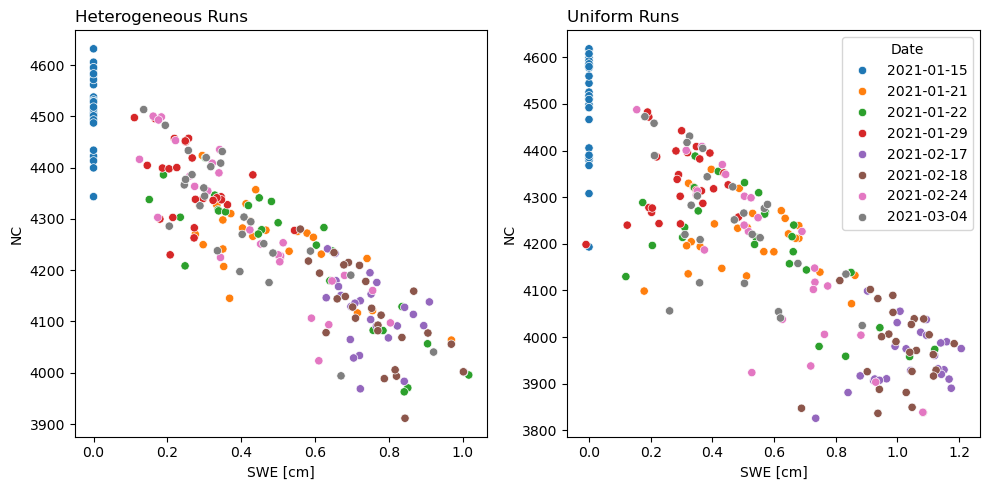

In [90]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=ncdf_no_control, x='SWE [cm]', y='NC', hue='Date', ax=axs[0], legend=False)
sns.scatterplot(data=ncdf_u_171m_no_control,x='SWE [cm]', y='NC', hue=ncdf_u_171m_no_control['Date'].dt.date, ax=axs[1])
axs[0].set_title('Heterogeneous Runs', loc='left')
axs[1].set_title('Uniform Runs', loc='left')
plt.tight_layout()

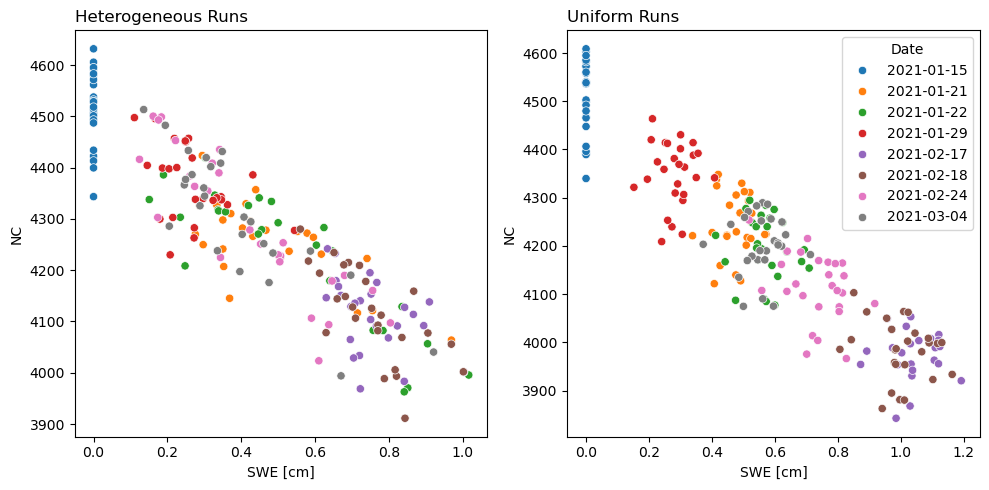

In [83]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=ncdf_no_control, x='SWE [cm]', y='NC', hue='Date', ax=axs[0], legend=False)
sns.scatterplot(data=ncdf_u_carc_no_control,x='SWE [cm]', y='NC', hue=ncdf_u_carc_no_control['Date'].dt.date, ax=axs[1])
axs[0].set_title('Heterogeneous Runs', loc='left')
axs[1].set_title('Uniform Runs', loc='left')
plt.tight_layout()

In [84]:
mean_squared_error(ncdf_no_control['SWE [cm]'],
                   ncdf_u_171m_no_control['SWE [cm]'])

0.03788254559994398

In [85]:
ncdf_u_171m_no_control.to_csv('wtf.csv')

<Axes: title={'center': 'SWE [cm]'}, xlabel='[Date]'>

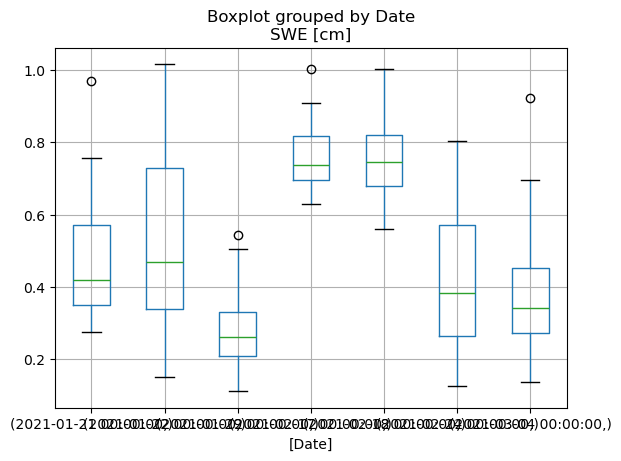

In [86]:
ncdf_no_control[ncdf_no_control['Date']!='2021-01-15'].boxplot(column=['SWE [cm]'], by=['Date'])

<Axes: title={'center': 'SWE [cm]'}, xlabel='[Date]'>

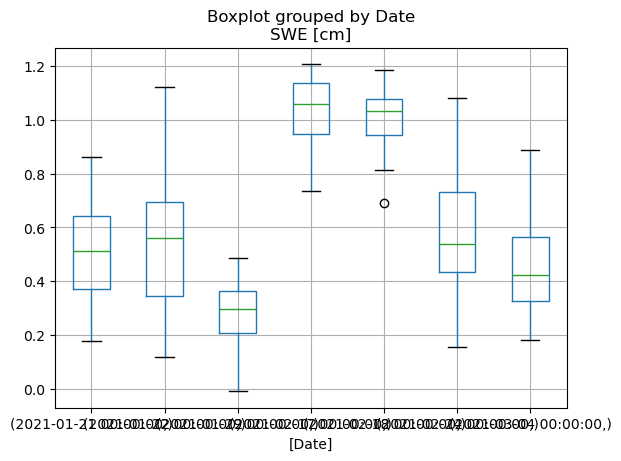

In [87]:
ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']!='2021-01-15'].boxplot(column=['SWE [cm]'], by=['Date'])

<Axes: title={'center': 'SWE [cm]'}, xlabel='[Date]'>

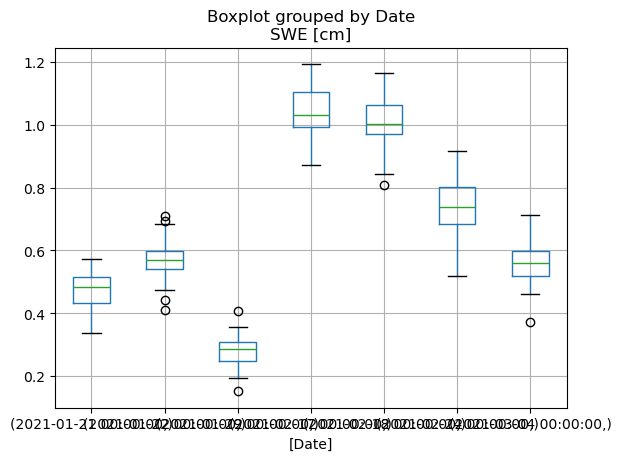

In [88]:
ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']!='2021-01-15'].boxplot(column=['SWE [cm]'], by=['Date'])

Text(0.5, 0.98, 'Comparisons against Uniform Snow (171 m Avg.)')

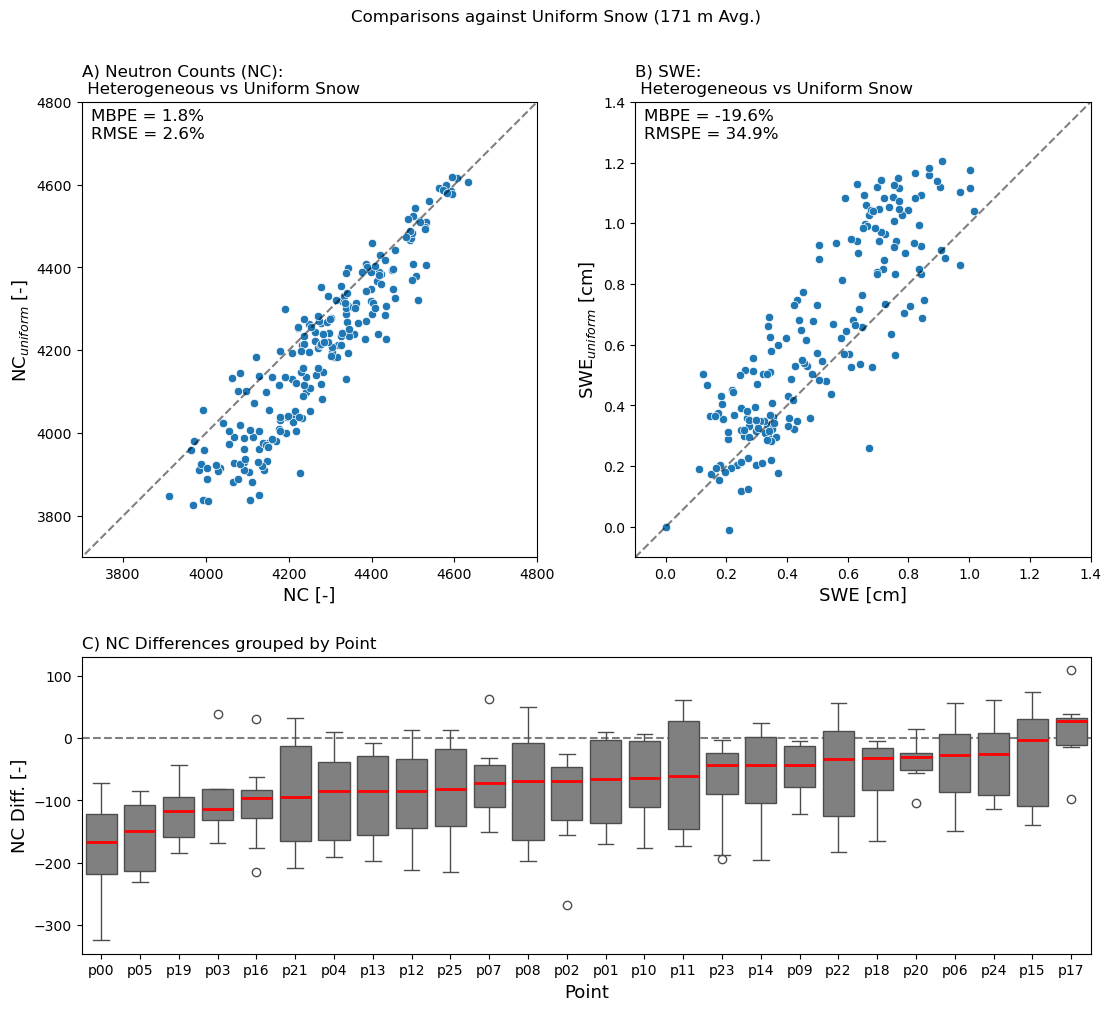

In [579]:
# fig, axs = plt.subplots(1,2, figsize=(13,6))

fig = plt.figure(figsize=(11,10), layout='constrained')
gs = fig.add_gridspec(2,2, height_ratios=[1,0.5])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_aspect('equal', adjustable='box')

ax1.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)
sns.scatterplot(x=ncdf_no_control['NC'],
                y=ncdf_u_171m_no_control['NC'], ax=ax1, legend=False)

# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
ax1.set_xlim(3700,4800)
ax1.set_ylim(3700,4800)

# axs[1].set_aspect('equal', 'box')

ax2 = fig.add_subplot(gs[0,1])
ax2.set_aspect('equal', adjustable='box')
ax2.plot(np.arange(-0.1,1.9,.1), np.arange(-0.1,1.9,.1), 'k--', alpha=0.5)
sns.scatterplot(x=ncdf_no_control['SWE [cm]'], y=ncdf_u_171m_no_control['SWE [cm]'], 
                ax=ax2)
# sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1))
# print(ncdf_no_control['SWE [cm]'].min())
# print(ncdf_no_control['SWE [cm]'].max())
# print(ncdf_u_no_control['SWE [cm]'].min())
# print(ncdf_u_no_control['SWE [cm]'].max())
ax2.set_xlim(-0.1,1.4)
ax2.set_ylim(-0.1,1.4)

ax1.set_title('A) Neutron Counts (NC):\n Heterogeneous vs Uniform Snow', loc='left')
ax2.set_title('B) SWE:\n Heterogeneous vs Uniform Snow', loc='left')

ax1.set_xlabel('NC [-]', fontsize=13)
ax2.set_xlabel('SWE [cm]', fontsize=13)
ax1.set_ylabel(r'NC$_{uniform}$ [-]', fontsize=13)
ax2.set_ylabel(r'SWE$_{uniform}$ [cm]', fontsize=13)

mbe_a = mean_bias_error(ncdf_no_control['NC'],
                    ncdf_u_171m_no_control['NC'])
mbe_b = mean_bias_error(ncdf_no_control['SWE [cm]'],
                ncdf_u_171m_no_control['SWE [cm]'])
rmse_a = np.sqrt(mean_squared_error(ncdf_no_control['NC'],
                           ncdf_u_171m_no_control['NC']))
rmse_b =np.sqrt(mean_squared_error(ncdf_no_control['SWE [cm]'],
                           ncdf_u_171m_no_control['SWE [cm]']))
mbpe_a = mbe_a/ncdf_u_171m_no_control['NC'].mean()
rmspe_a = rmse_a/ncdf_u_171m_no_control['NC'].mean()
mbpe_b = mbe_b/ncdf_u_171m_no_control['SWE [cm]'].mean()
rmspe_b = rmse_b/ncdf_u_171m_no_control['SWE [cm]'].mean()

ax1.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_a*100), transform=ax1.transAxes, fontsize=12)
ax1.text(0.02,0.92, 'RMSE = {:.1f}%'.format(rmspe_a*100), transform=ax1.transAxes, fontsize=12)

ax2.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_b*100), transform=ax2.transAxes, fontsize=12)
ax2.text(0.02,0.92, 'RMSPE = {:.1f}%'.format(rmspe_b*100), transform=ax2.transAxes, fontsize=12)
#
# fig, ax = plt.subplots(figsize=(10,5))
# my_brain2.boxplot(ax=ax, column='diff_f', by='Point')
ax3 = fig.add_subplot(gs[1,0:2])
# ax3.set_aspect(0.5)
sorted_meds = my_brain2.groupby('Point')['diff_f'].median().sort_values()
ax3.axhline(0, color='k', ls='--', alpha=0.5)
sns.boxplot(ax=ax3, data=my_brain2, x='Point', y='diff_f',
            order=sorted_meds.index, color='grey',
            medianprops={"color": "r", "linewidth": 2})
ax3.set_title('C) NC Differences grouped by Point', loc='left')
ax3.set_ylabel('NC Diff. [-]', fontsize=13)
ax3.set_xlabel('Point', fontsize=13)

plt.suptitle('Comparisons against Uniform Snow (171 m Avg.)')
# plt.savefig('./figs/to_publish/f6.png', bbox_inches='tight', facecolor='w', dpi=300)

# plt.savefig(save_figs_to+'uniform_v_distribution.png', bbox_inches='tight', facecolor='w')

1.8150776222588465

2.6247632470232207

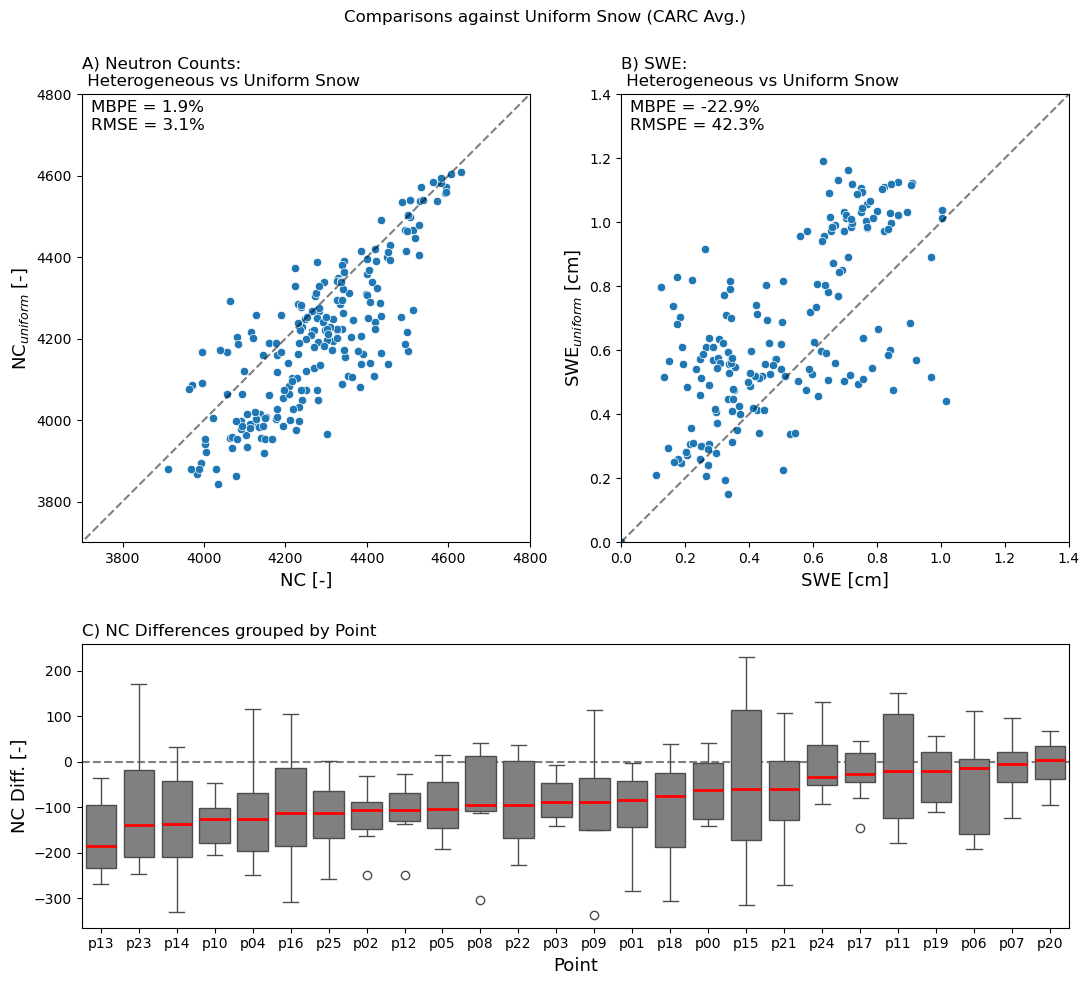

In [581]:
fig = plt.figure(figsize=(11,10), layout='constrained')
gs = fig.add_gridspec(2,2, height_ratios=[1,0.5])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_aspect('equal', adjustable='box')
ax2 = fig.add_subplot(gs[0,1])
ax2.set_aspect('equal', adjustable='box')

ax1.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)
sns.scatterplot(x=ncdf_no_control['NC'],
                y=ncdf_u_carc_no_control['NC'], ax=ax1, legend=False)

# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
ax1.set_xlim(3700,4800)
ax1.set_ylim(3700,4800)

# axs[1].set_aspect('equal', 'box')
ax2.plot(np.arange(0,1.9,.1), np.arange(0,1.9,.1), 'k--', alpha=0.5)
sns.scatterplot(x=ncdf_no_control['SWE [cm]'], y=ncdf_u_carc_no_control['SWE [cm]'], 
                ax=ax2)
# sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1))
# print(ncdf_no_control['SWE [cm]'].min())
# print(ncdf_no_control['SWE [cm]'].max())
# print(ncdf_u_no_control['SWE [cm]'].min())
# print(ncdf_u_no_control['SWE [cm]'].max())
ax2.set_xlim(0,1.4)
ax2.set_ylim(0,1.4)

ax1.set_title('A) Neutron Counts:\n Heterogeneous vs Uniform Snow', loc='left')
ax2.set_title('B) SWE:\n Heterogeneous vs Uniform Snow', loc='left')

ax1.set_xlabel('NC [-]', fontsize=13)
ax2.set_xlabel('SWE [cm]', fontsize=13)
ax1.set_ylabel(r'NC$_{uniform}$ [-]', fontsize=13)
ax2.set_ylabel(r'SWE$_{uniform}$ [cm]', fontsize=13)

mbe_a = mean_bias_error(ncdf_no_control['NC'],
                    ncdf_u_carc_no_control['NC'])
mbe_b = mean_bias_error(ncdf_no_control['SWE [cm]'],
                ncdf_u_carc_no_control['SWE [cm]'])
rmse_a = np.sqrt(mean_squared_error(ncdf_no_control['NC'],
                           ncdf_u_carc_no_control['NC']))
rmse_b =np.sqrt(mean_squared_error(ncdf_no_control['SWE [cm]'],
                           ncdf_u_carc_no_control['SWE [cm]']))

mbpe_a = mbe_a/ncdf_u_carc_no_control['NC'].mean()
rmspe_a = rmse_a/ncdf_u_carc_no_control['NC'].mean()
mbpe_b = mbe_b/ncdf_u_carc_no_control['SWE [cm]'].mean()
rmspe_b = rmse_b/ncdf_u_carc_no_control['SWE [cm]'].mean()

ax1.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_a*100), transform=ax1.transAxes, fontsize=12)
ax1.text(0.02,0.92, 'RMSE = {:.1f}%'.format(rmspe_a*100), transform=ax1.transAxes, fontsize=12)

ax2.text(0.02,0.96, 'MBPE = {:.1f}%'.format(mbpe_b*100), transform=ax2.transAxes, fontsize=12)
ax2.text(0.02,0.92, 'RMSPE = {:.1f}%'.format(rmspe_b*100), transform=ax2.transAxes, fontsize=12)
#

ax3 = fig.add_subplot(gs[1,0:2])
# ax3.set_aspect(0.5)
sorted_meds = my_brain2.groupby('Point')['diff_c'].median().sort_values()
ax3.axhline(0, color='k', ls='--', alpha=0.5)
sns.boxplot(ax=ax3, data=my_brain2, x='Point', y='diff_c',
            order=sorted_meds.index, color='grey',
            medianprops={"color": "r", "linewidth": 2})
ax3.set_title('C) NC Differences grouped by Point', loc='left')
ax3.set_ylabel('NC Diff. [-]', fontsize=13)
ax3.set_xlabel('Point', fontsize=13)

plt.suptitle('Comparisons against Uniform Snow (CARC Avg.)')
plt.tight_layout()

# plt.savefig(save_figs_to+'uniform_v_distribution.png', bbox_inches='tight', facecolor='w')
# plt.savefig('./figs/to_publish/f7.png', bbox_inches='tight', facecolor='w', dpi=300)


In [90]:
dates = ncdf_no_control[ncdf_no_control['Date']!='2021-01-15'].Date.unique()

In [91]:
swe_footprint = pd.read_csv('./w_swe_footprint.csv')
swe_footprint['Date'] = dates

In [92]:
swe_long = swe_footprint.melt(id_vars=['Date'])

In [93]:
swe_long.columns = ['Date', 'Point', 'L SWE [mm]']

In [94]:
comp_mod_lidar = ncdf_no_control[ncdf_no_control['Date']!='2021-01-15'].merge(swe_long, on=['Date', 'Point'])

In [95]:
comp_mod_lidar2 = ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']!='2021-01-15'].merge(swe_long, on=['Date', 'Point'])

In [96]:
comp_mod_lidar['L SWE [cm]'] = comp_mod_lidar['L SWE [mm]']/10

In [97]:
comp_mod_lidar2['L SWE [cm]'] = comp_mod_lidar['L SWE [mm]']/10

Text(0.0, 1.0, 'b) Uniform Runs (171 m)')

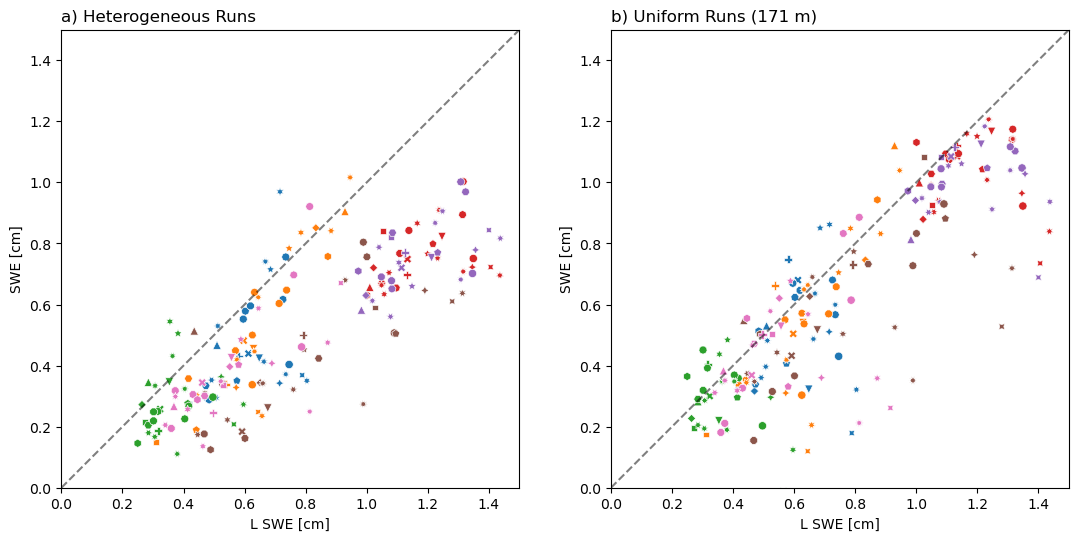

In [98]:
fig= plt.figure(figsize=(13,6))

gs = fig.add_gridspec(1,2)

ax = fig.add_subplot(gs[0])
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(ax=ax, data=comp_mod_lidar, x='L SWE [cm]', y='SWE [cm]', hue='Date', style='Point', legend=False)
ax.plot(np.arange(0,1.9,.1), np.arange(0,1.9,.1), 'k--', alpha=0.5)
ax.axis([0,1.5,0,1.5])

ax1 = fig.add_subplot(gs[1])
ax1.set_aspect('equal', adjustable='box')
sns.scatterplot(ax=ax1, data=comp_mod_lidar2, x='L SWE [cm]', y='SWE [cm]', hue='Date', style='Point', legend=False)
ax1.plot(np.arange(0,1.9,.1), np.arange(0,1.9,.1), 'k--', alpha=0.5)
ax1.axis([0,1.5,0,1.5])

ax.set_title('a) Heterogeneous Runs', loc='left')
ax1.set_title('b) Uniform Runs (171 m)', loc='left')

In [99]:
ncdf_u_171m_no_control

Date Point           NC  SWE [cm]
0   2021-01-15   p00  4379.274446      -0.0
1   2021-01-15   p01  4615.369307      -0.0
2   2021-01-15   p02  4385.063060      -0.0
3   2021-01-15   p03  4544.482750      -0.0
4   2021-01-15   p04  4368.004657      -0.0
..         ...   ...          ...       ...
203 2021-03-04   p21  4284.559933  0.578583
204 2021-03-04   p22  4458.627493  0.210898
205 2021-03-04   p23  4302.800212  0.351218
206 2021-03-04   p24  4024.726221  0.885724
207 2021-03-04   p25  4389.298932   0.21212

[208 rows x 4 columns]

In [100]:
swe_diff = ncdf_no_control.merge(ncdf_u_171m_no_control, how='left', on=['Date', 'Point'])

In [101]:
swe_diff['diff swe [cm]'] = swe_diff['SWE [cm]_y'] - swe_diff['SWE [cm]_x']
swe_diff['diff NC'] = swe_diff['NC_y'] - swe_diff['NC_x']

<Axes: xlabel='Point'>

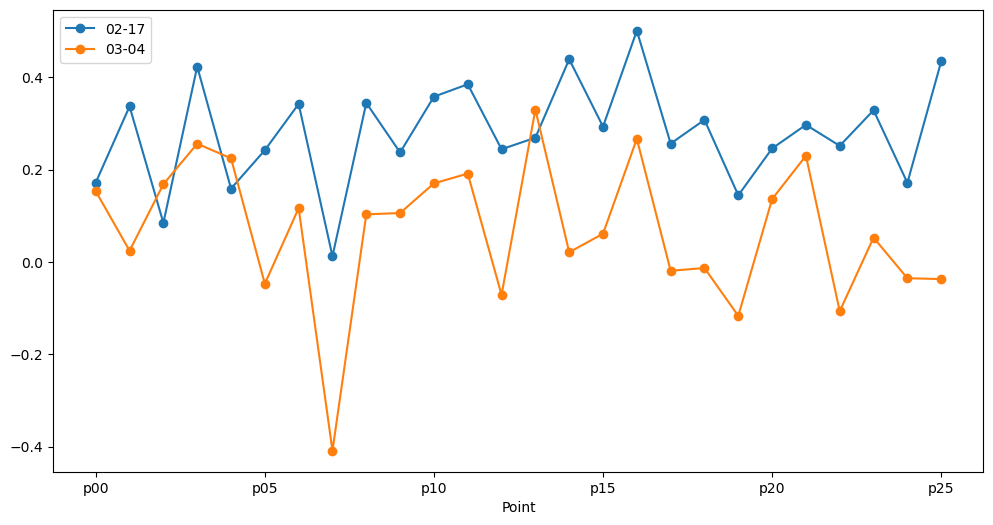

In [102]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Date']=='2021-02-17'].plot(ax=ax, x='Point', y='diff swe [cm]', marker='o', ls='-', label='02-17')
swe_diff[swe_diff['Date']=='2021-03-04'].plot(ax=ax, x='Point', y='diff swe [cm]', marker='o', ls='-', label='03-04')

# swe_diff.boxplot(ax=ax, column='diff swe [cm]', by='Point')

<Axes: xlabel='Point'>

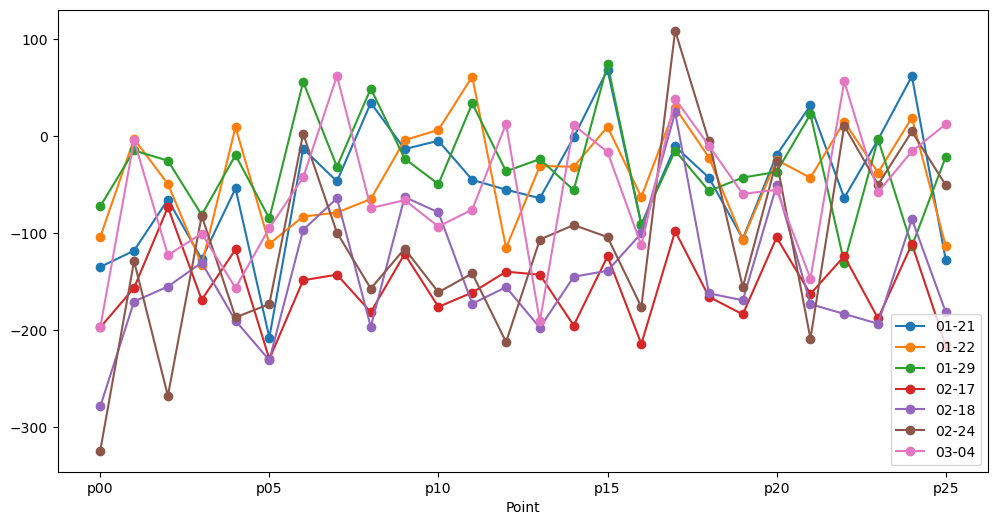

In [103]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Date']=='2021-01-21'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='01-21')
swe_diff[swe_diff['Date']=='2021-01-22'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='01-22')
swe_diff[swe_diff['Date']=='2021-01-29'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='01-29')
swe_diff[swe_diff['Date']=='2021-02-17'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='02-17')
swe_diff[swe_diff['Date']=='2021-02-18'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='02-18')
swe_diff[swe_diff['Date']=='2021-02-24'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='02-24')
swe_diff[swe_diff['Date']=='2021-03-04'].plot(ax=ax, x='Point', y='diff NC', marker='o', ls='-', label='03-04')

# swe_diff.boxplot(ax=ax, column='diff swe [cm]', by='Point')

<Axes: title={'center': 'diff swe [cm]'}, xlabel='Date'>

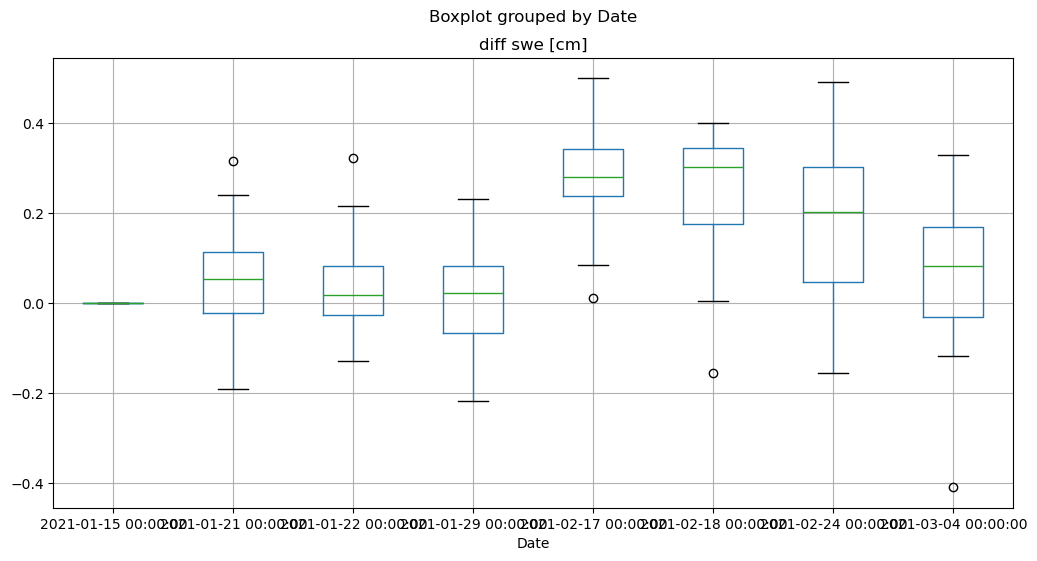

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
# swe_diff.groupby('Date').plot(ax=ax, x='Point', y='diff swe [cm]', marker='o', ls='-')
swe_diff.boxplot(ax=ax, column='diff swe [cm]', by='Date')

In [105]:
uw_fpt_swes = pd.read_csv('./data/footprint_swe_vals.csv',
                          parse_dates=['dates'], date_format='%m/%d')
uw_fpt_swes = uw_fpt_swes[['pts', 'dates', 'SWE']]
uw_fpt_swes['year'] = 2021
# uw_fpt_swes.columns = [['Point', 'Date', 'UW SWE [cm]']]
uw_fpt_swes['Date'] = pd.to_datetime(dict(year=uw_fpt_swes['year'],
                                          month=uw_fpt_swes['dates'].dt.month,
                                          day=uw_fpt_swes['dates'].dt.day))


In [106]:
uw_fpt_swes.Date

0     2021-01-15
1     2021-01-21
2     2021-01-22
3     2021-01-29
4     2021-02-17
         ...    
203   2021-01-29
204   2021-02-17
205   2021-02-18
206   2021-02-24
207   2021-03-04
Name: Date, Length: 208, dtype: datetime64[ns]

<Axes: xlabel='Date'>

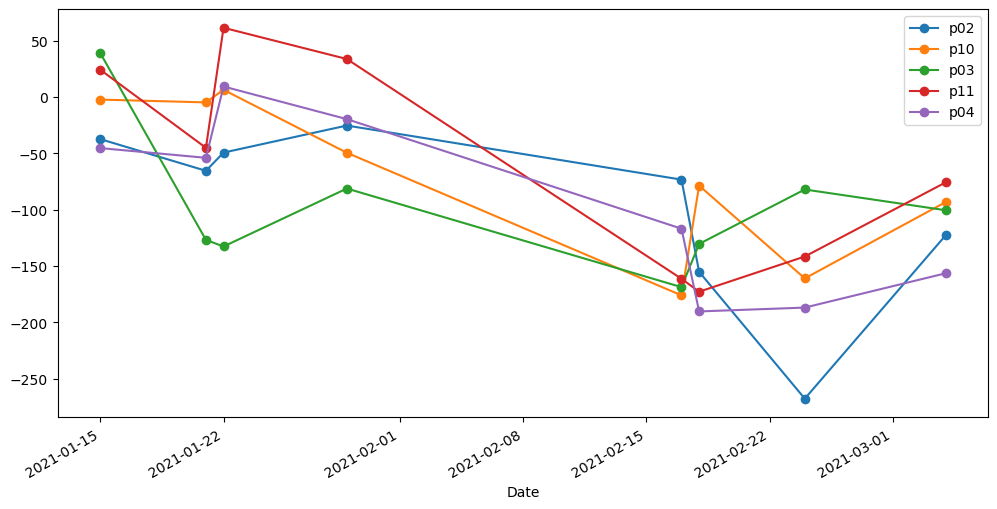

In [107]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p02'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p02')
swe_diff[swe_diff['Point']=='p10'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p10')
swe_diff[swe_diff['Point']=='p03'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p03')
swe_diff[swe_diff['Point']=='p11'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p11')
swe_diff[swe_diff['Point']=='p04'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p04')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

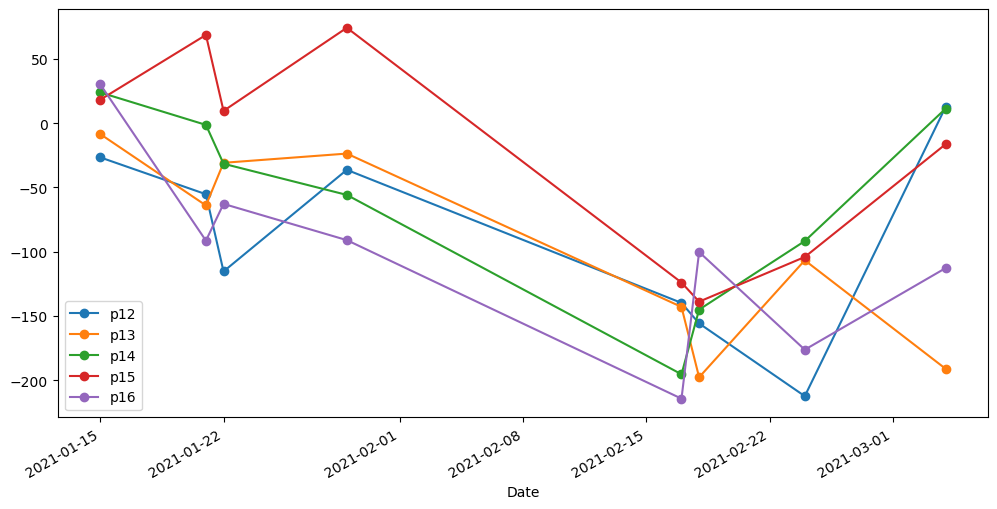

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p12'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p12')
swe_diff[swe_diff['Point']=='p13'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p13')
swe_diff[swe_diff['Point']=='p14'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p14')
swe_diff[swe_diff['Point']=='p15'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p15')
swe_diff[swe_diff['Point']=='p16'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p16')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

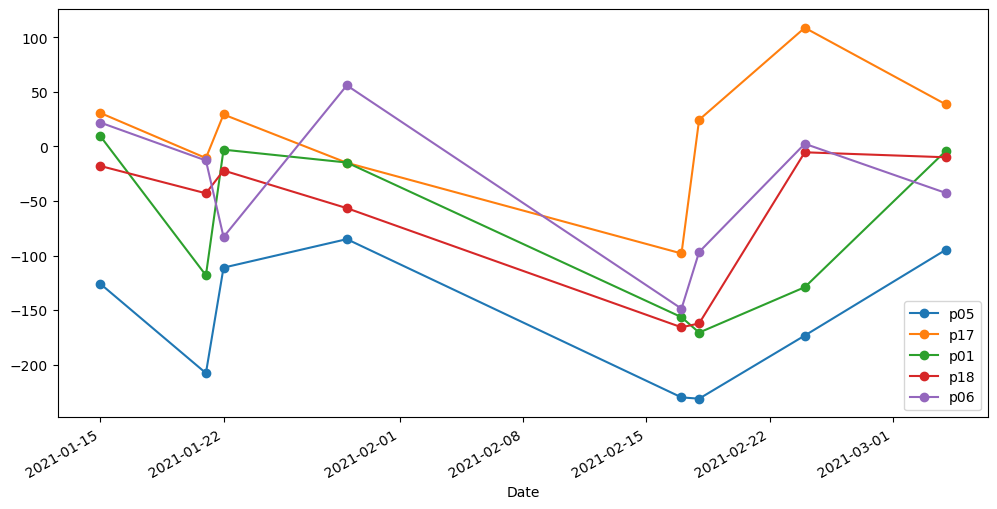

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p05'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p05')
swe_diff[swe_diff['Point']=='p17'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p17')
swe_diff[swe_diff['Point']=='p01'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p01')
swe_diff[swe_diff['Point']=='p18'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p18')
swe_diff[swe_diff['Point']=='p06'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p06')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

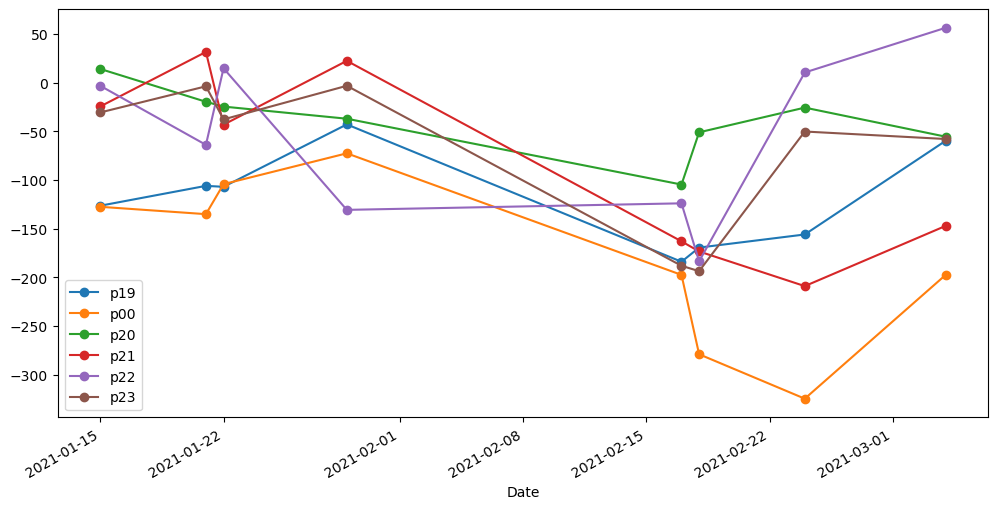

In [110]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p19'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p19')
swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')
swe_diff[swe_diff['Point']=='p20'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p20')
swe_diff[swe_diff['Point']=='p21'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p21')
swe_diff[swe_diff['Point']=='p22'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p22')
swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

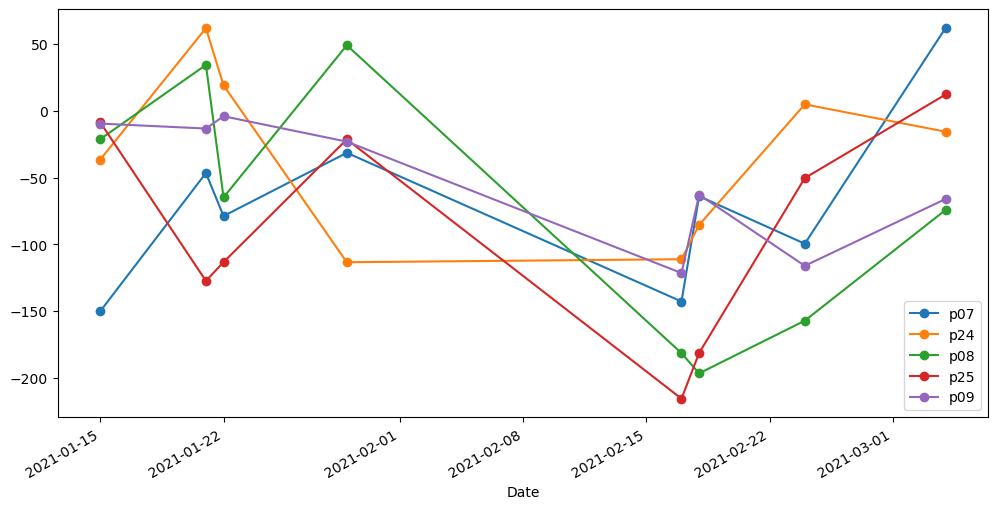

In [111]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p07'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p07')
swe_diff[swe_diff['Point']=='p24'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p24')
swe_diff[swe_diff['Point']=='p08'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p08')
swe_diff[swe_diff['Point']=='p25'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p25')
swe_diff[swe_diff['Point']=='p09'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p09')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

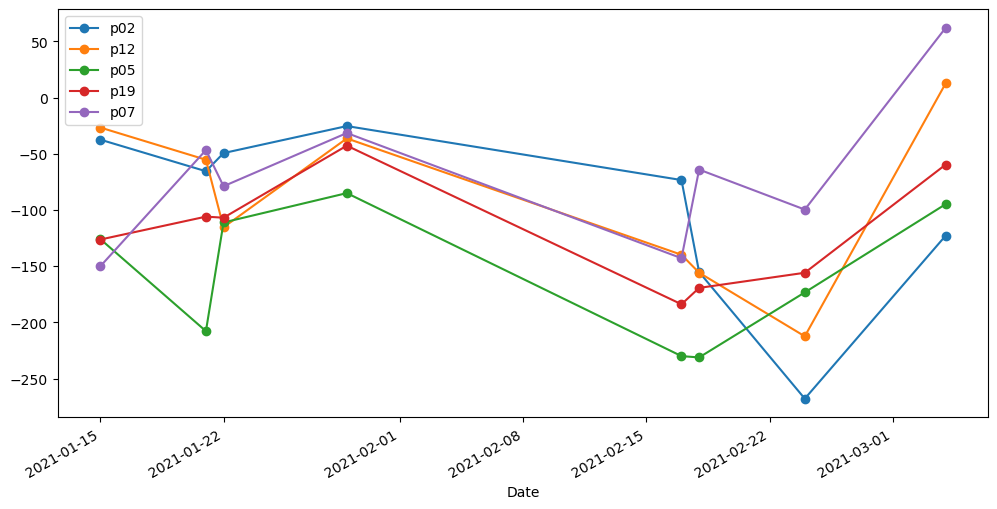

In [112]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p02'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p02')
swe_diff[swe_diff['Point']=='p12'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p12')
swe_diff[swe_diff['Point']=='p05'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p05')
swe_diff[swe_diff['Point']=='p19'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p19')
swe_diff[swe_diff['Point']=='p07'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p07')


# swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p23')
# swe_diff[swe_diff['Point']=='p00'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='p00')

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


In [113]:
# fig, ax = plt.subplots(figsize=(12,6))

# ax2 = ax.twinx()
# swe_diff[swe_diff['Point']=='p04'].plot(ax=ax2, x='Date', y='diff swe [cm]', marker='o', ls='-', label='01-21')


<Axes: xlabel='Date'>

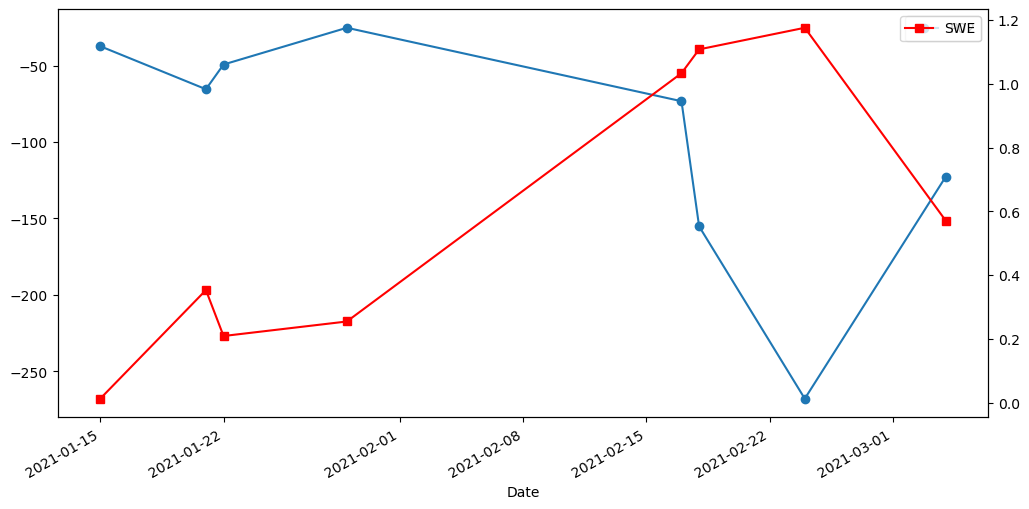

In [114]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p02'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='P02')


ax2 = ax.twinx()
uw_fpt_swes[uw_fpt_swes['pts']=='p02'].plot(ax=ax2, x='Date', y='SWE',
                                            marker='s',color='r')

<Axes: xlabel='Date'>

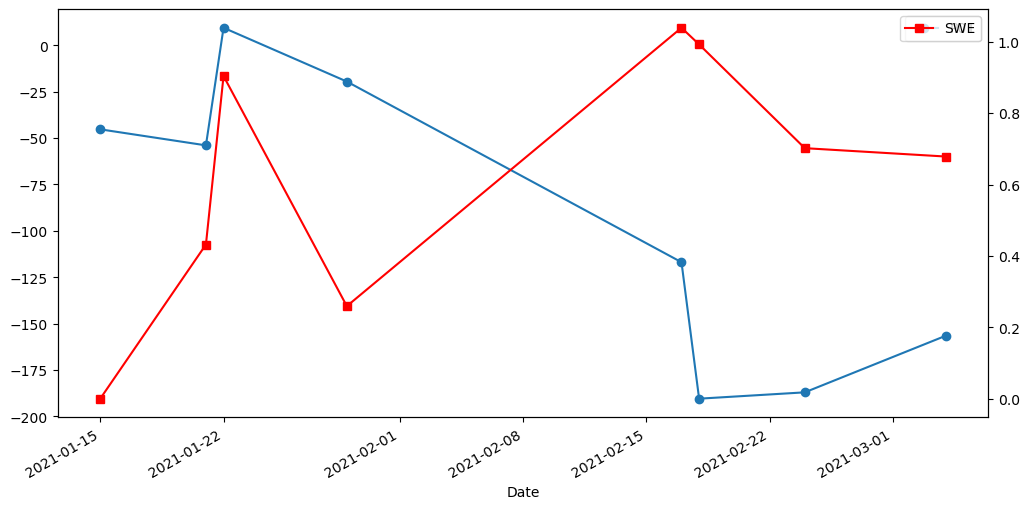

In [115]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p04'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='P01')


ax2 = ax.twinx()
uw_fpt_swes[uw_fpt_swes['pts']=='p04'].plot(ax=ax2, x='Date', y='SWE',
                                            marker='s',color='r')

<Axes: xlabel='Date'>

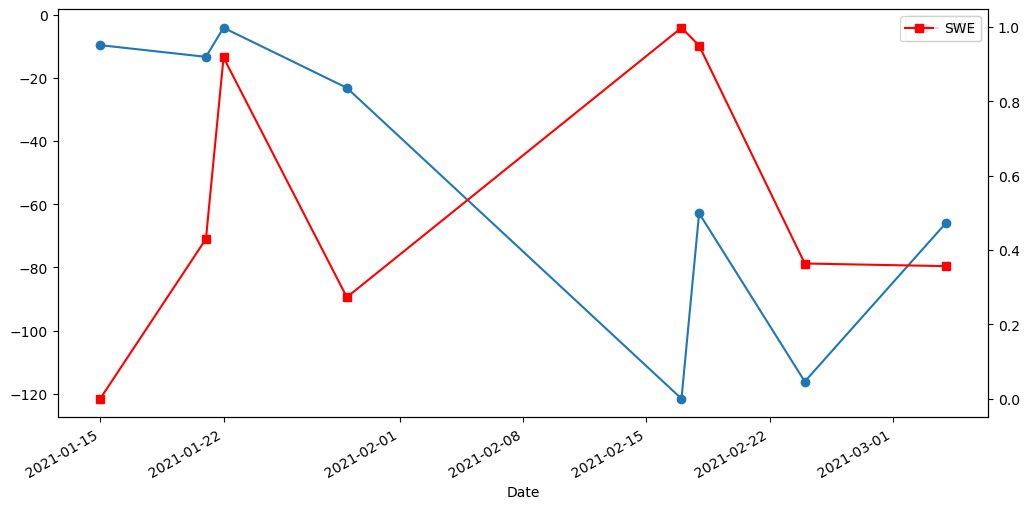

In [116]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p09'].plot(ax=ax, x='Date', y='diff NC', marker='o', ls='-', label='P01')


ax2 = ax.twinx()
uw_fpt_swes[uw_fpt_swes['pts']=='p09'].plot(ax=ax2, x='Date', y='SWE',
                                            marker='s',color='r')

In [117]:
#constants
dsm_paths = np.sort(glob.glob('./DSMs/*.tif'))

def spatialweighting(xind, yind):
    # create 500 by 500 of distances (in meters)
    xs = np.arange(2,1000.1,2)
    ys = np.arange(2,1000.1,2)
    
    # center the distances from CRNS location at (xind, yind)
    xs_centered = xs - 2*int(xind)
    ys_centered = 2*int(yind) - ys
    
    # compute distances
    XX, YY = np.meshgrid(xs_centered, ys_centered)
    dists = np.sqrt(XX**2 + YY**2)
    return(dists)


def calcBarePercent(dist_mat, point, paths = dsm_paths):
    BarePERs = np.zeros(len(paths)+1)+100
    sd_ranges = np.zeros(len(paths)+1)
    std_ranges = np.zeros(len(paths)+1)
    
    for i, p in enumerate(paths):
        raster = gdal.Open(p)       # read in DSM rasters
        # calculate bare percentage
        sd_array = raster.ReadAsArray()
        sd_masked = np.ma.masked_where(dist_mat > 171, sd_array)
        
        bare_p = (sd_masked[~sd_masked.mask]==0).sum()/len((sd_masked[~sd_masked.mask]))*100
        BarePERs[i+1] = bare_p

        sd_r = sd_masked.max() - sd_masked[sd_masked>0].min()
        sd_ranges[i+1] = sd_r

        std_devs = sd_masked.std()
        std_ranges[i+1] = std_devs
        
    bp_df = pd.DataFrame({
        'Date':['20210115','20210121','20210122', '20210129', '20210217', '20210218', '20210224', '20210304'],
        'Point':np.repeat(point, 8),
        'Percent Bare [%]':BarePERs
    })

    iqr_df = pd.DataFrame({
        'Date':['20210115','20210121','20210122', '20210129', '20210217', '20210218', '20210224', '20210304'],
        'Point':np.repeat(point, 8),
        'Range [m]':sd_ranges
    })
    
    std_df = pd.DataFrame({
        'Date':['20210115','20210121','20210122', '20210129', '20210217', '20210218', '20210224', '20210304'],
        'Point':np.repeat(point, 8),
        'STD [m]':std_ranges
    })
    
    return(bp_df, iqr_df, std_df)

In [118]:
def getINDS(xv, yv):
    xx = (xv + 500)/2
    yy = np.abs(yv - 500)/2
    return(xx-1, yy-1)

In [474]:
p01 = getINDS(0,0)
p02 = getINDS(-280,280)
p03 = getINDS(0,280)
p04 = getINDS(280,280)
p05 = getINDS(-280,0)
p06 = getINDS(280,0)
p07 = getINDS(-280,-280)
p08 = getINDS(0,-280)
p09 = getINDS(280,-280)
p10 = getINDS(-140,280)
p11 = getINDS(140,280)
p12 = getINDS(-280,140)
p13 = getINDS(-140,140)
p14 = getINDS(0,140)
p15 = getINDS(140,140)
p16 = getINDS(280,140)
p17 = getINDS(-140,0)
p18 = getINDS(140,0)
p19 = getINDS(-280,-140)
p20 = getINDS(-140,-140)
p21 = getINDS(0,-140)
p22 = getINDS(140,-140)
p23 = getINDS(280,-140)
p24 = getINDS(-140,-280)
p25 = getINDS(-140,-280)

In [120]:
dists_p00 = spatialweighting(m_x, m_y)
dists_p01 = spatialweighting(p01[0], p01[1])
dists_p02 = spatialweighting(p02[0], p02[1])
dists_p03 = spatialweighting(p03[0], p03[1])
dists_p04 = spatialweighting(p04[0], p04[1])
dists_p05 = spatialweighting(p05[0], p05[1])
dists_p06 = spatialweighting(p06[0], p06[1])
dists_p07 = spatialweighting(p07[0], p07[1])
dists_p08 = spatialweighting(p08[0], p08[1])
dists_p09 = spatialweighting(p09[0], p09[1])
dists_p10 = spatialweighting(p10[0], p10[1])
dists_p11 = spatialweighting(p11[0], p11[1])
dists_p12 = spatialweighting(p12[0], p12[1])
dists_p13 = spatialweighting(p13[0], p13[1])
dists_p14 = spatialweighting(p14[0], p14[1])
dists_p15 = spatialweighting(p15[0], p15[1])
dists_p16 = spatialweighting(p16[0], p16[1])
dists_p17 = spatialweighting(p17[0], p17[1])
dists_p18 = spatialweighting(p18[0], p18[1])
dists_p19 = spatialweighting(p19[0], p19[1])
dists_p20 = spatialweighting(p20[0], p20[1])
dists_p21 = spatialweighting(p21[0], p21[1])
dists_p22 = spatialweighting(p22[0], p22[1])
dists_p23 = spatialweighting(p23[0], p23[1])
dists_p24 = spatialweighting(p24[0], p24[1])
dists_p25 = spatialweighting(p25[0], p25[1])

bare_per_p00, iqr_sd_p00, stds_p00 = calcBarePercent(dists_p00, 'p00')
bare_per_p01, iqr_sd_p01, stds_p01 = calcBarePercent(dists_p01, 'p01')
bare_per_p02, iqr_sd_p02, stds_p02 = calcBarePercent(dists_p02, 'p02')
bare_per_p03, iqr_sd_p03, stds_p03 = calcBarePercent(dists_p03, 'p03')
bare_per_p04, iqr_sd_p04, stds_p04 = calcBarePercent(dists_p04, 'p04')
bare_per_p05, iqr_sd_p05, stds_p05 = calcBarePercent(dists_p05, 'p05')
bare_per_p06, iqr_sd_p06, stds_p06 = calcBarePercent(dists_p06, 'p06')
bare_per_p07, iqr_sd_p07, stds_p07 = calcBarePercent(dists_p07, 'p07')
bare_per_p08, iqr_sd_p08, stds_p08 = calcBarePercent(dists_p08, 'p08')
bare_per_p09, iqr_sd_p09, stds_p09 = calcBarePercent(dists_p09, 'p09')
bare_per_p10, iqr_sd_p10, stds_p10 = calcBarePercent(dists_p10, 'p10')
bare_per_p11, iqr_sd_p11, stds_p11 = calcBarePercent(dists_p11, 'p11')
bare_per_p12, iqr_sd_p12, stds_p12 = calcBarePercent(dists_p12, 'p12')
bare_per_p13, iqr_sd_p13, stds_p13 = calcBarePercent(dists_p13, 'p13')
bare_per_p14, iqr_sd_p14, stds_p14 = calcBarePercent(dists_p14, 'p14')
bare_per_p15, iqr_sd_p15, stds_p15 = calcBarePercent(dists_p15, 'p15')
bare_per_p16, iqr_sd_p16, stds_p16 = calcBarePercent(dists_p16, 'p16')
bare_per_p17, iqr_sd_p17, stds_p17 = calcBarePercent(dists_p17, 'p17')
bare_per_p18, iqr_sd_p18, stds_p18 = calcBarePercent(dists_p18, 'p18')
bare_per_p19, iqr_sd_p19, stds_p19 = calcBarePercent(dists_p19, 'p19')
bare_per_p20, iqr_sd_p20, stds_p20 = calcBarePercent(dists_p20, 'p20')
bare_per_p21, iqr_sd_p21, stds_p21 = calcBarePercent(dists_p21, 'p21')
bare_per_p22, iqr_sd_p22, stds_p22 = calcBarePercent(dists_p22, 'p22')
bare_per_p23, iqr_sd_p23, stds_p23 = calcBarePercent(dists_p23, 'p23')
bare_per_p24, iqr_sd_p24, stds_p24 = calcBarePercent(dists_p24, 'p24')
bare_per_p25, iqr_sd_p25, stds_p25 = calcBarePercent(dists_p25, 'p25')

In [121]:
bare_per_df = pd.concat([bare_per_p00,
                        bare_per_p01,
                        bare_per_p02,
                        bare_per_p03,
                        bare_per_p04,
                        bare_per_p05,
                        bare_per_p06,
                        bare_per_p07,
                        bare_per_p08,
                        bare_per_p09,
                        bare_per_p10,
                        bare_per_p11,
                        bare_per_p12,
                        bare_per_p13,
                        bare_per_p14,
                        bare_per_p15,
                        bare_per_p16,
                        bare_per_p17,
                        bare_per_p18,
                        bare_per_p19,
                        bare_per_p20,
                        bare_per_p21,
                        bare_per_p22,
                        bare_per_p23,
                        bare_per_p24,
                        bare_per_p25
                        ]).reset_index(drop=True)

# bare_per_df
bare_per_df['Date'] = pd.to_datetime(bare_per_df['Date'], format='%Y%m%d')

In [122]:
iqr_sd_df = pd.concat([iqr_sd_p00,
                        iqr_sd_p01,
                        iqr_sd_p02,
                        iqr_sd_p03,
                        iqr_sd_p04,
                        iqr_sd_p05,
                        iqr_sd_p06,
                        iqr_sd_p07,
                        iqr_sd_p08,
                        iqr_sd_p09,
                        iqr_sd_p10,
                        iqr_sd_p11,
                        iqr_sd_p12,
                        iqr_sd_p13,
                        iqr_sd_p14,
                        iqr_sd_p15,
                        iqr_sd_p16,
                        iqr_sd_p17,
                        iqr_sd_p18,
                        iqr_sd_p19,
                        iqr_sd_p20,
                        iqr_sd_p21,
                        iqr_sd_p22,
                        iqr_sd_p23,
                        iqr_sd_p24,
                        iqr_sd_p25
                        ]).reset_index(drop=True)

# iqr_sd_df
iqr_sd_df['Date'] = pd.to_datetime(iqr_sd_df['Date'], format='%Y%m%d')

In [123]:
stds_df = pd.concat([stds_p00,
                        stds_p01,
                        stds_p02,
                        stds_p03,
                        stds_p04,
                        stds_p05,
                        stds_p06,
                        stds_p07,
                        stds_p08,
                        stds_p09,
                        stds_p10,
                        stds_p11,
                        stds_p12,
                        stds_p13,
                        stds_p14,
                        stds_p15,
                        stds_p16,
                        stds_p17,
                        stds_p18,
                        stds_p19,
                        stds_p20,
                        stds_p21,
                        stds_p22,
                        stds_p23,
                        stds_p24,
                        stds_p25
                        ]).reset_index(drop=True)

# stds_df
stds_df['Date'] = pd.to_datetime(stds_df['Date'], format='%Y%m%d')

In [124]:
iqr_sd_df

Date Point  Range [m]
0   2021-01-15   p00     0.0000
1   2021-01-21   p00     0.8674
2   2021-01-22   p00     0.8270
3   2021-01-29   p00     0.8275
4   2021-02-17   p00     0.9188
..         ...   ...        ...
203 2021-01-29   p25     0.6055
204 2021-02-17   p25     0.6046
205 2021-02-18   p25     0.6223
206 2021-02-24   p25     0.5967
207 2021-03-04   p25     0.5321

[208 rows x 3 columns]

In [125]:
stds_df

Date Point   STD [m]
0   2021-01-15   p00  0.000000
1   2021-01-21   p00  0.072731
2   2021-01-22   p00  0.065971
3   2021-01-29   p00  0.065979
4   2021-02-17   p00  0.091460
..         ...   ...       ...
203 2021-01-29   p25  0.032962
204 2021-02-17   p25  0.064375
205 2021-02-18   p25  0.065632
206 2021-02-24   p25  0.052353
207 2021-03-04   p25  0.032974

[208 rows x 3 columns]

In [305]:
my_brain3

Date Point  Percent Bare [%]      diff_f
0   2021-01-15   p00        100.000000 -127.396673
1   2021-01-21   p00         52.917628 -134.945110
2   2021-01-22   p00         56.846961 -104.107042
3   2021-01-29   p00         71.650494  -72.419952
4   2021-02-17   p00          1.971194 -197.362831
..         ...   ...               ...         ...
203 2021-01-29   p25         73.795744  -21.387857
204 2021-02-17   p25          2.811018 -215.675074
205 2021-02-18   p25          3.489839 -181.452809
206 2021-02-24   p25         52.739219  -50.402732
207 2021-03-04   p25         13.010748   12.260353

[208 rows x 4 columns]

In [304]:
my_brain3 = bare_per_df.merge(my_brain2[['Date', 'Point', 'diff_f']])

In [306]:
my_brain3 = my_brain3.merge(stds_df)

In [307]:
my_brain3 = my_brain3.merge(iqr_sd_df)

In [308]:
my_brain3

Date Point  Percent Bare [%]      diff_f   STD [m]  Range [m]
0   2021-01-15   p00        100.000000 -127.396673  0.000000     0.0000
1   2021-01-21   p00         52.917628 -134.945110  0.072731     0.8674
2   2021-01-22   p00         56.846961 -104.107042  0.065971     0.8270
3   2021-01-29   p00         71.650494  -72.419952  0.065979     0.8275
4   2021-02-17   p00          1.971194 -197.362831  0.091460     0.9188
..         ...   ...               ...         ...       ...        ...
203 2021-01-29   p25         73.795744  -21.387857  0.032962     0.6055
204 2021-02-17   p25          2.811018 -215.675074  0.064375     0.6046
205 2021-02-18   p25          3.489839 -181.452809  0.065632     0.6223
206 2021-02-24   p25         52.739219  -50.402732  0.052353     0.5967
207 2021-03-04   p25         13.010748   12.260353  0.032974     0.5321

[208 rows x 6 columns]

In [309]:
stats.pearsonr(my_brain3['Percent Bare [%]'], my_brain3['diff_f'])

PearsonRResult(statistic=0.45069381086216187, pvalue=8.432441735014388e-12)

<Axes: xlabel='Percent Bare [%]', ylabel='diff_f'>

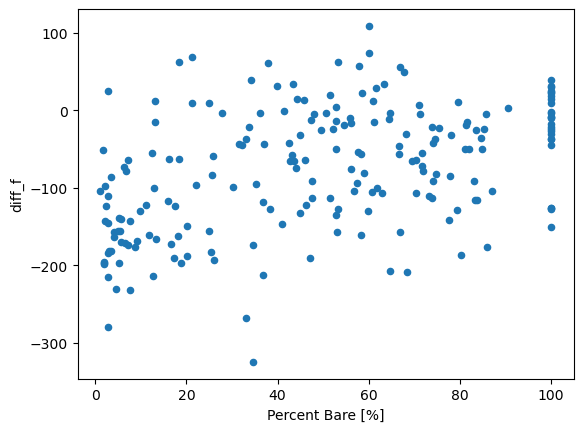

In [315]:
my_brain3.plot(x='Percent Bare [%]', y='diff_f', kind='scatter')

In [310]:
stats.pearsonr(my_brain3['STD [m]'], my_brain3['diff_f'])

PearsonRResult(statistic=-0.6604506395834254, pvalue=1.9420294504610634e-27)

In [311]:
stats.pearsonr(my_brain3['Range [m]'], my_brain3['diff_f'])

PearsonRResult(statistic=-0.5656416400869287, pvalue=5.486349374330117e-19)

In [312]:
stats.pearsonr(my_brain3.groupby('Point')['Percent Bare [%]'].median(), my_brain3.groupby('Point')['diff_f'].median())

PearsonRResult(statistic=0.10659645194801128, pvalue=0.6042585104009179)

In [313]:
stats.pearsonr(my_brain3.groupby('Point')['diff_f'].median(), my_brain3.groupby('Point')['STD [m]'].median())

PearsonRResult(statistic=-0.6425794557745956, pvalue=0.0004004499008420678)

In [314]:
stats.pearsonr(my_brain3.groupby('Point')['diff_f'].median(), my_brain3.groupby('Point')['Range [m]'].median())

PearsonRResult(statistic=-0.5819599246773807, pvalue=0.001815939691892989)

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sorted_meds = my_brain3.groupby('Point')['diff_f'].median().sort_values()
sns.boxplot(ax=ax, data=my_brain2, x='Point', y='diff_f',
            order=sorted_meds.index, color='grey',
            medianprops={"color": "r", "linewidth": 2})

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sorted_meds = my_brain3.groupby('Point')['STD [m]'].median().sort_values()
sns.boxplot(ax=ax, data=my_brain3, x='Point', y='STD [m]', color='grey',
            order=sorted_meds.index, medianprops={"color": "r", "linewidth": 2})

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sorted_meds = my_brain3.groupby('Point')['Range [m]'].median().sort_values()
sns.boxplot(ax=ax, data=my_brain3, x='Point', y='Range [m]', color='grey',
            order=sorted_meds.index, medianprops={"color": "r", "linewidth": 2})

In [ ]:
my_brain3.groupby('Point').median().plot.scatter(x='diff_f', y='STD [m]')

In [ ]:
my_brain3.groupby('Point').median().sort_values('STD [m]')

In [ ]:
my_brain3.groupby('Point').median().sort_values(by='STD [m]')

<Axes: title={'center': 'Percent Bare [%]'}, xlabel='[Point]'>

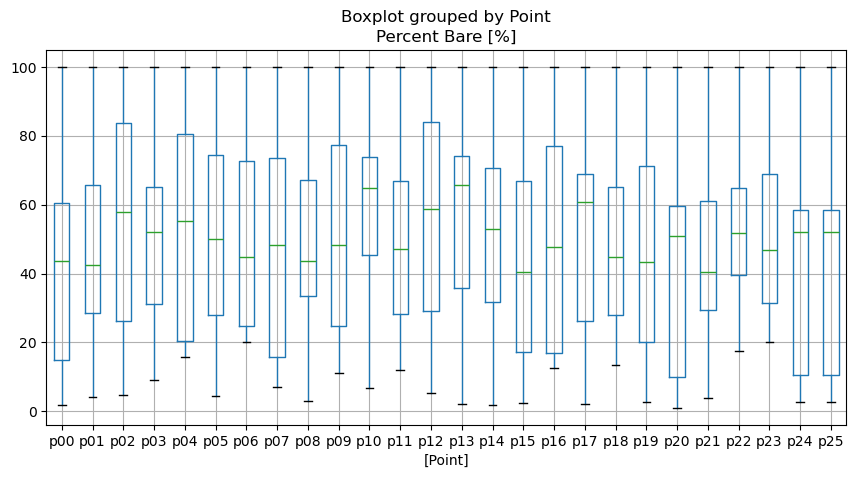

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
bare_per_df.boxplot(ax=ax, by='Point')

<Axes: xlabel='Date'>

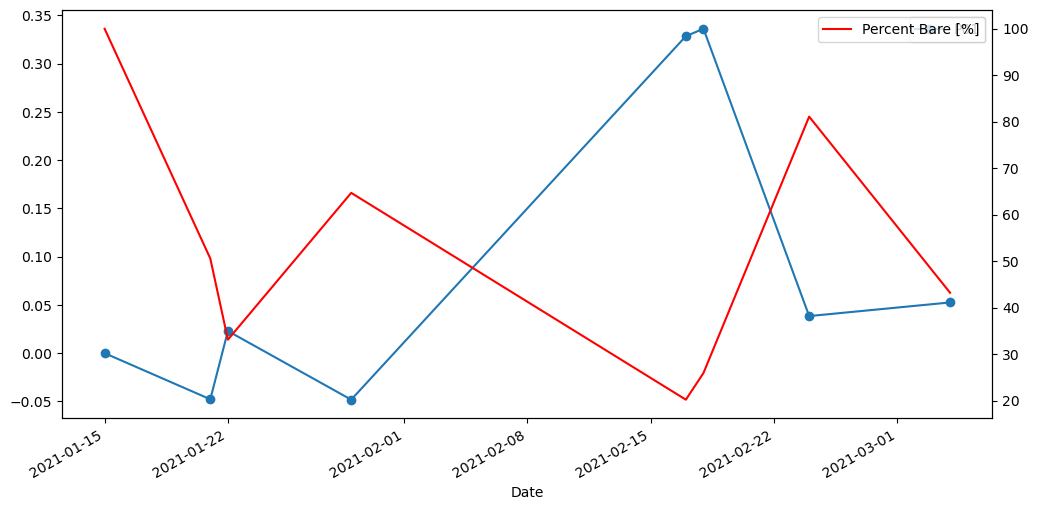

In [137]:
fig, ax = plt.subplots(figsize=(12,6))
swe_diff[swe_diff['Point']=='p23'].plot(ax=ax, x='Date', y='diff swe [cm]', marker='o', ls='-', label='P01')


ax2 = ax.twinx()
# uw_fpt_swes[uw_fpt_swes['pts']=='p23'].plot(ax=ax2, x='Date', y='SWE',
#                                             marker='s',color='r')
bare_per_df[bare_per_df['Point']=='p23'].plot(ax=ax2, x='Date', y='Percent Bare [%]', color='r')

In [138]:
ncdf

Date Point           NC
0     control   p00  4527.370802
1     control   p01  4631.714465
2     control   p02  4399.353600
3     control   p03  4541.137984
4     control   p04  4340.528971
..        ...   ...          ...
229  20210304   p21  4431.558051
230  20210304   p22  4402.028302
231  20210304   p23  4360.523205
232  20210304   p24  4040.378922
233  20210304   p25  4377.038579

[234 rows x 3 columns]

In [96]:
test_idea = ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].copy()
test_idea.drop('SWE [cm]', axis=1, inplace=True)

In [97]:
test_idea['NCU_f'] = ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']=='2021-01-15'].NC
test_idea['NCU_c'] = ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']=='2021-01-15'].NC

In [98]:
test_idea['diff_f'] = test_idea['NCU_f'] - test_idea['NC']
test_idea['diff_c'] = test_idea['NCU_c'] - test_idea['NC']
test_idea['diff_u'] = test_idea['NCU_f'] - test_idea['NCU_c']

In [142]:
# test_idea.sort_values('diff_f')

In [91]:
my_brain2 = ncdf_no_control.copy()
my_brain2.drop('SWE [cm]', axis=1, inplace=True)

my_brain2['NCU_f'] = ncdf_u_171m_no_control.NC
my_brain2['NCU_c'] = ncdf_u_carc_no_control.NC

my_brain2['diff_f'] = my_brain2['NCU_f'] - my_brain2['NC']
my_brain2['diff_c'] = my_brain2['NCU_c'] - my_brain2['NC']
my_brain2['diff_u'] = my_brain2['NCU_f'] - my_brain2['NCU_c']

In [92]:
my_brain2

Date Point           NC        NCU_f        NCU_c      diff_f  \
0   2021-01-15   p00  4506.671119  4379.274446  4540.153652 -127.396673   
1   2021-01-15   p01  4605.778082  4615.369307  4602.972538    9.591225   
2   2021-01-15   p02  4422.403317  4385.063060  4391.405412  -37.340257   
3   2021-01-15   p03  4505.325680  4544.482750  4498.565929   39.157070   
4   2021-01-15   p04  4413.310402  4368.004657  4339.731980  -45.305745   
..         ...   ...          ...          ...          ...         ...   
203 2021-03-04   p21  4431.558051  4284.559933  4286.408333 -146.998118   
204 2021-03-04   p22  4402.028302  4458.627493  4249.623317   56.599191   
205 2021-03-04   p23  4360.523205  4302.800212  4203.328904  -57.722993   
206 2021-03-04   p24  4040.378922  4024.726221  4171.035341  -15.652701   
207 2021-03-04   p25  4377.038579  4389.298932  4169.533104   12.260353   

         diff_c      diff_u  
0     33.482533 -160.879206  
1     -2.805545   12.396770  
2    -30.997905   -6.342352  
3     -6.759751   45.916821  
4    -73.578422   28.272677  
..          ...         ...  
203 -145.149718   -1.848400  
204 -152.404985  209.004176  
205 -157.194302   99.471308  
206  130.656418 -146.309119  
207 -207.505475  219.765828  

[208 rows x 8 columns]

In [93]:
sorted_meds

NameError: name 'sorted_meds' is not defined

In [94]:
my_brain2.groupby('Point')['diff_f'].describe()

count        mean        std         min         25%         50%  \
Point                                                                     
p00      8.0 -179.637464  87.362983 -324.585912 -217.757733 -166.142431   
p01      8.0  -73.292629  77.035435 -170.611110 -135.852393  -66.403042   
p02      8.0  -99.568402  80.832350 -267.902360 -130.861104  -69.391777   
p03      8.0  -97.936142  62.630089 -168.816583 -131.000004 -113.692255   
p04      8.0  -95.025696  77.986213 -190.402661 -164.132418  -85.415780   
p05      8.0 -157.360068  60.743140 -231.194052 -213.336189 -149.562545   
p06      8.0  -37.913859  68.091116 -148.690051  -86.402017  -27.699278   
p07      8.0  -68.913188  67.855362 -150.160517 -110.406680  -71.405827   
p08      8.0  -76.537061  95.086106 -196.718558 -163.325087  -69.526704   
p09      8.0  -52.066337  47.356415 -121.561151  -78.536223  -42.957486   
p10      8.0  -69.866226  71.007112 -176.113249 -110.205039  -64.029384   
p11      8.0  -59.624286  93.234997 -172.887407 -146.562011  -60.411401   
p12      8.0  -91.075546  76.632091 -212.392922 -143.807414  -85.288558   
p13      8.0  -95.656885  75.499752 -197.697871 -155.003147  -85.313642   
p14      8.0  -60.664779  78.359703 -195.369201 -105.026113  -43.652148   
p15      8.0  -26.532587  85.175735 -138.862353 -109.052895   -3.327025   
p16      8.0 -102.291832  73.215049 -214.352564 -128.581275  -95.795252   
p17      8.0   13.555603  58.834519  -98.072305  -11.698363   26.910397   
p18      8.0  -60.310823  66.182114 -165.762429  -82.954268  -32.465641   
p19      8.0 -118.782947  50.460140 -183.875066 -159.201540 -116.558619   
p20      8.0  -37.825330  34.455735 -104.521213  -51.971114  -31.161865   
p21      8.0  -88.121684  95.346722 -208.897946 -165.475565  -95.002441   
p22      8.0  -52.795811  85.630700 -183.421418 -125.504218  -33.377603   
p23      8.0  -70.486995  76.771249 -193.547965  -90.296348  -43.792247   
p24      8.0  -34.556330  64.138025 -113.445903  -91.928533  -26.091084   
p25      8.0  -88.262242  84.041348 -215.675074 -140.960855  -81.885398   

              75%         max  
Point                          
p00   -121.574265  -72.419952  
p01     -3.834389    9.591225  
p02    -46.317440  -25.273220  
p03    -81.866438   39.157070  
p04    -38.871422    9.405764  
p05   -106.987386  -84.939463  
p06      7.354681   56.030725  
p07    -42.833753   62.219201  
p08     -7.326615   49.136233  
p09    -12.350083   -4.063310  
p10     -4.089151    6.479569  
p11     26.696099   61.576489  
p12    -33.835342   12.785800  
p13    -28.993020   -8.428428  
p14      1.888063   23.955485  
p15     30.903745   74.297131  
p16    -83.918670   30.278105  
p17     32.743367  108.835547  
p18    -15.847808   -5.318832  
p19    -94.293137  -42.715275  
p20    -23.159162   14.270333  
p21    -12.561940   31.755045  
p22     11.717018   56.599191  
p23    -23.716430   -3.020357  
p24      8.409895   61.927197  
p25    -18.192946   12.260353

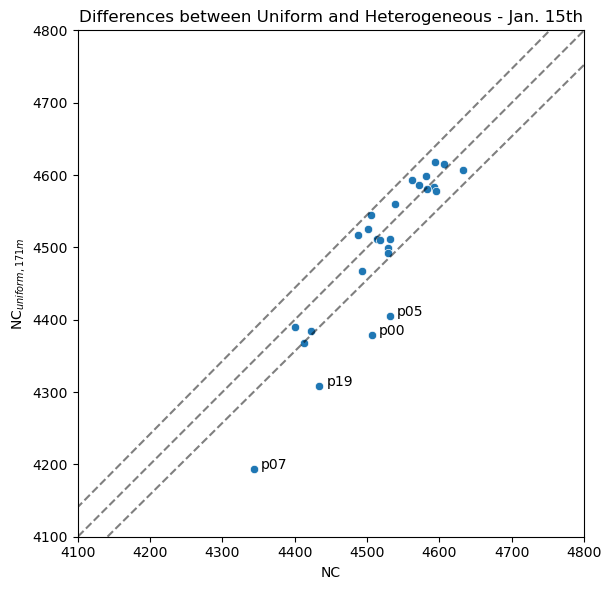

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=test_idea,ax=ax,
                x='NC', y='NCU_f', palette='rocket', legend='brief')

plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)
plt.plot(np.arange(3200,5110,100)*1.01,np.arange(3200,5110,100), 'k--', alpha=0.5)
plt.plot(np.arange(3200,5110,100), np.arange(3200,5110,100)*1.01, 'k--', alpha=0.5)


big_diffs = test_idea[test_idea['diff_f']<-100].reset_index()

for i in range(len(big_diffs)):
    ax.annotate(text=big_diffs.Point.iloc[i],
                xy=(big_diffs.NC.iloc[i], big_diffs.NCU_f.iloc[i]),
                xytext=(big_diffs.NC.iloc[i]+10, big_diffs.NCU_f.iloc[i]))
# sns.move_legend(
#     ax, "center",
#     bbox_to_anchor=(1.2, .5), ncol=2, frameon=False,
# )
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(4100,4800)
plt.ylim(4100,4800)

ax.set_xlabel('NC')
ax.set_ylabel(r'NC$_{uniform,171m}$')
ax.set_title('Differences between Uniform and Heterogeneous - Jan. 15th')
# plt.colorbar()
plt.tight_layout()
# plt.savefig('./figs/to_publish/f4.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

In [100]:
# get filenames of lidar SD files
fnames_old = glob.glob('/Users/hkim139/mntpoint/General/Montana/hkim/LIDAR/lidar_maps/*.txt')
fnames = glob.glob('/Users/hkim139/mntpoint/General/Montana/LIDAR_2021/R_Files/Gapfilled_lidar_for_modeling/*.txt')

fnames_0115 = fnames_old[0]

sd_0115 = np.loadtxt(fnames_0115, delimiter=',')


In [101]:
def plotPoint(ax, p, c, ls, s=''):
    xx = (p[0] + 500)/2
    yy = np.abs(p[1] - 500)/2
    ax.plot(xx, yy, ls)
    # ax.text(xx, yy, s, color='k')

In [102]:
# Plotting potential locations for URANOS Runs
p0_x = -211.280 # Detector Pos X [m]
p0_y = -167.261 # Detector Pos Y [m]

p00 = (p0_x,p0_y)
p01 = (   0,    0)
p02 = (-280,  280)
p03 = (   0,  280)
p04 = ( 280,  280)
p05 = (-280,    0)
p06 = ( 280,    0)
p07 = (-280, -280)
p08 =    (0, -280)
p09 = ( 280, -280)
p10 = (-140,  280)
p11 = ( 140,  280)
p12 = (-280,  140)
p13 = (-140,  140)
p14 = (   0,  140)
p15 = ( 140,  140)
p16 = ( 280,  140)
p17 = (-140,    0)
p18 = ( 140,    0)
p19 = (-280, -140)
p20 = (-140, -140)
p21 = (   0, -140)
p22 = ( 140, -140)
p23 = ( 280, -140)
p24 = (-140, -280)
p25 = ( 140, -280)

In [103]:
(test_idea['NC']-test_idea['NCU_f'])/test_idea['NCU_f']*100

0     2.909082
1    -0.207811
2     0.851533
3    -0.861640
4     1.037218
5     2.855908
6    -0.481641
7     3.580923
8     0.470686
9     0.218110
10    0.049101
11   -0.537377
12    0.594674
13    0.183863
14   -0.518702
15   -0.397983
16   -0.670238
17   -0.670085
18    0.389639
19    2.931418
20   -0.311166
21    0.527139
22    0.066154
23    0.676428
24    0.813203
25    0.190884
dtype: float64

In [104]:
test_idea[test_idea['Point']=='p00'].NC

0    4506.671119
Name: NC, dtype: float64

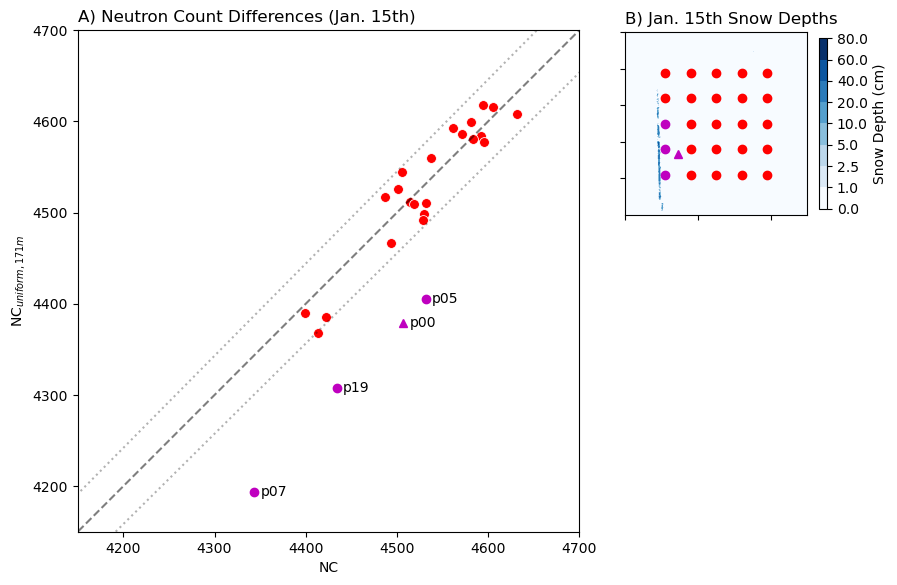

In [109]:
# fig, ax = plt.subplots(figsize=(8,6))
fig = plt.figure(figsize=(10,7.5))
gs = fig.add_gridspec(2,3, width_ratios=[1,1,1],
                       height_ratios=[1,1])

ax = fig.add_subplot(gs[0:2,0:2])
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=test_idea[test_idea['diff_f']>-100], ax=ax,
                x='NC', y='NCU_f', facecolor='r', legend='brief', s=50)
# sns.scatterplot(data=test_idea[test_idea['diff_f']<-100],ax=ax,
#                 x='NC', y='NCU_f', color='m', legend='brief')
ax.plot(test_idea[test_idea['Point']=='p00'].NC,
        test_idea[test_idea['Point']=='p00'].NCU_f, 'm^',
        zorder=3)
ax.plot(test_idea[test_idea['Point']=='p05'].NC,
        test_idea[test_idea['Point']=='p05'].NCU_f, 'mo',
        zorder=3)
ax.plot(test_idea[test_idea['Point']=='p07'].NC,
        test_idea[test_idea['Point']=='p07'].NCU_f, 'mo',
        zorder=3)
ax.plot(test_idea[test_idea['Point']=='p19'].NC,
        test_idea[test_idea['Point']=='p19'].NCU_f, 'mo',
        zorder=3)
plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--',
         alpha=0.5)
plt.plot(np.arange(3200,5110,100)*1.01,np.arange(3200,5110,100), 'k:',
         alpha=0.3)
plt.plot(np.arange(3200,5110,100), np.arange(3200,5110,100)*1.01, 'k:', alpha=0.3)
big_diffs = test_idea[test_idea['diff_f']<-100].reset_index()

for i in range(len(big_diffs)):
    ax.annotate(text=big_diffs.Point.iloc[i],
                xy=(big_diffs.NC.iloc[i], big_diffs.NCU_f.iloc[i]),
                xytext=(big_diffs.NC.iloc[i]+7, big_diffs.NCU_f.iloc[i]), va='center')
# sns.move_legend(
#     ax, "center",
#     bbox_to_anchor=(1.25, .3), ncol=3, frameon=True,
# )
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(4150,4700)
plt.ylim(4150,4700)

ax.set_xlabel('NC')
ax.set_ylabel(r'NC$_{uniform,171m}$')
ax.set_title('A) Neutron Count Differences (Jan. 15th)', loc='left')


bound = np.array([0, 1, 2.5, 5, 10, 20, 40, 60, 80])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)
ax2 = fig.add_subplot(gs[0,2])
img = ax2.imshow(sd_0115*100, cmap='Blues', clim=(0, 80), norm=norm)
plt.colorbar(img, ax=ax2,
                  label='Snow Depth (cm)', shrink=0.65)
plotPoint(ax2, p00, 'm', 'm^','P00')
plotPoint(ax2, p01, 'r', 'ro','P01')
plotPoint(ax2, p02, 'r', 'ro','P02')
plotPoint(ax2, p03, 'r', 'ro', 'P03')
plotPoint(ax2, p04, 'r', 'ro', 'P04')
# plotPointFpt(axs, p04, 'r', 'ro', 'P04', 'runs')
plotPoint(ax2, p05, 'm', 'mo', 'P05')
plotPoint(ax2, p06, 'r', 'ro', 'P06')
plotPoint(ax2, p07, 'm', 'mo', 'P07')
plotPoint(ax2, p08, 'r', 'ro', 'P08')
plotPoint(ax2, p09, 'r', 'ro', 'P09')
plotPoint(ax2, p10, 'r', 'ro', 'P10')
plotPoint(ax2, p11, 'r', 'ro', 'P11')
plotPoint(ax2, p12, 'r', 'ro', 'P12')
plotPoint(ax2, p13, 'r', 'ro', 'P13')
plotPoint(ax2, p14, 'r', 'ro', 'P14')
# # plotPointFpt(axs, p14, 'r', 'ro', 'P14', 'runs')
plotPoint(ax2, p15, 'r', 'ro', 'P15')
plotPoint(ax2, p16, 'r', 'ro', 'P16')
plotPoint(ax2, p17, 'r', 'ro', 'P17')
plotPoint(ax2, p18, 'r', 'ro', 'P18')
plotPoint(ax2, p19, 'm', 'mo', 'P19')
plotPoint(ax2, p20, 'r', 'ro', 'P20')
plotPoint(ax2, p21, 'r', 'ro', 'P21')
plotPoint(ax2, p22, 'r', 'ro', 'P22')
plotPoint(ax2, p23, 'r', 'ro', 'P23')
plotPoint(ax2, p24, 'r', 'ro', 'P24')
plotPoint(ax2, p25, 'r', 'ro', 'P25')

ax2.tick_params(labelbottom=False, labelleft=False)
ax2.set_title('B) Jan. 15th Snow Depths', loc='left')
# plt.colorbar()
# plt.tight_layout()
plt.savefig('./figs/to_publish/f4.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

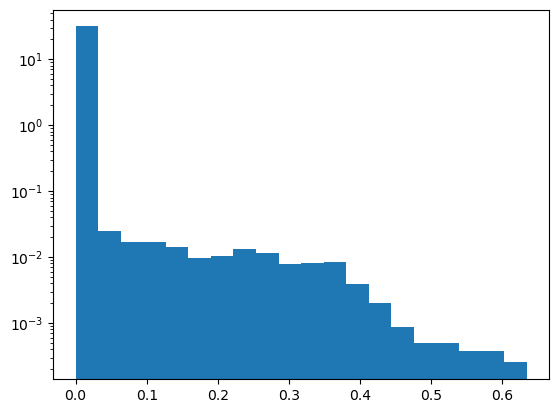

In [153]:
plt.hist(sd_0115.flatten(), bins=20, density=True)
plt.yscale('log')
plt.show()

(4200.0, 4800.0)

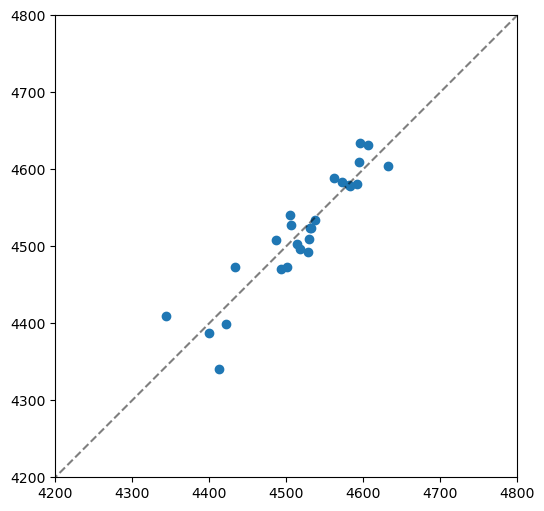

In [160]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
ax.scatter(ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].NC,
            ncdf_control.NC)
ax.plot(np.arange(3200,5310,100),np.arange(3200,5310,100), 'k--', alpha=0.5)
plt.xlim(4200,4800)
plt.ylim(4200,4800)

In [161]:
ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']=='2021-01-15'].NC.reset_index(drop=True) - ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']=='2021-01-15'].NC

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
Name: NC, dtype: float64

In [162]:
ncdf_control.NC

0     4527.370802
1     4631.714465
2     4399.353600
3     4541.137984
4     4340.528971
5     4523.165710
6     4533.757073
7     4408.936031
8     4523.801567
9     4387.509990
10    4502.937690
11    4473.529001
12    4469.883495
13    4580.426222
14    4608.865830
15    4579.761015
16    4507.671595
17    4588.448450
18    4633.518667
19    4472.852190
20    4583.518072
21    4603.762695
22    4578.432601
23    4509.450366
24    4492.761598
25    4496.887905
Name: NC, dtype: float64

In [163]:
ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].NC

0     4506.671119
1     4605.778082
2     4422.403317
3     4505.325680
4     4413.310402
5     4531.435325
6     4537.869410
7     4343.507273
8     4532.217059
9     4399.638347
10    4514.011292
11    4501.153977
12    4493.268284
13    4592.509599
14    4594.393366
15    4580.889766
16    4487.236912
17    4561.830986
18    4595.279386
19    4434.122473
20    4571.812929
21    4631.888279
22    4583.213476
23    4529.209040
24    4528.578601
25    4518.269990
Name: NC, dtype: float64

In [164]:
ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].NC - ncdf_control.NC

0    -20.699682
1    -25.936383
2     23.049717
3    -35.812304
4     72.781431
5      8.269615
6      4.112337
7    -65.428758
8      8.415493
9     12.128357
10    11.073602
11    27.624975
12    23.384789
13    12.083377
14   -14.472464
15     1.128751
16   -20.434683
17   -26.617464
18   -38.239281
19   -38.729717
20   -11.705143
21    28.125584
22     4.780875
23    19.758674
24    35.817003
25    21.382085
Name: NC, dtype: float64

In [165]:
ncdf_no_control[ncdf_no_control['Date']=='2021-01-15'].NC - 

SyntaxError: invalid syntax (2961947725.py, line 1)

In [166]:
ncdf_u_171m_control.NC - ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']=='2021-01-15'].NC

0     131.838248
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5      94.754535
6       0.000000
7     231.009736
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12     25.129569
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19    219.319030
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24     11.522517
25      0.000000
Name: NC, dtype: float64

In [167]:
test_idea.sort_values(by='diff_c')

Date Point           NC        NCU_f        NCU_c      diff_f  \
23 2021-01-15   p23  4529.209040  4498.778050  4406.394661  -30.430990   
4  2021-01-15   p04  4413.310402  4368.004657  4339.731980  -45.305745   
25 2021-01-15   p25  4518.269990  4509.661776  4447.645918   -8.608214   
24 2021-01-15   p24  4528.578601  4492.049135  4479.831521  -36.529466   
10 2021-01-15   p10  4514.011292  4511.795965  4467.674509   -2.215327   
18 2021-01-15   p18  4595.279386  4577.443862  4560.343522  -17.835524   
13 2021-01-15   p13  4592.509599  4584.081172  4557.954089   -8.428428   
20 2021-01-15   p20  4571.812929  4586.083262  4538.409317   14.270333   
2  2021-01-15   p02  4422.403317  4385.063060  4391.405412  -37.340257   
12 2021-01-15   p12  4493.268284  4466.705963  4465.526481  -26.562321   
21 2021-01-15   p21  4631.888279  4607.599838  4608.774885  -24.288441   
14 2021-01-15   p14  4594.393366  4618.348852  4572.547741   23.955485   
3  2021-01-15   p03  4505.325680  4544.482750  4498.565929   39.157070   
9  2021-01-15   p09  4399.638347  4390.063175  4395.980075   -9.575172   
1  2021-01-15   p01  4605.778082  4615.369307  4602.972538    9.591225   
15 2021-01-15   p15  4580.889766  4599.193787  4582.085595   18.304021   
11 2021-01-15   p11  4501.153977  4525.472835  4502.647891   24.318859   
6  2021-01-15   p06  4537.869410  4559.831406  4540.422437   21.961996   
5  2021-01-15   p05  4531.435325  4405.615017  4538.859533 -125.820308   
22 2021-01-15   p22  4583.213476  4580.183505  4594.834425   -3.029971   
17 2021-01-15   p17  4561.830986  4592.605353  4585.461652   30.774367   
0  2021-01-15   p00  4506.671119  4379.274446  4540.153652 -127.396673   
8  2021-01-15   p08  4532.217059  4510.984504  4571.505787  -21.232556   
7  2021-01-15   p07  4343.507273  4193.346756  4389.399137 -150.160517   
16 2021-01-15   p16  4487.236912  4517.515017  4536.396994   30.278105   
19 2021-01-15   p19  4434.122473  4307.841639  4491.849945 -126.280834   

        diff_c      diff_u  
23 -122.814379   92.383389  
4   -73.578422   28.272677  
25  -70.624072   62.015858  
24  -48.747080   12.217614  
10  -46.336783   44.121456  
18  -34.935864   17.100340  
13  -34.555511   26.127083  
20  -33.403612   47.673945  
2   -30.997905   -6.342352  
12  -27.741803    1.179482  
21  -23.113394   -1.175047  
14  -21.845625   45.801111  
3    -6.759751   45.916821  
9    -3.658273   -5.916900  
1    -2.805545   12.396770  
15    1.195829   17.108192  
11    1.493914   22.824945  
6     2.553027   19.408968  
5     7.424208 -133.244516  
22   11.620948  -14.650919  
17   23.630666    7.143701  
0    33.482533 -160.879206  
8    39.288727  -60.521283  
7    45.891864 -196.052380  
16   49.160082  -18.881977  
19   57.727472 -184.008306

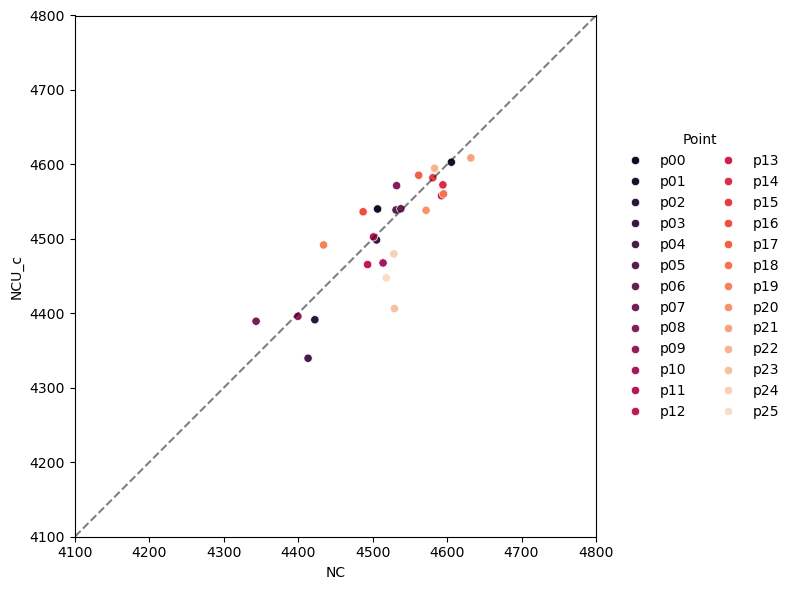

In [168]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=test_idea,ax=ax,
                x='NC', y='NCU_c', hue='Point', palette='rocket', legend='brief')

plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)

sns.move_legend(
    ax, "center",
    bbox_to_anchor=(1.2, .5), ncol=2, frameon=False,
)
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(4100,4800)
plt.ylim(4100,4800)
# plt.colorbar()
plt.tight_layout()
plt.show()

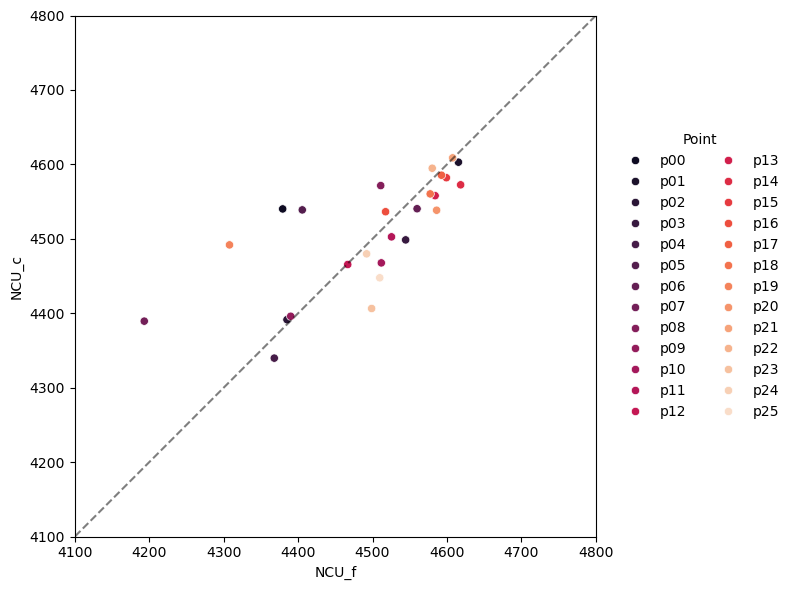

In [169]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=test_idea,ax=ax,
                x='NCU_f', y='NCU_c', hue='Point', palette='rocket', legend='brief')

plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)

sns.move_legend(
    ax, "center",
    bbox_to_anchor=(1.2, .5), ncol=2, frameon=False,
)
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(4100,4800)
plt.ylim(4100,4800)
# plt.colorbar()
plt.tight_layout()
plt.show()

In [170]:
ncdf_no_control['NC_norm'] = ncdf_no_control.groupby(['Date'])['NC'].transform(lambda x: (x-x.mean())/x.std())
ncdf_u_171m_no_control['NCU_f_norm'] = ncdf_u_171m_no_control.groupby(['Date'])['NC'].transform(lambda x: (x-x.mean())/x.std())
ncdf_u_carc_no_control['NCU_c_norm'] = ncdf_u_carc_no_control.groupby(['Date'])['NC'].transform(lambda x: (x-x.mean())/x.std())

In [171]:
# patchy comparisons
patchy_snow = ncdf_no_control.copy()

In [172]:
# Choose patchy locations (in notes)
sel_1 = patchy_snow[(patchy_snow['Date']=='2021-01-21') & (patchy_snow['Point'].isin(['p01', 'p06', 'p08', 'p09', 'p18', 'p21', 'p22', 'p23', 'p25']))].reset_index(drop=True)
sel_2 = patchy_snow[(patchy_snow['Date']=='2021-01-22') & (patchy_snow['Point'].isin(['p01', 'p06', 'p08', 'p18', 'p22', 'p23', 'p25']))].reset_index(drop=True)
sel_3 = patchy_snow[(patchy_snow['Date']=='2021-01-29') & (patchy_snow['Point'].isin(['p01', 'p06', 'p08', 'p09', 'p18', 'p21', 'p22', 'p23', 'p25']))].reset_index(drop=True)
sel_4 = patchy_snow[(patchy_snow['Date']=='2021-02-17') & (patchy_snow['Point'].isin(['p06', 'p18', 'p22', 'p23']))].reset_index(drop=True)
sel_5 = patchy_snow[(patchy_snow['Date']=='2021-02-18') & (patchy_snow['Point'].isin(['p06', 'p18', 'p22', 'p23']))].reset_index(drop=True)
sel_6 = patchy_snow[(patchy_snow['Date']=='2021-02-24') & (patchy_snow['Point'].isin(['p01', 'p06', 'p08', 'p09', 'p18', 'p21', 'p22', 'p23', 'p25']))].reset_index(drop=True)
sel_7 = patchy_snow[(patchy_snow['Date']=='2021-03-04') & (patchy_snow['Point'].isin(['p01', 'p06', 'p08', 'p09', 'p18', 'p21', 'p22', 'p23', 'p25']))].reset_index(drop=True)


In [173]:
patchy_sel = pd.concat([sel_1, sel_2, sel_3, sel_4, sel_5, sel_6, sel_7]).reset_index(drop=True)

In [174]:
patchy_sel = pd.merge(patchy_sel, ncdf_u_171m_no_control, how='left', on=['Date', 'Point'])

In [175]:
patchy_sel = pd.merge(patchy_sel, ncdf_u_carc_no_control, how='left', on=['Date', 'Point'])

In [176]:
patchy_sel.drop(['SWE [cm]_x', 'SWE [cm]_y', 'SWE [cm]'], axis=1, inplace=True)

In [177]:
patchy_sel.head()

Date Point         NC_x   NC_norm         NC_y  NCU_f_norm  \
0 2021-01-21   p01  4357.049739  1.216595  4238.939520    0.357967   
1 2021-01-21   p06  4278.113310  0.230471  4265.280693    0.718782   
2 2021-01-21   p08  4295.520073  0.447928  4329.911280    1.604074   
3 2021-01-21   p09  4207.224666 -0.655114  4193.949612   -0.258292   
4 2021-01-21   p18  4264.235155  0.057097  4221.318044    0.116593   

            NC  NCU_c_norm  
0  4310.819965    1.009666  
1  4250.383291    0.075136  
2  4337.956243    1.429273  
3  4139.683732   -1.636607  
4  4267.697159    0.342859

In [178]:
patchy_sel.columns = ['Date', 'Point', 'NC', 'NC_norm', 'NCU_f', 'NCU_f_norm', 'NCU_c', 'NCU_c_norm']

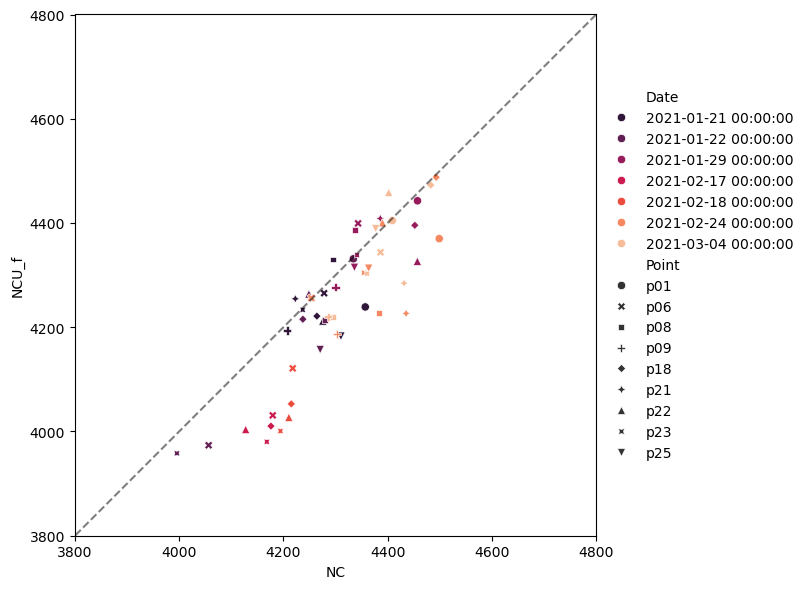

In [179]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=patchy_sel, ax=ax,
                x='NC', y='NCU_f', hue='Date', style='Point',
                palette='rocket', legend='brief')

plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)

sns.move_legend(
    ax, "center",
    bbox_to_anchor=(1.2, .5), ncol=1, frameon=False,
)
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(3800,4800)
plt.ylim(3800,4800)
# plt.colorbar()
plt.tight_layout()
plt.show()

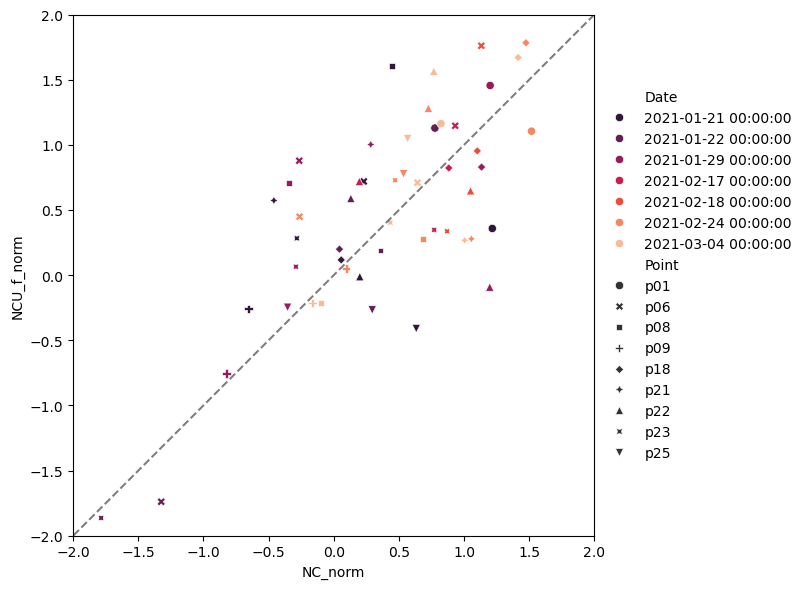

In [180]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal', adjustable='box')
sns.scatterplot(data=patchy_sel, ax=ax,
                x='NC_norm', y='NCU_f_norm', hue='Date', style='Point',
                palette='rocket', legend='brief')

plt.plot(np.arange(-3,3,.5),np.arange(-3,3,.5), 'k--', alpha=0.5)

sns.move_legend(
    ax, "center",
    bbox_to_anchor=(1.2, .5), ncol=1, frameon=False,
)
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(-2,2)
plt.ylim(-2,2)
# plt.colorbar()
plt.tight_layout()
plt.show()

In [181]:
patchy_sel['NC'] - patchy_sel['NCU_f']

0     118.110219
1      12.832618
2     -34.391207
3      13.275054
4      42.917111
5     -31.755045
6      63.725235
7       3.572751
8     127.463537
9       2.905817
10     82.953752
11     64.867872
12     22.014171
13    -14.934735
14     37.558444
15    113.368063
16     14.695865
17    -56.030725
18    -49.136233
19     23.097171
20     56.531607
21    -22.617564
22    130.543919
23      3.020357
24     21.387857
25    148.690051
26    165.762429
27    123.824318
28    188.016412
29     96.746811
30    162.222250
31    183.421418
32    193.547965
33    128.972119
34     -2.485576
35    157.240471
36    116.139111
37      5.318832
38    208.897946
39    -10.644445
40     50.026049
41     50.402732
42      4.143913
43     42.565938
44     74.185536
45     66.001927
46      9.884660
47    146.998118
48    -56.599191
49     57.722993
50    -12.260353
dtype: float64

ValueError: Could not interpret value `NCU` for `y`. An entry with this name does not appear in `data`.

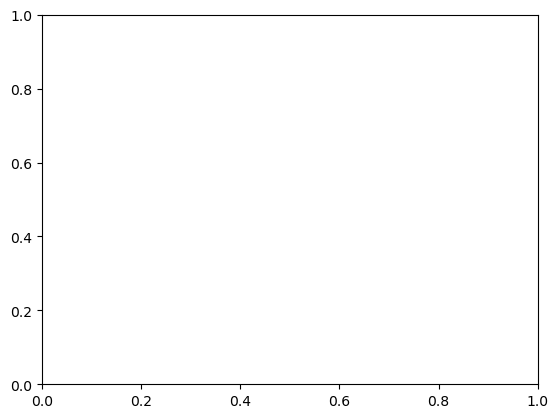

In [182]:
fig, ax = plt.subplots()
sns.scatterplot(data=test_idea,ax=ax,
                x='NC', y='NCU', hue='Point', palette='rocket')

plt.plot(np.arange(3200,5110,100),np.arange(3200,5110,100), 'k--', alpha=0.5)

sns.move_legend(
    ax, "center",
    bbox_to_anchor=(1.25, .5), ncol=2, title='Points', frameon=False,
)
# print(ncdf_no_control['NC'].min())
# print(ncdf_no_control['NC'].max())
# print(ncdf_u_no_control['NC'].min())
# print(ncdf_u_no_control['NC'].max())
plt.xlim(3800,4300)
plt.ylim(3800,4300)
# plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
p00u_171m_0115_hits

In [183]:
360/30

12.0

<Axes: >

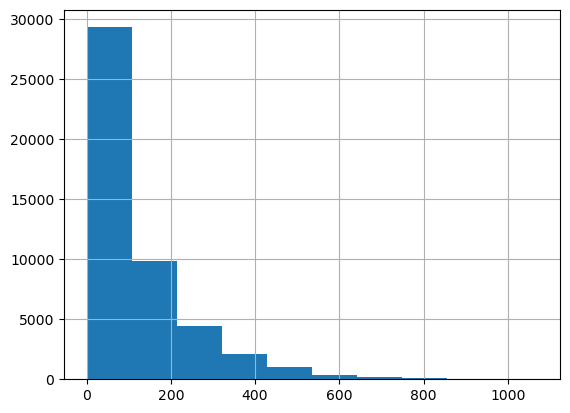

In [184]:
p00u_171m_0115_hits['r'].hist()

<Axes: xlabel='x', ylabel='y'>

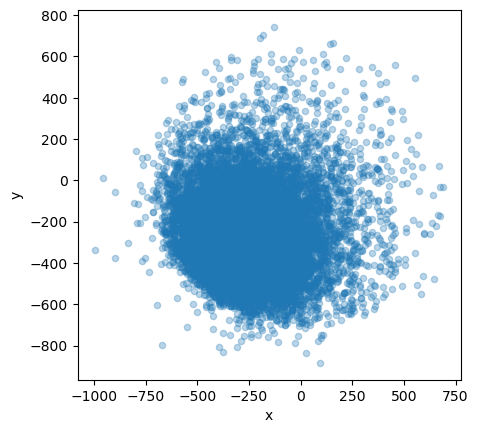

In [401]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
# p00u_171m_0115_hits.plot(x='x', y='y', kind='scatter', alpha=0.3, ax=ax)
p07u_171m_0115_hits.plot(x='x', y='y', kind='scatter', alpha=0.3, ax=ax)

# ax.plot(p00[0], p00[1], 'rs')

In [186]:
p05[0]

-280

In [187]:
# p00u_carc_0122, p00u_carc_0122_hits = readUranosNC(path_to_shared+path_to_wd3,
#                                          '0122/outputs/p00/',
#                                          crns_x, crns_y)
# def recalc_angles(data, crns_x, crns_y):
#     data['rel_x'] = data['x'] - crns_x
#     data['rel_y']= data['y'] - crns_y
    
#     test_r = np.sqrt(data['rel_x'].iloc[0]**2 + data['rel_y'].iloc[0]**2)
    
#     data['w_new'] = np.arctan2( data.rel_y , data.rel_x) + np.pi
#     data['w_deg_new'] = data.w_new /np.pi*180
#     return(data)

In [188]:
# p05_0115_hits = recalc_angles(p05_0115_hits, -280, 0)
# p05u_171m_0115_hits = recalc_angles(p05u_171m_0115_hits, -280, 0)

In [189]:
# p00_0115_hits = recalc_angles(p00_0115_hits, crns_x, crns_y)
# p00u_171m_0115_hits = recalc_angles(p00u_171m_0115_hits, crns_x, crns_y)

In [190]:
# p07_0115_hits = recalc_angles(p07_0115_hits, -280, -280)
# p19_0115_hits = recalc_angles(p19_0115_hits, -280, -140)
# p19u_171m_0115_hits = recalc_angles(p19u_171m_0115_hits, -280, -140)

In [191]:
# p23_0115_hits = recalc_angles(p23_0115_hits, 280, -140)

In [192]:
# p07u_171m_0115_hits = recalc_angles(p07u_171m_0115_hits, -280, -280)

In [193]:
# refactor!!
# turn into function! to make subplot
def countBySector(data, data_uni):
    angles = np.linspace(0,360,13)
    angles
    
    nc_het_theta = []
    nc_uni_theta = []
    for a in angles[:-1]:
        sub_angle1 = data[(data['w_deg_new']>=a) & (data['w_deg_new']<(a+30))].reset_index()
        nc_sector1 = sub_angle1['Prob'].sum()
        nc_het_theta.append(nc_sector1)
    
        sub_angle2 = data_uni[(data_uni['w_deg_new']>=a) & (data_uni['w_deg_new']<(a+30))].reset_index()
        nc_sector2 = sub_angle2['Prob'].sum()
        nc_uni_theta.append(nc_sector2)
    return(nc_het_theta, nc_uni_theta)
    # counts, bin_edges = np.histogram(sub_angle['r'],
    #                                  bins=np.arange(0,300,5),
    #                                  weights=sub_angle['Prob'])
    # hist_df = pd.DataFrame({
    #     'counts':counts,
    #     'bin_edge_left':bin_edges[:-1]
    # })
    # hist_df.to_csv('./hists_radial/hist_p07_0115_deg_{:0>3d}-{:0>3d}.csv'.format(int(a), int(a+30)))
    # plt.plot(bin_edges[:-1], np.cumsum(counts))

In [194]:
p07_nca_h, p07_nca_u = countBySector(p07_0115_hits, p07u_171m_0115_hits)
p00_nca_h, p00_nca_u = countBySector(p00_0115_hits, p00u_171m_0115_hits) 
p05_nca_h, p05_nca_u = countBySector(p05_0115_hits, p05u_171m_0115_hits) 
p19_nca_h, p19_nca_u = countBySector(p19_0115_hits, p19u_171m_0115_hits) 

In [300]:
p07_nca_h_max, p07_nca_u_max = countBySector(p07_0217_hits, p07u_171m_0217_hits)
p00_nca_h_max, p00_nca_u_max = countBySector(p00_0217_hits, p00u_171m_0217_hits) 
p05_nca_h_max, p05_nca_u_max = countBySector(p05_0217_hits, p05u_171m_0217_hits) 
p19_nca_h_max, p19_nca_u_max = countBySector(p19_0217_hits, p19u_171m_0217_hits) 

In [195]:
test_p07_nca_h, test_p07_nca_u = countBySector(p07_0115_hits[p07_0115_hits['r']<=200],
                                               p07u_171m_0115_hits[p07u_171m_0115_hits['r']<=200])
test_p00_nca_h, test_p00_nca_u = countBySector(p00_0115_hits[p00_0115_hits['r']<=200],
                                               p00u_171m_0115_hits[p00u_171m_0115_hits['r']<=200]) 
test_p05_nca_h, test_p05_nca_u = countBySector(p05_0115_hits[p05_0115_hits['r']<=200],
                                               p05u_171m_0115_hits[p05u_171m_0115_hits['r']<=200]) 
test_p19_nca_h, test_p19_nca_u = countBySector(p19_0115_hits[p19_0115_hits['r']<=200],
                                               p19u_171m_0115_hits[p19u_171m_0115_hits['r']<=200]) 

In [402]:
test_p07_nca_hmax, test_p07_nca_umax = countBySector(p07_0217_hits[p07_0217_hits['r']<=200],
                                               p07u_171m_0217_hits[p07u_171m_0217_hits['r']<=200])
test_p00_nca_hmax, test_p00_nca_umax = countBySector(p00_0217_hits[p00_0217_hits['r']<=200],
                                               p00u_171m_0217_hits[p00u_171m_0217_hits['r']<=200]) 
test_p05_nca_hmax, test_p05_nca_umax = countBySector(p05_0217_hits[p05_0217_hits['r']<=200],
                                               p05u_171m_0217_hits[p05u_171m_0217_hits['r']<=200]) 
test_p19_nca_hmax, test_p19_nca_umax = countBySector(p19_0217_hits[p19_0217_hits['r']<=200],
                                               p19u_171m_0217_hits[p19u_171m_0217_hits['r']<=200]) 

In [196]:
# angles

In [197]:
# # # prep nc_hist
# files = np.sort(glob.glob('./hists_radial/hist_p00*.csv'))
# rs = np.arange(0,300,0.01)

# r_footprints = []
# for f in files:
#     nosnow = pd.read_csv(f)
#     nosnow.drop(['Unnamed: 0'], axis=1, inplace=True)
#     # # nosnow.columns
    
#     nosnow['mids'] = nosnow['bin_edge_left']+2.5
    
#     mids = nosnow['mids'].iloc[3:].reset_index(drop=True)
#     counts = nosnow['counts'].iloc[3:].reset_index(drop=True)

#     # fit the bi_exp functions
#     popt, pcov = fit_crns_hist(BiExp, mids, counts,
#                                [16,210,60,100])
#     print(popt)
#     fitted = [BiExp(x, *popt) for x in rs]
#     weights_df = pd.DataFrame({
#         'r':rs,
#         'wts': fitted
#     })
#     weights_df['cum_wts'] = weights_df['wts'].cumsum()
#     weights_df['cum_totfrac'] = weights_df['wts'].cumsum() / np.sum(weights_df['wts'])

#     print(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
#     r_footprints.append(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
#     # biexp_all = scale_weights(popt)
#     # print(biexp_all[biexp_all['cum_totfrac']<=.865]['r'].iloc[-1])

In [260]:
np.array(comps)

array([1.03495318, 1.0043319 , 1.01767639, 1.04488837, 1.0819765 ,
       1.07848363, 1.04597196, 1.02943145, 1.05609776, 0.99118552,
       1.03508574, 1.0048062 ])

In [425]:
p05_nca_h

[351.5670119032625,
 355.06360928883123,
 367.55582879991783,
 380.1789352654916,
 391.6939107903895,
 410.7262533370042,
 398.5904357060822,
 383.070992250667,
 378.09990543038225,
 382.72643297504965,
 372.3354402927685,
 359.8265688429741]

In [426]:
p05_nca_u

[344.89098421482566,
 355.49913877794756,
 371.4106059859841,
 357.8286340569774,
 374.1276172169117,
 391.78574077103553,
 389.8904653173146,
 372.24733155935576,
 374.66141943035393,
 363.72516203948567,
 361.5010225543771,
 348.04689493220496]

In [356]:
[((p05_nca_h_max[i]/p05_nca_u_max[i])-1) for i in range(12)]

[0.0053602938334416095,
 0.050299346335895834,
 0.06147808098362284,
 0.0479574305572561,
 0.046494252835339145,
 0.06972141220455419,
 0.03208529785795622,
 0.1063381324893864,
 0.07471947384823507,
 0.07141525075312694,
 0.07905020139900554,
 0.05968368238054733]

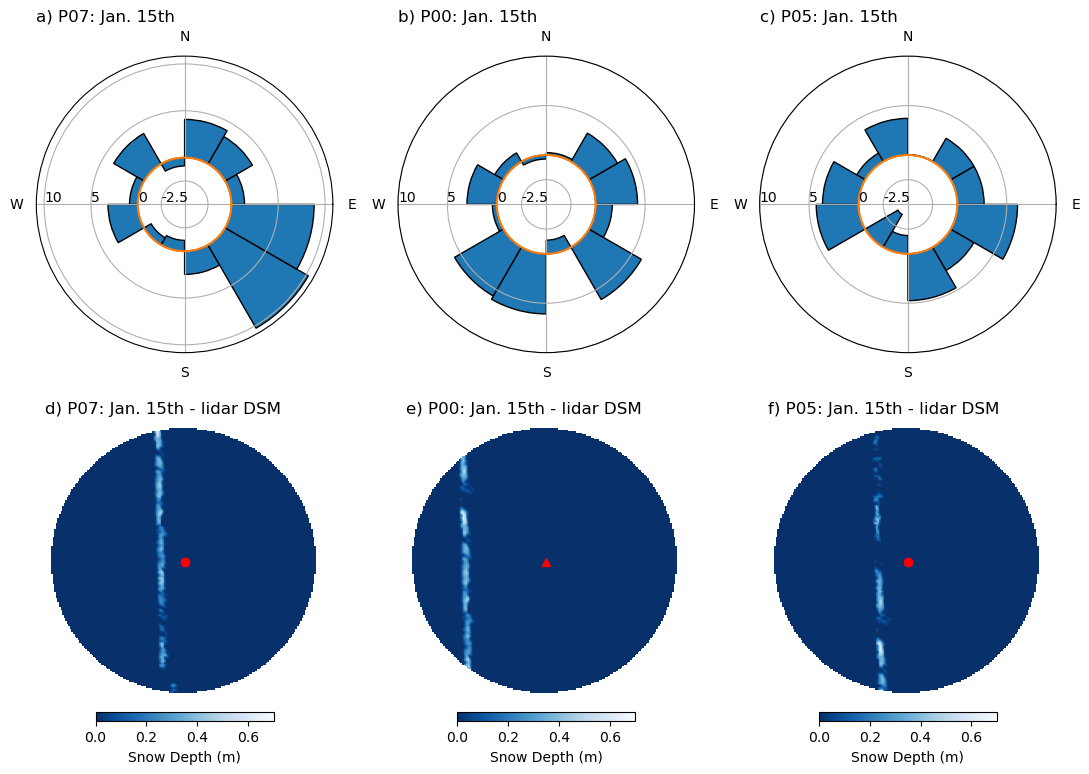

In [565]:
fig = plt.figure(figsize=(11,8))
gs = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(gs[0,0], projection='polar')
ax2 = fig.add_subplot(gs[0,1], projection='polar')
ax3 = fig.add_subplot(gs[0,2], projection='polar')
# ax4 =  fig.add_subplot(gs[3], projection='polar')
# ax = plt.subplot(projection='polar')
ax1.set_theta_zero_location('E')
ax2.set_theta_zero_location('E')
ax3.set_theta_zero_location('E')
# ax4.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
comps = [(test_p07_nca_h[i]/test_p07_nca_u[i])-1 for i in range(12)]

ax1.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax1.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax1.set_rlabel_position(-180)
ax1.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax1.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)


comps = [(test_p00_nca_h[i]/test_p00_nca_u[i])-1 for i in range(12)]

ax2.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax2.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax2.set_rlabel_position(-180)
ax2.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax2.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)


comps = [(test_p05_nca_h[i]/test_p05_nca_u[i])-1 for i in range(12)]
ax3.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax3.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
ax3.set_rlabel_position(-180)
ax3.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax3.yaxis.get_gridlines()
gridlines[2].set_color('tab:orange')
gridlines[2].set_linewidth(1.5)

# comps = [(test_p19_nca_h[i]/test_p19_nca_u[i])-1 for i in range(12)]

# ax4.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
#        width=width, edgecolor='k')
# ax4.set_rticks([-5,-2.5,0,5,10], ['','-2.5','0','5','10'])
# ax4.set_rlabel_position(-180)
# ax4.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
# gridlines = ax4.yaxis.get_gridlines()
# gridlines[2].set_color("c")
# gridlines[2].set_linewidth(2)

# ax1.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax2.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax3.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax4.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])

ax1.set_title('a) P07: Jan. 15th', loc='left')
ax2.set_title('b) P00: Jan. 15th', loc='left')
ax3.set_title('c) P05: Jan. 15th', loc='left')
ax4.set_title('d) P19: Jan. 15th', loc='left')

# ax1.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax2.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax3.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax4.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)


# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)

bound = np.array([0, 5, 10, 20, 40, 60, 80])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

masked_sd= np.ma.masked_where(dists_p07 > 171, sd_0115)

im4 = ax4.imshow(masked_sd, cmap='Blues_r', clim=(0, .7))
ax4.axis('off')
ax4.plot(p07[0], p07[1], 'ro')
ax4.axis([p07[0]-90,p07[0]+90,
          p07[1]+90,p07[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

masked_sd= np.ma.masked_where(dists_p00 > 171, sd_0115)
im5 = ax5.imshow(masked_sd, cmap='Blues_r', clim=(0, .7))
ax5.axis('off')
ax5.axis([50,250,440,240])
ax5.plot(int(m_x), int(m_y), 'r^')
ax5.axis([int(m_x)-90,int(m_x)+90,
          int(m_y)+90,int(m_y)-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0115)
im6 = ax6.imshow(masked_sd, cmap='Blues_r', clim=(0.0, 0.7))
ax6.axis('off')
ax6.plot(p05[0], p05[1], 'ro')
ax6.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax4.set_title('d) P07: Jan. 15th - lidar DSM', loc='left')
ax5.set_title('e) P00: Jan. 15th - lidar DSM', loc='left')
ax6.set_title('f) P05: Jan. 15th - lidar DSM', loc='left')

plt.tight_layout()
# plt.savefig('./figs/to_publish/f5.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

In [415]:
comps = [(test_p07_nca_h[i]/test_p07_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p07 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p07 (r limited):
snow side avg: 1.625977187879398
no snow side avg: 5.072821890782831


In [416]:
comps = [(p07_nca_h[i]/p07_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p07:
snow side avg: 2.9346308121900493
no snow side avg: 5.614161338334818


In [414]:
comps = [(test_p00_nca_h[i]/test_p00_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p00 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p00 (r limited):
snow side avg: 5.28697751779755
no snow side avg: 2.368358706099562


In [413]:
comps = [(p00_nca_h[i]/p00_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p00:
snow side avg: 6.617130637540243
no snow side avg: 2.628573346191417


In [418]:
comps = [(test_p05_nca_h[i]/test_p05_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p05 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p05 (r limited):
snow side avg: 2.3039004460254566
no snow side avg: 3.166285708308758


In [419]:
comps = [(p05_nca_h[i]/p05_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p05:
snow side avg: 4.1269836363376
no snow side avg: 3.638760653376501


In [421]:
comps = [(test_p19_nca_h[i]/test_p19_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p19 (r limited):')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p19 (r limited):
snow side avg: 3.9321700351554245
no snow side avg: 2.0900357608540996


In [422]:
comps = [(p19_nca_h[i]/p19_nca_u[i])-1 for i in range(12)]
comps = np.array(comps)*100
no_snow_side = comps[3:9]
snow_side = comps[0:3]+comps[9:]

print('p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
# print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

p19:
snow side avg: 6.650865218889527
no snow side avg: 2.6434661570625164


In [508]:
# diffs = masked_sd - np.ma.masked_where(dists_p07 > 171, 0.01*np.ones([500,500]))

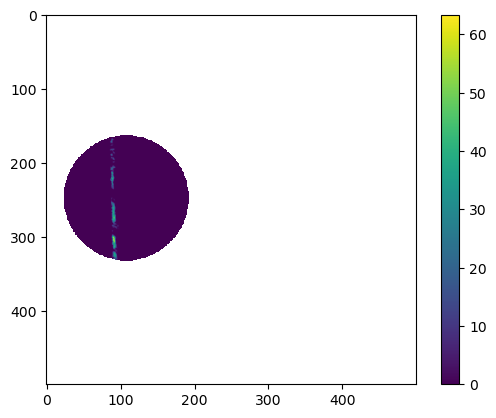

In [540]:
plt.imshow(masked_sd*100)
plt.colorbar()

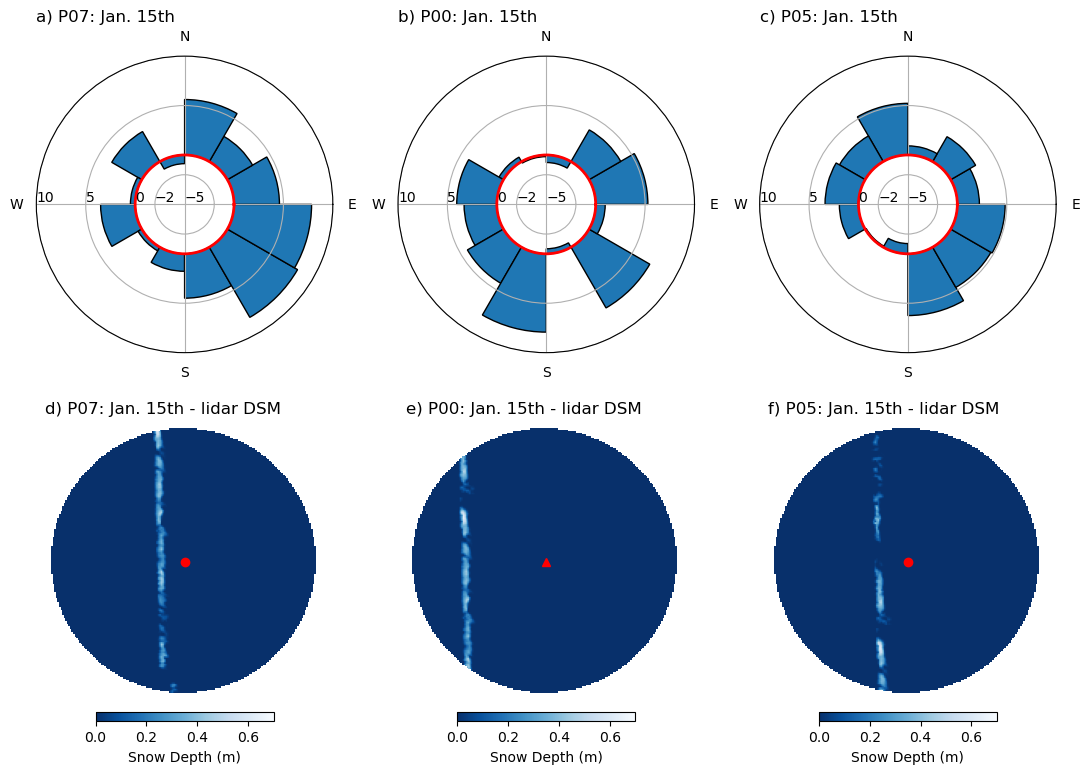

In [553]:
fig = plt.figure(figsize=(11,8))
gs = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(gs[0,0], projection='polar')
ax2 =  fig.add_subplot(gs[0,1], projection='polar')
ax3 =  fig.add_subplot(gs[0,2], projection='polar')
# ax4 =  fig.add_subplot(gs[3], projection='polar')
# ax = plt.subplot(projection='polar')
ax1.set_theta_zero_location('E')
ax2.set_theta_zero_location('E')
ax3.set_theta_zero_location('E')
# ax4.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
comps = [(p07_nca_h[i]/p07_nca_u[i])-1 for i in range(12)]

ax1.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax1.set_rticks([-5,-2,0,5,10])
ax1.set_rlabel_position(-180)
ax1.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax1.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)


comps = [(p00_nca_h[i]/p00_nca_u[i])-1 for i in range(12)]

ax2.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax2.set_rticks([-5,-2,0,5,10])
ax2.set_rlabel_position(-180)
ax2.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax2.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)


comps = [(p05_nca_h[i]/p05_nca_u[i])-1 for i in range(12)]
ax3.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax3.set_rticks([-5,-2,0,5,10])
ax3.set_rlabel_position(-180)
ax3.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax3.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)

# comps = [(p19_nca_h[i]/p19_nca_u[i])-1 for i in range(12)]

# ax4.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
#        width=width, edgecolor='k')
# ax4.set_rticks([-5,-2,0,5,10])
# ax4.set_rlabel_position(-180)
# ax4.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
# gridlines = ax4.yaxis.get_gridlines()
# gridlines[2].set_color("r")
# gridlines[2].set_linewidth(2)

# ax1.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax2.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax3.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax4.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])

ax1.set_title('a) P07: Jan. 15th', loc='left')
ax2.set_title('b) P00: Jan. 15th', loc='left')
ax3.set_title('c) P05: Jan. 15th', loc='left')
# ax4.set_title('d) P19: Jan. 15th', loc='left')

# ax1.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax2.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax3.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax4.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])


bound = np.array([0, 5, 10, 20, 40, 60, 80])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

masked_sd= np.ma.masked_where(dists_p07 > 171, sd_0115)

im4 = ax4.imshow(masked_sd, cmap='Blues_r', clim=(0, .7))
ax4.axis('off')
ax4.plot(p07[0], p07[1], 'ro')
ax4.axis([p07[0]-90,p07[0]+90,
          p07[1]+90,p07[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

masked_sd= np.ma.masked_where(dists_p00 > 171, sd_0115)
im5 = ax5.imshow(masked_sd, cmap='Blues_r', clim=(0, .7))
ax5.axis('off')
ax5.axis([50,250,440,240])
ax5.plot(int(m_x), int(m_y), 'r^')
ax5.axis([int(m_x)-90,int(m_x)+90,
          int(m_y)+90,int(m_y)-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0115)
im6 = ax6.imshow(masked_sd, cmap='Blues_r', clim=(0.0, 0.7))
ax6.axis('off')
ax6.plot(p05[0], p05[1], 'ro')
ax6.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax4.set_title('d) P07: Jan. 15th - lidar DSM', loc='left')
ax5.set_title('e) P00: Jan. 15th - lidar DSM', loc='left')
ax6.set_title('f) P05: Jan. 15th - lidar DSM', loc='left')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.tight_layout()
# plt.savefig('./figs/to_publish/f5.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

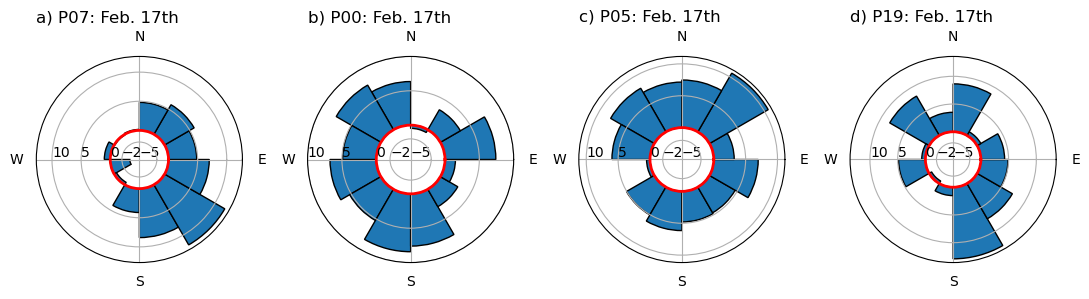

In [367]:
fig = plt.figure(figsize=(11,25))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0], projection='polar')
ax2 =  fig.add_subplot(gs[1], projection='polar')
ax3 =  fig.add_subplot(gs[2], projection='polar')
ax4 =  fig.add_subplot(gs[3], projection='polar')
# ax = plt.subplot(projection='polar')
ax1.set_theta_zero_location('E')
ax2.set_theta_zero_location('E')
ax3.set_theta_zero_location('E')
ax4.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
comps = [(p07_nca_h_max[i]/p07_nca_u_max[i])-1 for i in range(12)]

ax1.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax1.set_rticks([-5,-2,0,5,10])
ax1.set_rlabel_position(-180)
ax1.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax1.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)


comps = [(p00_nca_h_max[i]/p00_nca_u_max[i])-1 for i in range(12)]

ax2.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax2.set_rticks([-5,-2,0,5,10])
ax2.set_rlabel_position(-180)
ax2.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax2.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)


comps = [(p05_nca_h_max[i]/p05_nca_u_max[i])-1 for i in range(12)]
ax3.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax3.set_rticks([-5,-2,0,5,10])
ax3.set_rlabel_position(-180)
ax3.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax3.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)

comps = [(p19_nca_h_max[i]/p19_nca_u_max[i])-1 for i in range(12)]

ax4.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax4.set_rticks([-5,-2,0,5,10])
ax4.set_rlabel_position(-180)
ax4.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax4.yaxis.get_gridlines()
gridlines[2].set_color("r")
gridlines[2].set_linewidth(2)

# ax1.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax2.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax3.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax4.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])

ax1.set_title('a) P07: Feb. 17th', loc='left')
ax2.set_title('b) P00: Feb. 17th', loc='left')
ax3.set_title('c) P05: Feb. 17th', loc='left')
ax4.set_title('d) P19: Feb. 17th', loc='left')

# ax1.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax2.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax3.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax4.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)


# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.tight_layout()
# plt.savefig('./figs/to_publish/f5.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

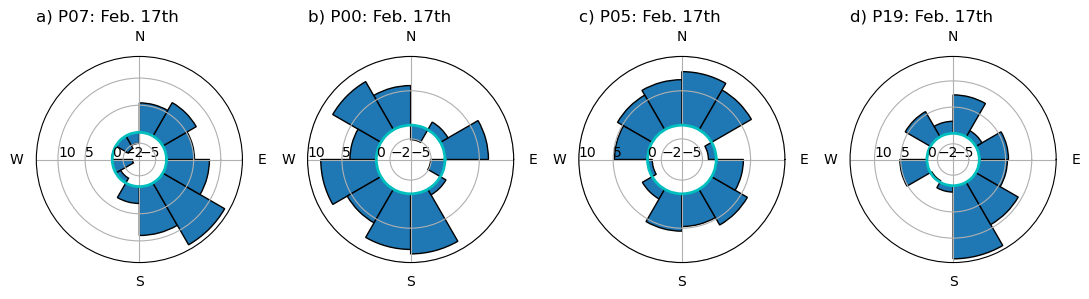

In [404]:
fig = plt.figure(figsize=(11,25))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0], projection='polar')
ax2 =  fig.add_subplot(gs[1], projection='polar')
ax3 =  fig.add_subplot(gs[2], projection='polar')
ax4 =  fig.add_subplot(gs[3], projection='polar')
# ax = plt.subplot(projection='polar')
ax1.set_theta_zero_location('E')
ax2.set_theta_zero_location('E')
ax3.set_theta_zero_location('E')
ax4.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
comps = [(test_p07_nca_hmax[i]/test_p07_nca_umax[i])-1 for i in range(12)]

ax1.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax1.set_rticks([-5,-2,0,5,10])
ax1.set_rlabel_position(-180)
ax1.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax1.yaxis.get_gridlines()
gridlines[2].set_color('c')
gridlines[2].set_linewidth(2)


comps = [(test_p00_nca_hmax[i]/test_p00_nca_umax[i])-1 for i in range(12)]

ax2.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax2.set_rticks([-5,-2,0,5,10])
ax2.set_rlabel_position(-180)
ax2.set_thetagrids(range(0,360,90), ['E', 'N', 'W', 'S'])
gridlines = ax2.yaxis.get_gridlines()
gridlines[2].set_color('c')
gridlines[2].set_linewidth(2)


comps = [(test_p05_nca_hmax[i]/test_p05_nca_umax[i])-1 for i in range(12)]
ax3.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax3.set_rticks([-5,-2,0,5,10])
ax3.set_rlabel_position(-180)
ax3.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax3.yaxis.get_gridlines()
gridlines[2].set_color('c')
gridlines[2].set_linewidth(2)

comps = [(test_p19_nca_hmax[i]/test_p19_nca_umax[i])-1 for i in range(12)]

ax4.bar(thetas[:-1]+0.2617993877991494, np.array(comps)*100,
       width=width, edgecolor='k')
ax4.set_rticks([-5,-2,0,5,10])
ax4.set_rlabel_position(-180)
ax4.set_thetagrids(range(0,360,90),  ['E', 'N', 'W', 'S'])
gridlines = ax4.yaxis.get_gridlines()
gridlines[2].set_color('c')
gridlines[2].set_linewidth(2)

# ax1.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax2.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax3.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# ax4.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])

ax1.set_title('a) P07: Feb. 17th', loc='left')
ax2.set_title('b) P00: Feb. 17th', loc='left')
ax3.set_title('c) P05: Feb. 17th', loc='left')
ax4.set_title('d) P19: Feb. 17th', loc='left')

# ax1.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax2.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax3.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
# ax4.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)


# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.tight_layout()
# plt.savefig('./figs/to_publish/f5.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

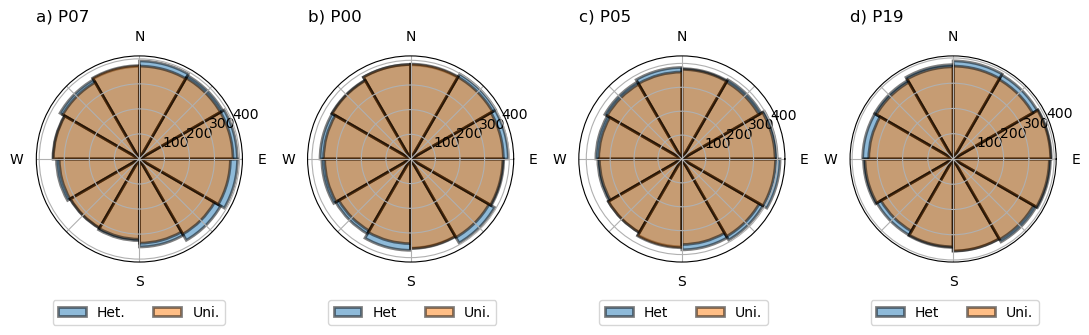

In [198]:
fig = plt.figure(figsize=(11,25))
gs = fig.add_gridspec(1,4)

ax1 = fig.add_subplot(gs[0], projection='polar')
ax2 =  fig.add_subplot(gs[1], projection='polar')
ax3 =  fig.add_subplot(gs[2], projection='polar')
ax4 =  fig.add_subplot(gs[3], projection='polar')
# ax = plt.subplot(projection='polar')
ax1.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax1.bar(thetas[:-1]+0.2617993877991494, p07_nca_h, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het.')
ax1.bar(thetas[:-1]+0.2617993877991494, p07_nca_u, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='Uni.')


ax2.bar(thetas[:-1]+0.2617993877991494, p00_nca_h, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax2.bar(thetas[:-1]+0.2617993877991494, p00_nca_u, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='Uni.')

ax3.bar(thetas[:-1]+0.2617993877991494, p05_nca_h, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax3.bar(thetas[:-1]+0.2617993877991494, p05_nca_u, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='Uni.')

ax4.bar(thetas[:-1]+0.2617993877991494, p19_nca_h, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax4.bar(thetas[:-1]+0.2617993877991494, p19_nca_u, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='Uni.')

ax1.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax2.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax3.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax4.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])

ax1.set_title('a) P07', loc='left')
ax2.set_title('b) P00', loc='left')
ax3.set_title('c) P05', loc='left')
ax4.set_title('d) P19', loc='left')

ax1.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
ax2.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
ax3.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)
ax4.legend(bbox_to_anchor=(0.95,-0.15), ncol=2)


# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.tight_layout()
# plt.savefig('./figs/to_publish/f5.png', bbox_inches='tight', facecolor='w', dpi=300)
plt.show()

In [376]:
no_snow_side = p07_nca_u[3:9]
snow_side = p07_nca_u[0:3]+p07_nca_u[9:]

print('Uniform p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Uniform p07:
snow side avg: 338.0818335345928
no snow side avg: 360.8092925438562
percent diff: -6.3


In [377]:
no_snow_side = p07_nca_h[3:9]
snow_side = p07_nca_h[0:3]+p07_nca_h[9:]

print('Het. p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p07:
snow side avg: 342.9141333320086
no snow side avg: 380.9809075627729
percent diff: -10.0


In [378]:
no_snow_side = p00_nca_u[3:9]
snow_side = p00_nca_u[0:3]+p00_nca_u[9:]

print('Uniform p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Uniform p00:
snow side avg: 355.1316375877897
no snow side avg: 374.74743681078843
percent diff: -5.2


In [379]:
no_snow_side = p00_nca_h[3:9]
snow_side = p00_nca_h[0:3]+p00_nca_h[9:]

print('Het. p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p00:
snow side avg: 366.5399570775519
no snow side avg: 384.5718960957253
percent diff: -4.7


In [380]:
no_snow_side = p05_nca_u[3:9]
snow_side = p05_nca_u[0:3]+p05_nca_u[9:]

print('Uniform p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Uniform p05:
snow side avg: 357.51230141747084
no snow side avg: 376.7568680586581
percent diff: -5.1


In [381]:
no_snow_side = p05_nca_h[3:9]
snow_side = p05_nca_h[0:3]+p05_nca_h[9:]

print('Het. p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p05:
snow side avg: 364.8458153504673
no snow side avg: 390.39340546333614
percent diff: -6.5


In [382]:
no_snow_side = p19_nca_u[3:9]
snow_side = p19_nca_u[0:3]+p19_nca_u[9:]

print('Uniform p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Uniform p19:
snow side avg: 346.05546082929635
no snow side avg: 371.9181456707029
percent diff: -7.0


In [383]:
no_snow_side = p19_nca_h[3:9]
snow_side = p19_nca_h[0:3]+p19_nca_h[9:]

print('Het. p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p19:
snow side avg: 357.37082885309934
no snow side avg: 381.64958336533556
percent diff: -6.4


---

In [384]:
no_snow_side = test_p07_nca_h[3:9]
snow_side = test_p07_nca_h[0:3]+test_p07_nca_h[9:]

print('Het. p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p07:
snow side avg: 279.48945160535544
no snow side avg: 290.9290127984661
percent diff: -3.9


In [385]:
no_snow_side = test_p07_nca_u[3:9]
snow_side = test_p07_nca_u[0:3]+test_p07_nca_u[9:]

print('Het. p07:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p07:
snow side avg: 277.2753188532155
no snow side avg: 277.03189132227607
percent diff: 0.1


In [392]:
no_snow_side = test_p00_nca_h[3:9]
snow_side = test_p00_nca_h[0:3]+test_p00_nca_h[9:]

print('Het. p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p00:
snow side avg: 289.42220322471303
no snow side avg: 294.29810328015554
percent diff: -1.7


In [387]:
no_snow_side = test_p00_nca_u[3:9]
snow_side = test_p00_nca_u[0:3]+test_p00_nca_u[9:]

print('Het. p00:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p00:
snow side avg: 282.13052638277674
no snow side avg: 287.5234841533475
percent diff: -1.9


In [391]:
no_snow_side = test_p05_nca_h[3:9]
snow_side = test_p05_nca_h[0:3]+test_p05_nca_h[9:]

print('Het. p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p05:
snow side avg: 291.36479479611364
no snow side avg: 294.85428027190085
percent diff: -1.2


In [388]:
no_snow_side = test_p05_nca_u[3:9]
snow_side = test_p05_nca_u[0:3]+test_p05_nca_u[9:]

print('Het. p05:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p05:
snow side avg: 288.1401915583048
no snow side avg: 285.81901858159404
percent diff: 0.8


In [390]:
no_snow_side = test_p19_nca_h[3:9]
snow_side = test_p19_nca_h[0:3]+test_p19_nca_h[9:]

print('Het. p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p19:
snow side avg: 285.3716614873703
no snow side avg: 290.35594722683487
percent diff: -1.7


In [389]:
no_snow_side = test_p19_nca_u[3:9]
snow_side = test_p19_nca_u[0:3]+test_p19_nca_u[9:]

print('Het. p19:')
print('snow side avg: {}'.format(np.mean(snow_side)))
print('no snow side avg: {}'.format(np.mean(no_snow_side)))
print('percent diff: {:.1f}'.format(100*(np.mean(snow_side)-np.mean(no_snow_side))/np.mean(no_snow_side)))

Het. p19:
snow side avg: 279.96164847502166
no snow side avg: 284.501362166951
percent diff: -1.6


In [215]:
nc_het_theta[3:9]

NameError: name 'nc_het_theta' is not defined

In [216]:
nc_het_theta[0:3]+nc_het_theta[9:]

NameError: name 'nc_het_theta' is not defined

NameError: name 'nc_uni_theta' is not defined

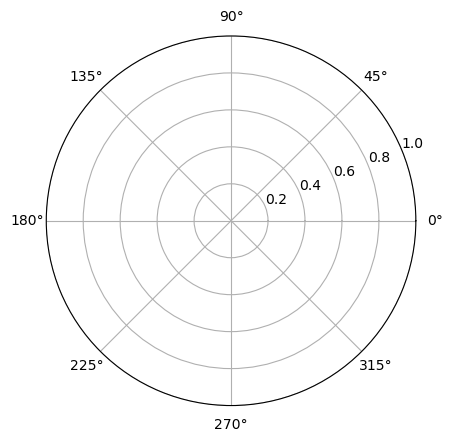

In [217]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[11]+0.2617993877991494, nc_uni_theta[11], width=width,
       alpha=0.5, edgecolor='k', linewidth=2)
ax.set_title('Neutron Counts around P07u - Jan 15th')
ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

In [218]:
angles = np.linspace(0,360,13)
angles

nc_het_theta = []
nc_uni_theta = []
for a in angles[:-1]:
    sub_angle1 = p00_0115_hits[(p00_0115_hits['w_deg_new']>=a) & (p00_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector1 = sub_angle1['Prob'].sum()
    nc_het_theta.append(nc_sector1)

    sub_angle2 = p00u_171m_0115_hits[(p00u_171m_0115_hits['w_deg_new']>=a) & (p00u_171m_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector2 = sub_angle2['Prob'].sum()
    nc_uni_theta.append(nc_sector2)
    # counts, bin_edges = np.histogram(sub_angle['r'],
    #                                  bins=np.arange(0,300,5),
    #                                  weights=sub_angle['Prob'])
    # hist_df = pd.DataFrame({
    #     'counts':counts,
    #     'bin_edge_left':bin_edges[:-1]
    # })
    # hist_df.to_csv('./hists_radial/hist_p00_0115_deg_{:0>3d}-{:0>3d}.csv'.format(int(a), int(a+30)))
    # plt.plot(bin_edges[:-1], np.cumsum(counts))

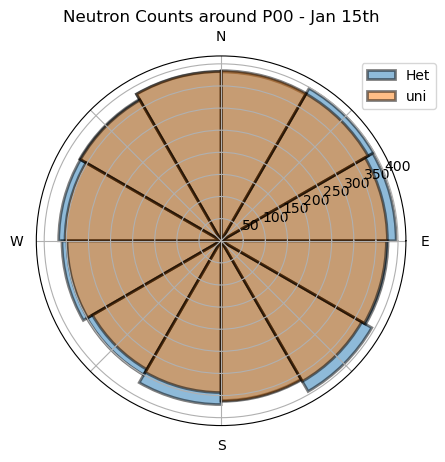

In [219]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_het_theta, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='uni')
ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax.legend(bbox_to_anchor=(1.1,1))
ax.set_title('Neutron Counts around P00 - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

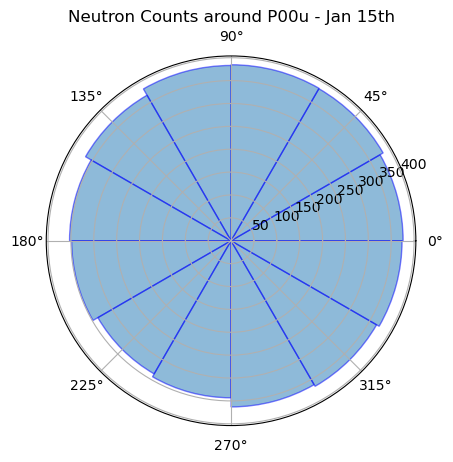

In [220]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width, alpha=0.5, edgecolor='b')
ax.set_title('Neutron Counts around P00u - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

In [221]:
angles = np.linspace(0,360,13)
angles

nc_het_theta = []
nc_uni_theta = []
for a in angles[:-1]:
    sub_angle1 = p05_0115_hits[(p05_0115_hits['w_deg_new']>=a) & (p05_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector1 = sub_angle1['Prob'].sum()
    nc_het_theta.append(nc_sector1)

    sub_angle2 = p05u_171m_0115_hits[(p05u_171m_0115_hits['w_deg_new']>=a) & (p05u_171m_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector2 = sub_angle2['Prob'].sum()
    nc_uni_theta.append(nc_sector2)
    # counts, bin_edges = np.histogram(sub_angle['r'],
    #                                  bins=np.arange(0,300,5),
    #                                  weights=sub_angle['Prob'])
    # hist_df = pd.DataFrame({
    #     'counts':counts,
    #     'bin_edge_left':bin_edges[:-1]
    # })
    # hist_df.to_csv('./hists_radial/hist_p05_0115_deg_{:0>3d}-{:0>3d}.csv'.format(int(a), int(a+30)))
    # plt.plot(bin_edges[:-1], np.cumsum(counts))

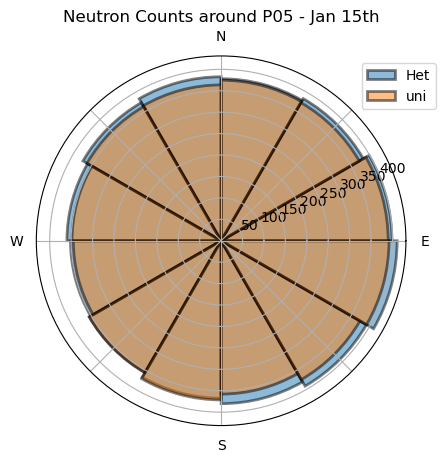

In [222]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_het_theta, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='uni')
ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax.legend(bbox_to_anchor=(1.1,1))
ax.set_title('Neutron Counts around P05 - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

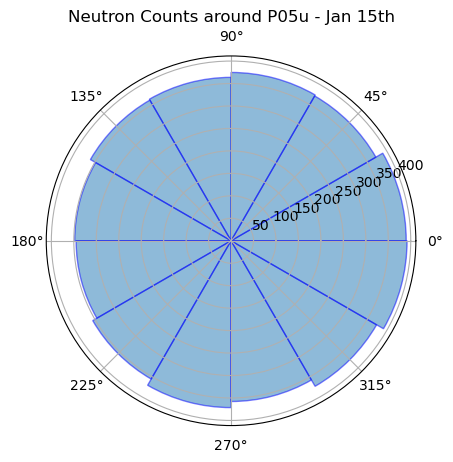

In [223]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width, alpha=0.5, edgecolor='b')
ax.set_title('Neutron Counts around P05u - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

In [224]:
angles = np.linspace(0,360,13)
angles

nc_het_theta = []
nc_uni_theta = []
for a in angles[:-1]:
    sub_angle1 = p19_0115_hits[(p19_0115_hits['w_deg_new']>=a) & (p19_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector1 = sub_angle1['Prob'].sum()
    nc_het_theta.append(nc_sector1)

    sub_angle2 = p19u_171m_0115_hits[(p19u_171m_0115_hits['w_deg_new']>=a) & (p19u_171m_0115_hits['w_deg_new']<(a+30))].reset_index()
    nc_sector2 = sub_angle2['Prob'].sum()
    nc_uni_theta.append(nc_sector2)
    # counts, bin_edges = np.histogram(sub_angle['r'],
    #                                  bins=np.arange(0,300,5),
    #                                  weights=sub_angle['Prob'])
    # hist_df = pd.DataFrame({
    #     'counts':counts,
    #     'bin_edge_left':bin_edges[:-1]
    # })
    # hist_df.to_csv('./hists_radial/hist_p19_0115_deg_{:0>3d}-{:0>3d}.csv'.format(int(a), int(a+30)))
    # plt.plot(bin_edges[:-1], np.cumsum(counts))

In [225]:
p19_0115_hits

Detector_ID  Neutron_Number  Number_of_Scatterings  previous_x_[m]  \
0                0             679                      7       -285.5230   
1                0             685                     16       -291.5690   
3                0            3191                     18       -265.1540   
5                0            6336                     20       -275.0210   
6                0            8323                      3       -280.0680   
...            ...             ...                    ...             ...   
65480            0        99988266                      2       -269.4010   
65482            0        99990710                      2       -251.7690   
65483            0        99995659                      0        -84.2129   
65484            0        99995785                      1       -295.0980   
65485            0        99999674                      1       -286.6850   

       previous_y_[m]  previous_Depth_[m]  Nadir_Angle  Azimuth_Angle  \
0            -163.053            0.013560      1.97161        1.62993   
1            -131.517            0.001755      2.24952        5.88343   
3            -184.453           -9.643370      1.48357        1.88450   
5            -146.928            0.002593      2.31878        5.65057   
6            -104.339            0.015165      1.84547        4.70888   
...               ...                 ...          ...            ...   
65480        -158.865          -11.162900      0.91478        2.46891   
65482        -210.796           -8.041530      1.36674        1.94179   
65483        -293.871         -448.492000      1.27466        2.49954   
65484        -269.975          -33.070300      1.27696        1.43614   
65485        -128.300            0.332271      2.70790        4.93609   

       Energy_[MeV]  Energy_at_Interface_[MeV]  ...        we     we_deg  \
0          0.012043                    1.69342  ...  0.518281  29.700944   
1          0.000001                    3.09840  ...  0.423148  24.249157   
3          0.126538                    3.09831  ...  0.607204  34.796812   
5          0.007083                    4.19829  ...  0.490072  28.084384   
6          1.796460                    1.82026  ...  0.356027  20.402710   
...             ...                        ...  ...       ...        ...   
65480      5.607140                    6.11316  ...  0.532217  30.499528   
65482      1.508590                    2.01478  ...  0.696458  39.911648   
65483      3.871950                    3.87195  ...  1.291118  73.989596   
65484      1.982140                    2.01111  ...  0.740375  42.428368   
65485      4.992280                    5.37600  ...  0.420205  24.080511   

       thermal         E    Weight      Prob     rel_x     rel_y     w_new  \
0        False  0.012043  0.000032  0.139955 -197.0800  -52.4800  0.260249   
1        False  0.000001  0.000042  0.184616  -11.3270    8.6060  5.633456   
3        False  0.126538  0.000027  0.121351 -184.1390    4.9410  6.256359   
5        False  0.007083  0.000032  0.142436  -95.2030  125.2443  5.362347   
6        False  1.796460  0.000013  0.056895   -0.0680   35.6230  4.714298   
...        ...       ...       ...       ...       ...       ...       ...   
65480    False  5.607140  0.000006  0.024870    3.0740  -40.0020  1.647492   
65482    False  1.508590  0.000014  0.062817   22.9460  -57.2100  1.952237   
65483    False  3.871950  0.000007  0.033172  195.7871 -153.8710  2.475503   
65484    False  1.982140  0.000012  0.053578  -19.8560 -165.0970  1.451103   
65485    False  4.992280  0.000006  0.027184   -7.1700   11.5160  5.269269   

        w_deg_new  
0       14.911149  
1      322.773247  
3      358.462952  
5      307.239860  
6      270.109371  
...           ...  
65480   94.394324  
65482  111.854918  
65483  141.835848  
65484   83.142051  
65485  301.906889  

[47852 rows x 45 columns]

In [226]:
p19u_171m_0115_hits

Detector_ID  Neutron_Number  Number_of_Scatterings  previous_x_[m]  \
1                0            2636                      1        -284.046   
2                0            2757                     12        -433.367   
4                0            7197                      0        -318.723   
5                0            9104                     30        -309.234   
6                0           13199                     23        -268.765   
...            ...             ...                    ...             ...   
64155            0        99994882                     20        -278.686   
64156            0        99996497                      6        -280.307   
64157            0        99996853                      0        -298.626   
64158            0        99997301                     25        -272.756   
64159            0        99997533                      0        -278.944   

       previous_y_[m]  previous_Depth_[m]  Nadir_Angle  Azimuth_Angle  \
1           -137.0060          -22.474600     0.821929       6.184970   
2           -203.8920         -139.571000     0.846452       0.411922   
4            -82.4437         -102.339000     0.886617       5.350820   
5           -158.0500          -18.362600     1.397710       0.616186   
6           -151.2540          -15.788900     0.950198       2.825950   
...               ...                 ...          ...            ...   
64155       -133.5870          -41.576500     0.094370       4.616890   
64156       -114.8000           -3.616940     1.259710       4.617670   
64157       -190.1260          -43.237500     1.010650       1.049010   
64158       -150.8400            0.039158     2.533280       1.982360   
64159       -116.9680            1.099980     0.404425       5.011040   

       Energy_[MeV]  Energy_at_Interface_[MeV]  ...        we     we_deg  \
1          1.092440                   1.217940  ...  0.448825  25.720646   
2          0.309956                   3.381350  ...  0.439164  25.166999   
4         49.950900                  49.950900  ...  0.252528  14.471525   
5          0.000018                   2.030690  ...  0.471897  27.042794   
6          0.000659                   0.023135  ...  0.512005  29.341264   
...             ...                        ...  ...       ...        ...   
64155      0.000199                   2.096950  ...  0.446396  25.581409   
64156      0.023609                   2.407040  ...  0.388120  22.241839   
64157      1.498650                   1.498650  ...  0.566354  32.455821   
64158      0.008723                   6.441540  ...  0.504568  28.915046   
64159      1.671940                   1.671940  ...  0.396461  22.719818   

       thermal          E    Weight      Prob    rel_x     rel_y     w_new  \
1        False   1.092440  0.000017  0.073728   21.545  -20.0490  2.392146   
2        False   0.309956  0.000025  0.107268 -259.710  -73.6860  0.276459   
4        False  49.950900  0.000001  0.006053  -38.723   57.5563  5.304615   
5        False   0.000018  0.000044  0.190204 -100.890 -106.1160  0.810638   
6        False   0.000659  0.000038  0.163446   15.555  -76.2060  1.772148   
...        ...        ...       ...       ...      ...       ...       ...   
64155    False   0.000199  0.000040  0.174250  -21.587  -41.3810  1.089968   
64156    False   0.023609  0.000031  0.135446   70.968 -104.4250  2.167704   
64157    False   1.498650  0.000015  0.063041  -18.626  -50.1260  1.215024   
64158    False   0.008723  0.000033  0.141376    7.427  -10.6780  2.178524   
64159    False   1.671940  0.000014  0.059328    1.056   23.0320  4.666572   

        w_deg_new  
1      137.059854  
2       15.839920  
4      303.932064  
5       46.446162  
6      101.536609  
...           ...  
64155   62.450548  
64156  124.200317  
64157   69.615759  
64158  124.820244  
64159  267.374870  

[46582 rows x 45 columns]

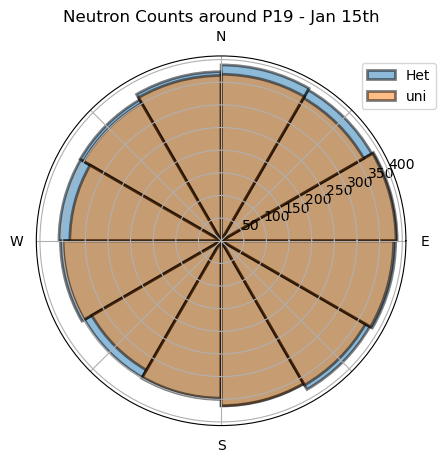

In [227]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_het_theta, width=width,
       alpha=0.5,
       linewidth=2,
       edgecolor='k', label='Het')
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width,
       alpha=0.5, edgecolor='k', linewidth=2, label='uni')
ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax.legend(bbox_to_anchor=(1.1,1))
ax.set_title('Neutron Counts around P19 - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

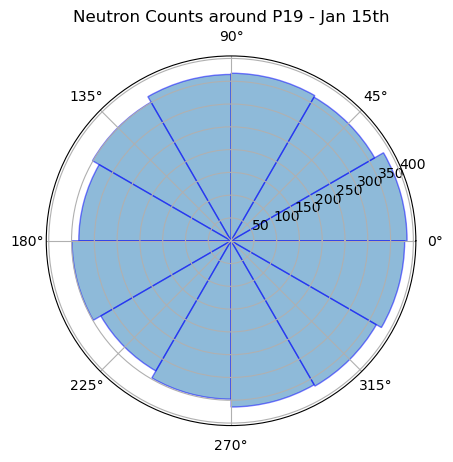

In [228]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('E')
# ax.set_theta_direction(-1)

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, nc_uni_theta, width=width, alpha=0.5, edgecolor='b')
ax.set_title('Neutron Counts around P19 - Jan 15th')
# c = plt.Circle((0,0), radius=10, transform=ax.transData._b,facecolor='k')
# ax.add_artist(c)
plt.show()

In [229]:
# # prep nc_hist
files = np.sort(glob.glob('./hists_radial/hist_p05*.csv'))
rs = np.arange(0,300,0.01)

r_footprints = []
for f in files:
    nosnow = pd.read_csv(f)
    nosnow.drop(['Unnamed: 0'], axis=1, inplace=True)
    # # nosnow.columns
    
    nosnow['mids'] = nosnow['bin_edge_left']+2.5
    
    mids = nosnow['mids'].iloc[3:].reset_index(drop=True)
    counts = nosnow['counts'].iloc[3:].reset_index(drop=True)

    # fit the bi_exp functions
    popt, pcov = fit_crns_hist(BiExp, mids, counts,
                               [16,210,60,100])
    print(popt)
    fitted = [BiExp(x, *popt) for x in rs]
    weights_df = pd.DataFrame({
        'r':rs,
        'wts': fitted
    })
    weights_df['cum_wts'] = weights_df['wts'].cumsum()
    weights_df['cum_totfrac'] = weights_df['wts'].cumsum() / np.sum(weights_df['wts'])

    print(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
    r_footprints.append(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
    # biexp_all = scale_weights(popt)
    # print(biexp_all[biexp_all['cum_totfrac']<=.865]['r'].iloc[-1])

[ 16.07046203 111.93855595 108.32382937   6.66607695]
155.82
[ 12.11367368 137.75747334  38.76952626  13.58543383]
177.51
[ 43.10941399  96.00315697 -24.04416504  96.00175203]
168.42000000000002
[ 15.81796364 115.7052538   49.68500453   9.04209594]
168.6
[  9.21932335 162.16855842  13.60244405  43.54288987]
185.16
[  6.74762324 202.30805302  17.51173557  51.46693218]
183.59
[  17.36729153  110.79016454 1228.46032677    3.3154627 ]
81.56
[ 14.5617194  125.41879329  40.5077803    9.99713999]
176.87
[ 10.05922541 160.38541068  11.68627101  39.66232908]
190.53
[ 11.16388232 151.64036981  14.62444873  32.14758495]
187.01
[ 15.45711686 122.98396591  17.83304846  11.86866363]
183.17000000000002
[ 16.44068717 110.56647462  32.3445433   10.56113479]
168.54


<BarContainer object of 12 artists>

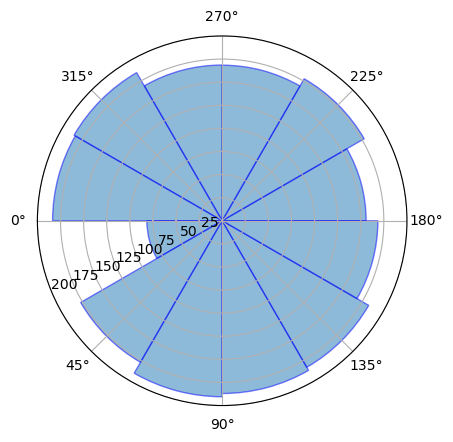

In [230]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('W')
# ax.set_theta_direction()

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, r_footprints, width=width, alpha=0.5, edgecolor='b')

In [231]:
# # prep nc_hist
files = np.sort(glob.glob('./hists_radial/hist_p07*.csv'))
rs = np.arange(0,300,0.01)

r_footprints = []
for f in files:
    nosnow = pd.read_csv(f)
    nosnow.drop(['Unnamed: 0'], axis=1, inplace=True)
    # # nosnow.columns
    
    nosnow['mids'] = nosnow['bin_edge_left']+2.5
    
    mids = nosnow['mids'].iloc[3:].reset_index(drop=True)
    counts = nosnow['counts'].iloc[3:].reset_index(drop=True)

    # fit the bi_exp functions
    popt, pcov = fit_crns_hist(BiExp, mids, counts,
                               [16,210,60,100])
    print(popt)
    fitted = [BiExp(x, *popt) for x in rs]
    weights_df = pd.DataFrame({
        'r':rs,
        'wts': fitted
    })
    weights_df['cum_wts'] = weights_df['wts'].cumsum()
    weights_df['cum_totfrac'] = weights_df['wts'].cumsum() / np.sum(weights_df['wts'])

    print(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
    r_footprints.append(weights_df[weights_df['cum_totfrac']<=.865]['r'].iloc[-1])
    # biexp_all = scale_weights(popt)
    # print(biexp_all[biexp_all['cum_totfrac']<=.865]['r'].iloc[-1])

[ 16.31869936 107.81986966  64.46534419   6.96980613]
161.76
[ 14.41892853 118.96394963 149.70716651   5.91703411]
153.89000000000001
[  7.34106953 186.54403688  17.02102087  40.31759049]
184.94
[ 11.44472155 143.05408035  19.52338855  22.6755255 ]
183.29
[  5.48091582 230.83908203  18.10541939  52.98846245]
183.44
[  5.73688962 210.40778507  17.66230233  55.28122367]
180.41
[ 12.62436329 142.01889386  29.55785444  15.01969323]
184.34
[ 11.26563225 141.62585939  12.12802204  35.68533456]
183.29
[1.62443010e+01 1.15801798e+02 2.48299771e+04 2.14150287e+00]
4.75
[ 2.15206940e+01  5.67499194e+01  1.99211813e+00 -7.30923847e+08]
194.08
[-17.79592087 105.23319259  35.40719793 105.23110384]
177.55
[ 15.50886491 115.03860067  40.95172884   7.61370711]
172.94


<BarContainer object of 12 artists>

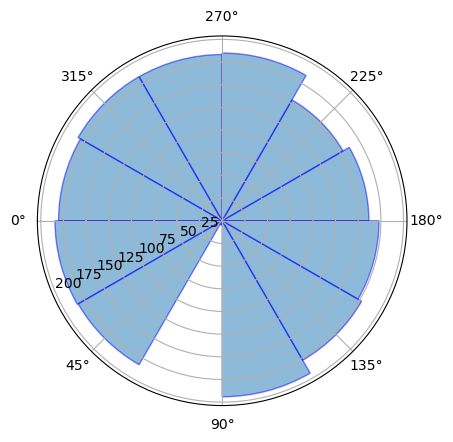

In [232]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location('W')
# ax.set_theta_direction()

thetas = np.linspace(-np.pi,np.pi,13)
# theta = np.deg2rad(angles)
width = 2*np.pi/12
ax.bar(thetas[:-1]+0.2617993877991494, r_footprints, width=width, alpha=0.5, edgecolor='b')

Do straight nc instead?

In [233]:
(theta[2] - theta[1])/2

NameError: name 'theta' is not defined

[ 15.50886491 115.03860067  40.95172884   7.61370711]


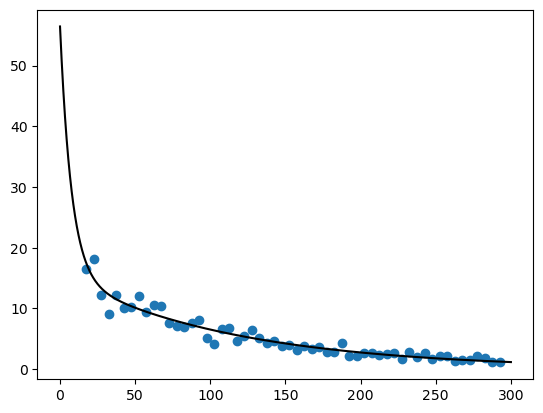

In [234]:
# see the function in action
popt, pcov = fit_crns_hist(BiExp, mids, counts,
                               [16,210,60,100])
print(popt)
fitted = [BiExp(x, *popt) for x in rs]

plt.plot(mids, counts, 'o')
plt.plot(rs, fitted, 'k-')

In [235]:
theta

NameError: name 'theta' is not defined

In [236]:
p07_0115_hits[(p07_0115_hits['w_deg_new']>=30) & (p07_0115_hits['w_deg_new']<(60))]['Prob'].sum()

319.23839111128314

In [237]:
ncdf_boxplot = ncdf_no_control[ncdf_no_control['Date']!='2021-01-15'].reset_index(drop='True')
ncdf_u_171m_boxplot = ncdf_u_171m_no_control[ncdf_u_171m_no_control['Date']!='2021-01-15'].reset_index(drop='True')
ncdf_u_carc_boxplot = ncdf_u_carc_no_control[ncdf_u_carc_no_control['Date']!='2021-01-15'].reset_index(drop='True')

In [238]:
ncdf_boxplot['SWE [mm]'] = ncdf_boxplot['SWE [cm]']*10
ncdf_u_171m_boxplot['SWE [mm]'] = ncdf_u_171m_boxplot['SWE [cm]']*10
ncdf_u_carc_boxplot['SWE [mm]'] = ncdf_u_carc_boxplot['SWE [cm]']*10

In [239]:
# carc_dowy = [112, 113, 120, 139, 140, 146, 154]
ncdf_boxplot['DOWY'] = np.concatenate([np.repeat(112, 26),np.repeat(113,26), np.repeat(120, 26),
                                       np.repeat(139, 26),np.repeat(140,26), np.repeat(146, 26),
                                       np.repeat(154, 26)])
ncdf_u_171m_boxplot['DOWY'] = np.concatenate([np.repeat(112, 26),np.repeat(113,26), np.repeat(120, 26),
                                       np.repeat(139, 26),np.repeat(140,26), np.repeat(146, 26),
                                       np.repeat(154, 26)])
ncdf_u_carc_boxplot['DOWY'] = np.concatenate([np.repeat(112, 26),np.repeat(113,26), np.repeat(120, 26),
                                       np.repeat(139, 26),np.repeat(140,26), np.repeat(146, 26),
                                       np.repeat(154, 26)])

In [240]:
ncdf_boxplot

Date Point           NC  SWE [cm]   NC_norm  SWE [mm]  DOWY
0   2021-01-21   p00  4282.290040  0.403583  0.282650  4.035826   112
1   2021-01-21   p01  4357.049739  0.439359  1.216595  4.393586   112
2   2021-01-21   p02  4269.979562  0.275728  0.128860  2.757278   112
3   2021-01-21   p03  4266.184971  0.431493  0.081455   4.31493   112
4   2021-01-21   p04  4249.841429  0.296967 -0.122719  2.969672   112
..         ...   ...          ...       ...       ...       ...   ...
177 2021-03-04   p21  4431.558051  0.348607  1.004403  3.486069   154
178 2021-03-04   p22  4402.028302  0.317625  0.767481   3.17625   154
179 2021-03-04   p23  4360.523205  0.298655  0.434479  2.986547   154
180 2021-03-04   p24  4040.378922  0.921111 -2.134088  9.211109   154
181 2021-03-04   p25  4377.038579  0.249382  0.566985  2.493816   154

[182 rows x 7 columns]

In [241]:
carc_avg_swe_cm = [0.530504098566071, 0.637230009292796,0.327047373752602,1.09127963950704,1.05802546834056,0.755550068249541,0.572121540796448]
carc_dowy = [112, 113, 120, 139, 140, 146, 154]

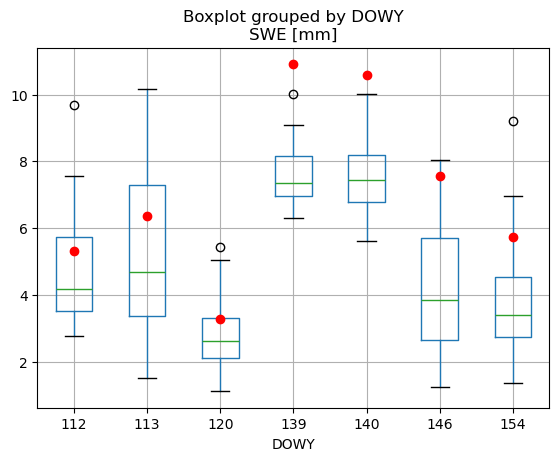

In [242]:
fig, ax = plt.subplots()
ncdf_boxplot.boxplot(column=['SWE [mm]'], by='DOWY', ax=ax)
plt.plot([1,2,3,4,5,6,7], [x * 10 for x in carc_avg_swe_cm],'ro')

<Axes: title={'center': 'SWE [mm]'}, xlabel='[DOWY]'>

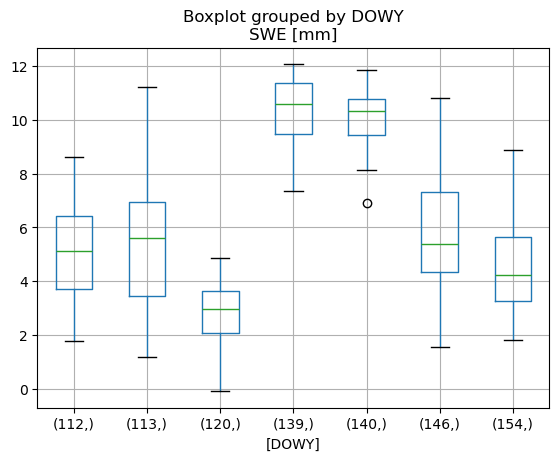

In [243]:
ncdf_u_171m_boxplot.boxplot(column=['SWE [mm]'], by=['DOWY'])

<Axes: title={'center': 'SWE [mm]'}, xlabel='[DOWY]'>

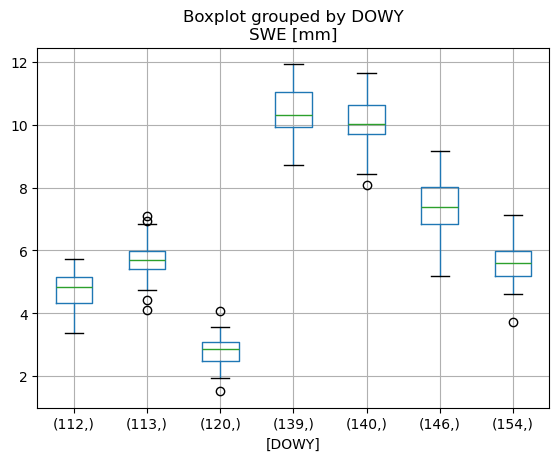

In [244]:
ncdf_u_carc_boxplot.boxplot(column=['SWE [mm]'], by=['DOWY'])

<Axes: xlabel='DOWY', ylabel='SWE [mm]'>

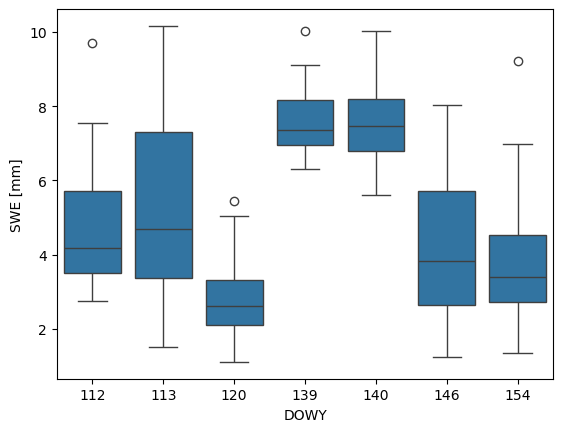

In [245]:
sns.boxplot(data=ncdf_boxplot, x='DOWY', y='SWE [mm]')

In [246]:
ncdf_boxplot.to_csv('ncdf_boxplot.csv', index=False)
ncdf_u_171m_boxplot.to_csv('ncdf_u_171m_boxplot.csv', index=False)
ncdf_u_carc_boxplot.to_csv('ncdf_u_carc_boxplot.csv', index=False)

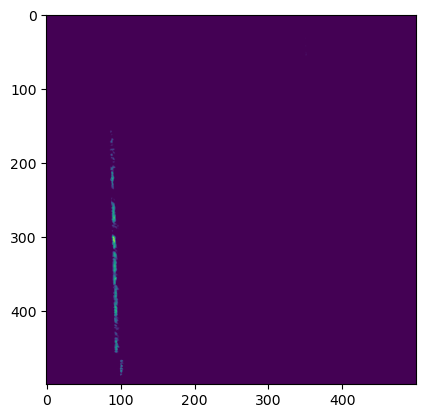

In [439]:
plt.imshow(sd_0115)

In [585]:
# sd_0115 = np.loadtxt(fnames_0115, delimiter=',')
sd_0121 = np.loadtxt(fnames[0], delimiter=',')
sd_0122 = np.loadtxt(fnames[1], delimiter=',')
sd_0129 = np.loadtxt(fnames[2], delimiter=',')
sd_0217 = np.loadtxt(fnames[3], delimiter=',')
sd_0218 = np.loadtxt(fnames[4], delimiter=',')
sd_0224 = np.loadtxt(fnames[5], delimiter=',')
sd_0304 = np.loadtxt(fnames[6], delimiter=',')

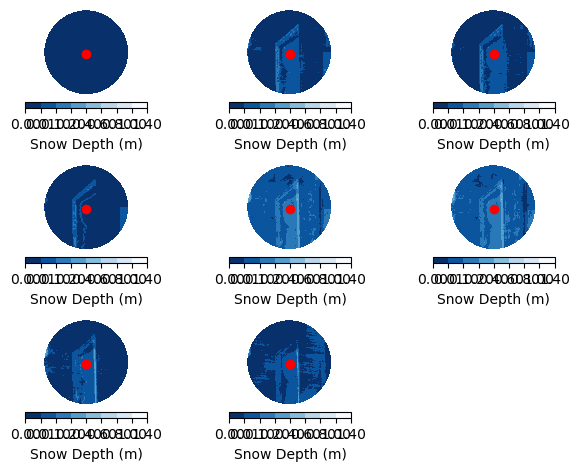

In [592]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p17[0], p17[1], 'ro')
ax1.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p17[0], p17[1], 'ro')
ax2.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p17[0], p17[1], 'ro')
ax3.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p17[0], p17[1], 'ro')
ax4.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p17[0], p17[1], 'ro')
ax5.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p17[0], p17[1], 'ro')
ax6.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p17[0], p17[1], 'ro')
ax7.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p17 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p17[0], p17[1], 'ro')
ax8.axis([p17[0]-90,p17[0]+90,
          p17[1]+90,p17[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

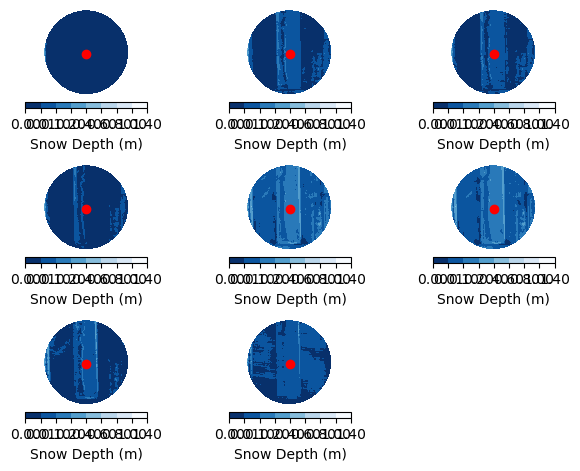

In [593]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p24[0], p24[1], 'ro')
ax1.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p24[0], p24[1], 'ro')
ax2.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p24[0], p24[1], 'ro')
ax3.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p24[0], p24[1], 'ro')
ax4.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p24[0], p24[1], 'ro')
ax5.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p24[0], p24[1], 'ro')
ax6.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p24[0], p24[1], 'ro')
ax7.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p24 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p24[0], p24[1], 'ro')
ax8.axis([p24[0]-90,p24[0]+90,
          p24[1]+90,p24[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

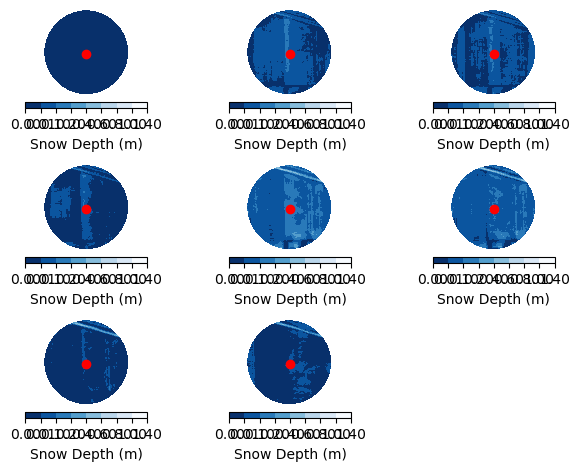

In [594]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p15[0], p15[1], 'ro')
ax1.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p15[0], p15[1], 'ro')
ax2.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p15[0], p15[1], 'ro')
ax3.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p15[0], p15[1], 'ro')
ax4.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p15[0], p15[1], 'ro')
ax5.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p15[0], p15[1], 'ro')
ax6.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p15[0], p15[1], 'ro')
ax7.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p15 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p15[0], p15[1], 'ro')
ax8.axis([p15[0]-90,p15[0]+90,
          p15[1]+90,p15[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

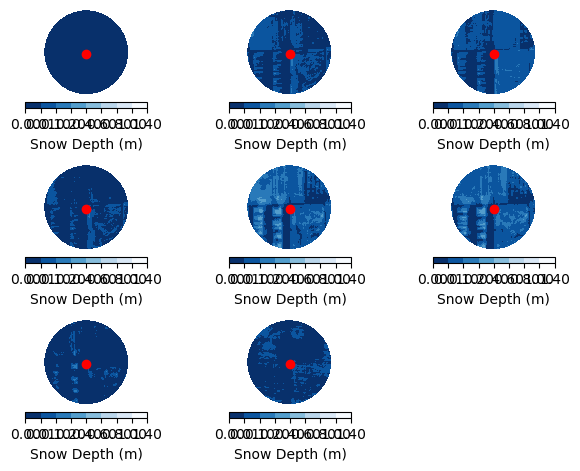

In [595]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p06[0], p06[1], 'ro')
ax1.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p06[0], p06[1], 'ro')
ax2.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p06[0], p06[1], 'ro')
ax3.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p06[0], p06[1], 'ro')
ax4.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p06[0], p06[1], 'ro')
ax5.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p06[0], p06[1], 'ro')
ax6.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p06[0], p06[1], 'ro')
ax7.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p06 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p06[0], p06[1], 'ro')
ax8.axis([p06[0]-90,p06[0]+90,
          p06[1]+90,p06[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

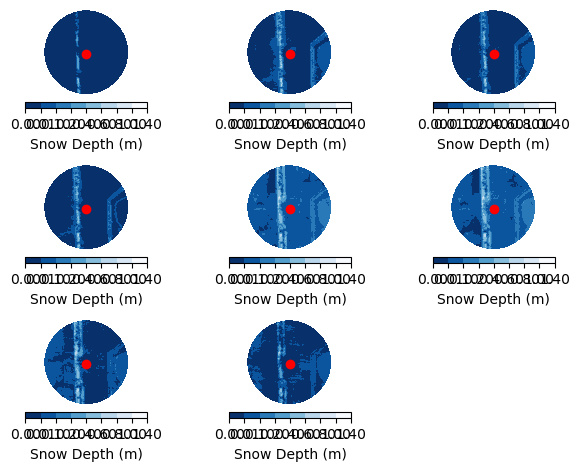

In [596]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p05[0], p05[1], 'ro')
ax1.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p05[0], p05[1], 'ro')
ax2.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p05[0], p05[1], 'ro')
ax3.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p05[0], p05[1], 'ro')
ax4.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p05[0], p05[1], 'ro')
ax5.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p05[0], p05[1], 'ro')
ax6.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p05[0], p05[1], 'ro')
ax7.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p05 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p05[0], p05[1], 'ro')
ax8.axis([p05[0]-90,p05[0]+90,
          p05[1]+90,p05[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

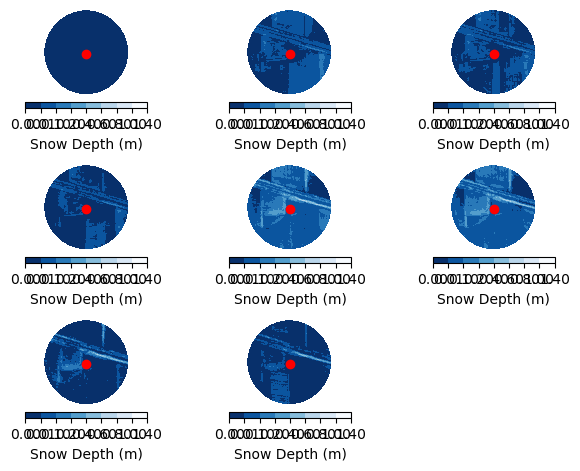

In [597]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)

bound = np.array([0,0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4])
norm = colors.BoundaryNorm(boundaries=bound, ncolors=256)

ax1 = fig.add_subplot(gs[0,0])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0115)
im1 = ax1.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax1.axis('off')
ax1.plot(p03[0], p03[1], 'ro')
ax1.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax2 = fig.add_subplot(gs[0,1])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0121)
im2 = ax2.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax2.axis('off')
ax2.plot(p03[0], p03[1], 'ro')
ax2.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax3 = fig.add_subplot(gs[0,2])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0122)
im3 = ax3.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax3.axis('off')
ax3.plot(p03[0], p03[1], 'ro')
ax3.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax4 = fig.add_subplot(gs[1,0])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0129)
im4 = ax4.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax4.axis('off')
ax4.plot(p03[0], p03[1], 'ro')
ax4.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax5 = fig.add_subplot(gs[1,1])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0217)
im5 = ax5.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax5.axis('off')
ax5.plot(p03[0], p03[1], 'ro')
ax5.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im5, ax=ax5, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax6 = fig.add_subplot(gs[1,2])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0218)
im6 = ax6.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax6.axis('off')
ax6.plot(p03[0], p03[1], 'ro')
ax6.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im6, ax=ax6, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

ax7 = fig.add_subplot(gs[2,0])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0224)
im7 = ax7.imshow(masked_sd, cmap='Blues_r',  clim=(0, 1.4), norm=norm)
ax7.axis('off')
ax7.plot(p03[0], p03[1], 'ro')
ax7.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im7, ax=ax7, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)


ax8 = fig.add_subplot(gs[2,1])
masked_sd= np.ma.masked_where(dists_p03 > 171, sd_0304)
im8 = ax8.imshow(masked_sd, cmap='Blues_r', clim=(0, 1.4), norm=norm)
ax8.axis('off')
ax8.plot(p03[0], p03[1], 'ro')
ax8.axis([p03[0]-90,p03[0]+90,
          p03[1]+90,p03[1]-90])
plt.colorbar(im8, ax=ax8, orientation='horizontal', pad=0.03,
                  label='Snow Depth (m)', shrink=0.6)

plt.tight_layout()

In [609]:
min_sd = sd_0115[sd_0115>0].min()*100
max_sd = sd_0115[sd_0115>0].max()*100

print('{} cm'.format(min_sd))
print('{} cm'.format(max_sd))

0.1 cm
63.4 cm


'[[0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]\n [0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]\n [0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]\n ...\n [0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]\n [0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]\n [0.0131 0.0131 0.0131 ... 0.0131 0.0131 0.0131]]'

In [678]:
sds = [sd_0115, sd_0121, sd_0122, sd_0129, sd_0217, sd_0218, sd_0224, sd_0304]

for d in sds:
    min_sd = d[d>0].min()*100
    mean_sd_no_0 = d[d>0].mean()*100
    mean_sd_0 = d.mean()*100
    max_sd = d[d>0].max()*100
    p_covered = 100*((d>0).sum()/(500*500))
    p_covered_deep = 100*((d>0.2).sum()/(500*500))

    print('Mean: {:.1f} ({:.1f}) cm'.format(mean_sd_no_0, mean_sd_0))
    print('Max : {:.1f} cm'.format(max_sd))
    print('SCA : {:.1f}%'.format(p_covered))
    print('SCA : {:.1f}%'.format(p_covered_deep))
    print('')

Mean: 5.3 (0.1) cm
Max : 63.4 cm
SCA : 1.8%
SCA : 0.2%

Mean: 3.6 (1.6) cm
Max : 96.7 cm
SCA : 45.1%
SCA : 0.6%

Mean: 3.8 (2.0) cm
Max : 82.7 cm
SCA : 52.1%
SCA : 0.5%

Mean: 3.2 (0.9) cm
Max : 82.8 cm
SCA : 28.1%
SCA : 0.5%

Mean: 8.8 (7.9) cm
Max : 131.5 cm
SCA : 89.6%
SCA : 5.0%

Mean: 8.7 (7.6) cm
Max : 131.0 cm
SCA : 87.1%
SCA : 4.8%

Mean: 5.5 (2.2) cm
Max : 100.6 cm
SCA : 39.7%
SCA : 2.4%

Mean: 2.2 (1.3) cm
Max : 80.4 cm
SCA : 60.1%
SCA : 1.1%



In [613]:
sd_0217[sd_0217>0].mean()*100

8.784707457371468

In [615]:
sd_0115.mean()*100

0.09416359999999999

In [654]:
p_gt_30cm = (sd_0129 > .2).sum()/(500*500)
print('{:.3f}%'.format(p_gt_30cm*100))

0.477%


In [639]:
stats.mode(sd_0217[sd_0217>0].flatten())

ModeResult(mode=0.0787, count=2849)

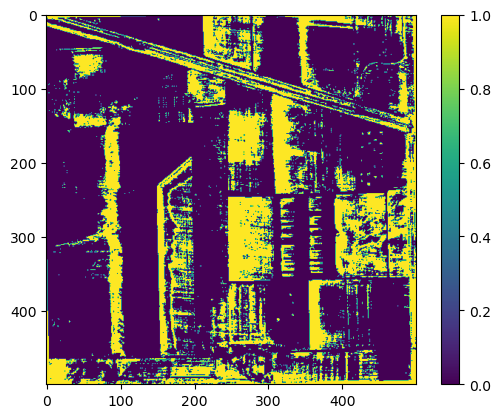

In [681]:
plt.imshow(sd_0129>0)
plt.colorbar()